In [34]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun  5 16:32:01 2018

@author: buck06191
"""

import json
import matplotlib.pyplot as plt
import string
import numpy as np
import pandas as pd
import seaborn as sns
#%matplotlib inline
from PIL import Image
import io
import os
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 300


def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

def setAxLinesBW(ax):
    """
    Take each Line2D in the axes, ax, and convert the line style to be
    suitable for black and white viewing.
    """
    MARKERSIZE = 3

    COLORMAP = {
        'b': {'marker': None, 'dash': (None,None)},
        'g': {'marker': None, 'dash': [5,5]},
        'r': {'marker': None, 'dash': [5,3,1,3]},
        'c': {'marker': None, 'dash': [1,3]},
        'm': {'marker': None, 'dash': [5,2,5,2,5,10]},
        'y': {'marker': None, 'dash': [5,3,1,2,1,10]},
        'k': {'marker': 'o', 'dash': (None,None)} #[1,2,1,10]}
        }


    lines_to_adjust = ax.get_lines()
    try:
        lines_to_adjust += ax.get_legend().get_lines()
    except AttributeError:
        pass

    for line in lines_to_adjust:
#         if line.get_label()[:3] != "Q10":
#             continue
        origColor = line.get_color()
        line.set_color('black')
        line.set_dashes(COLORMAP[origColor]['dash'])
        line.set_marker(COLORMAP[origColor]['marker'])
        line.set_markersize(MARKERSIZE)
    
    return lines_to_adjust

def setFigLinesBW(fig):
    """
    Take each axes in the figure, and for each line in the axes, make the
    line viewable in black and white.
    """
    fig_label = ["({})".format(s) for s in list(string.ascii_lowercase)]
    for jj, ax in enumerate(fig.get_axes()):
        lines = setAxLinesBW(ax)
        ax.set_title(fig_label[jj], loc='left')

    labels = [l.get_label() for l in lines]
    fig.legend(lines, labels, 'upper left', prop={'size': 14}, bbox_to_anchor=(0.91, 0.91))
    

def save_as_tiff(fig, fname):
    # Save the image in memory in PNG format
    png1 = io.BytesIO()
    fig.savefig(png1, format="png", bbox_inches='tight')

    # Load this image into PIL
    png2 = Image.open(png1)

    # Save as TIFF
    png2.save("../Figures/{}.tiff".format(fname))
    print("saved Tiff")
    png1.close()
    
def get_autoregulation_json_data(model, output, direction):    
    data_dir = "../data/steady_state/{}/autoregulation/".format(model)
    with open(os.path.join(data_dir, '{}_{}.json'.format(output, direction)), 'r') as f:
        jsondata = json.load(f)

    return jsondata

def get_outputs_json_data(model, direction):    
    data_dir = "../data/steady_state/{}/model_output/".format(model)
    with open(os.path.join(data_dir, 'q_range_runs_{}.json'.format(direction)), 'r') as f:
        jsondata = json.load(f)
    
    return jsondata



## Blood Pressure

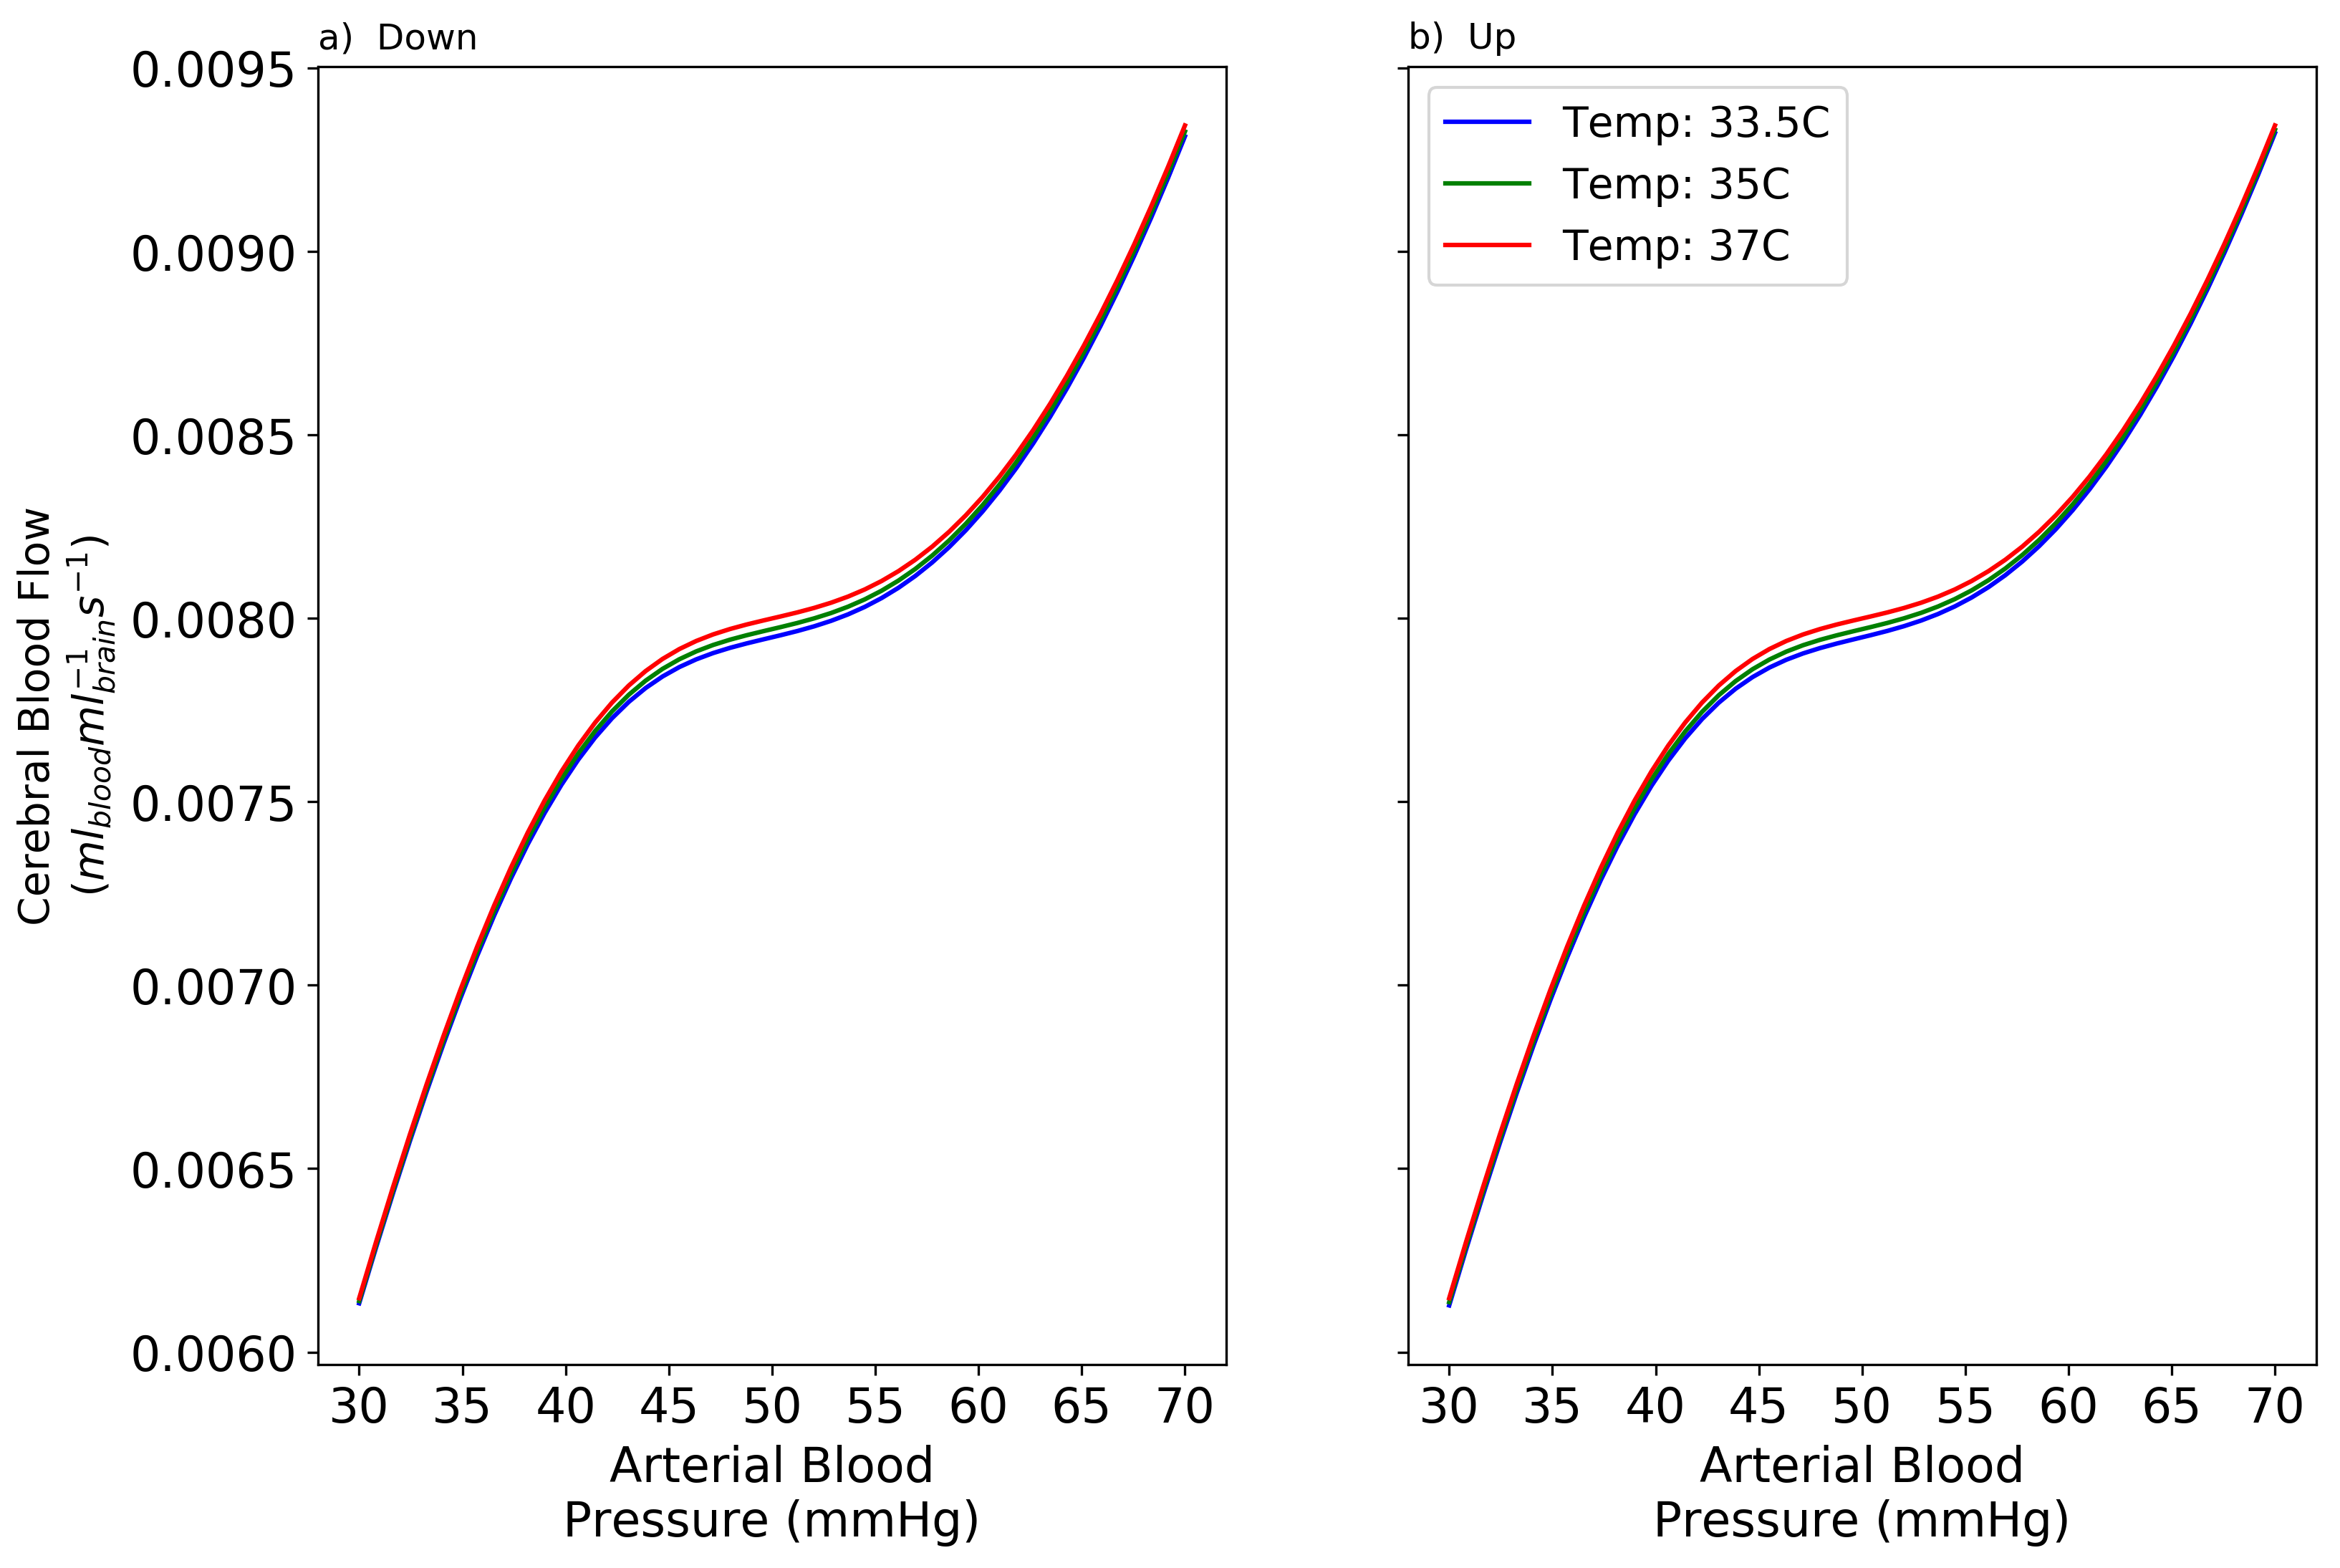

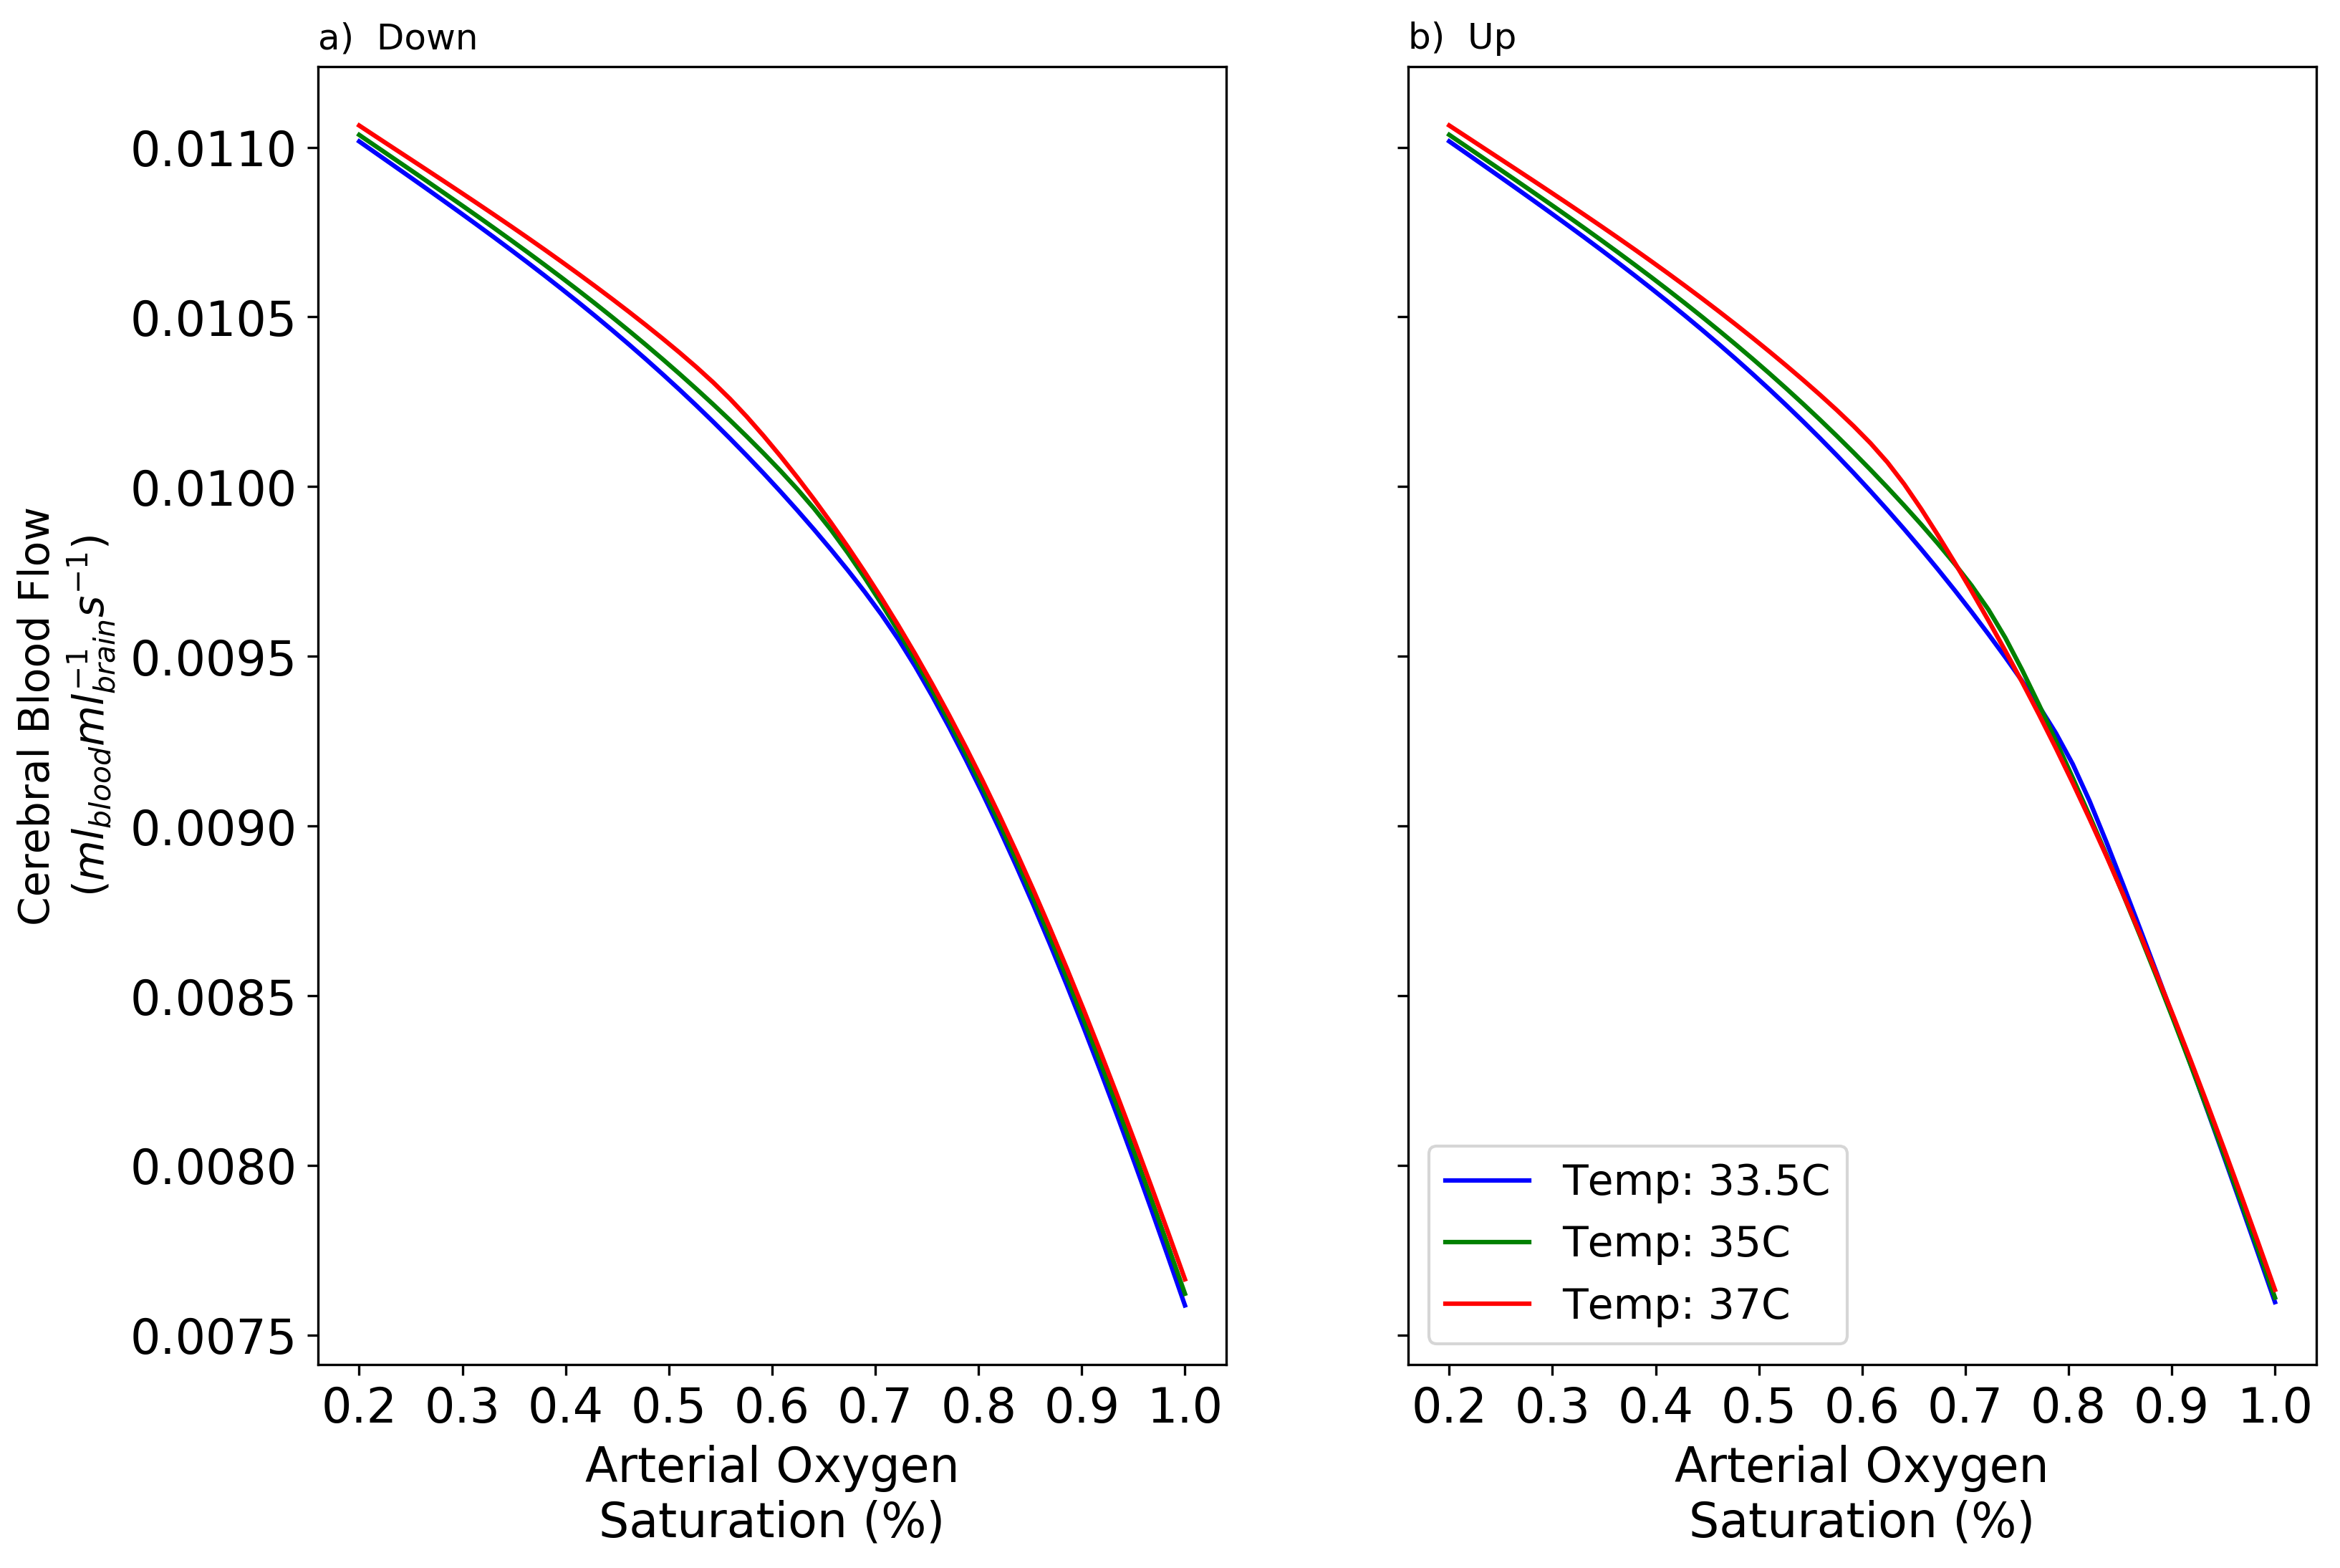

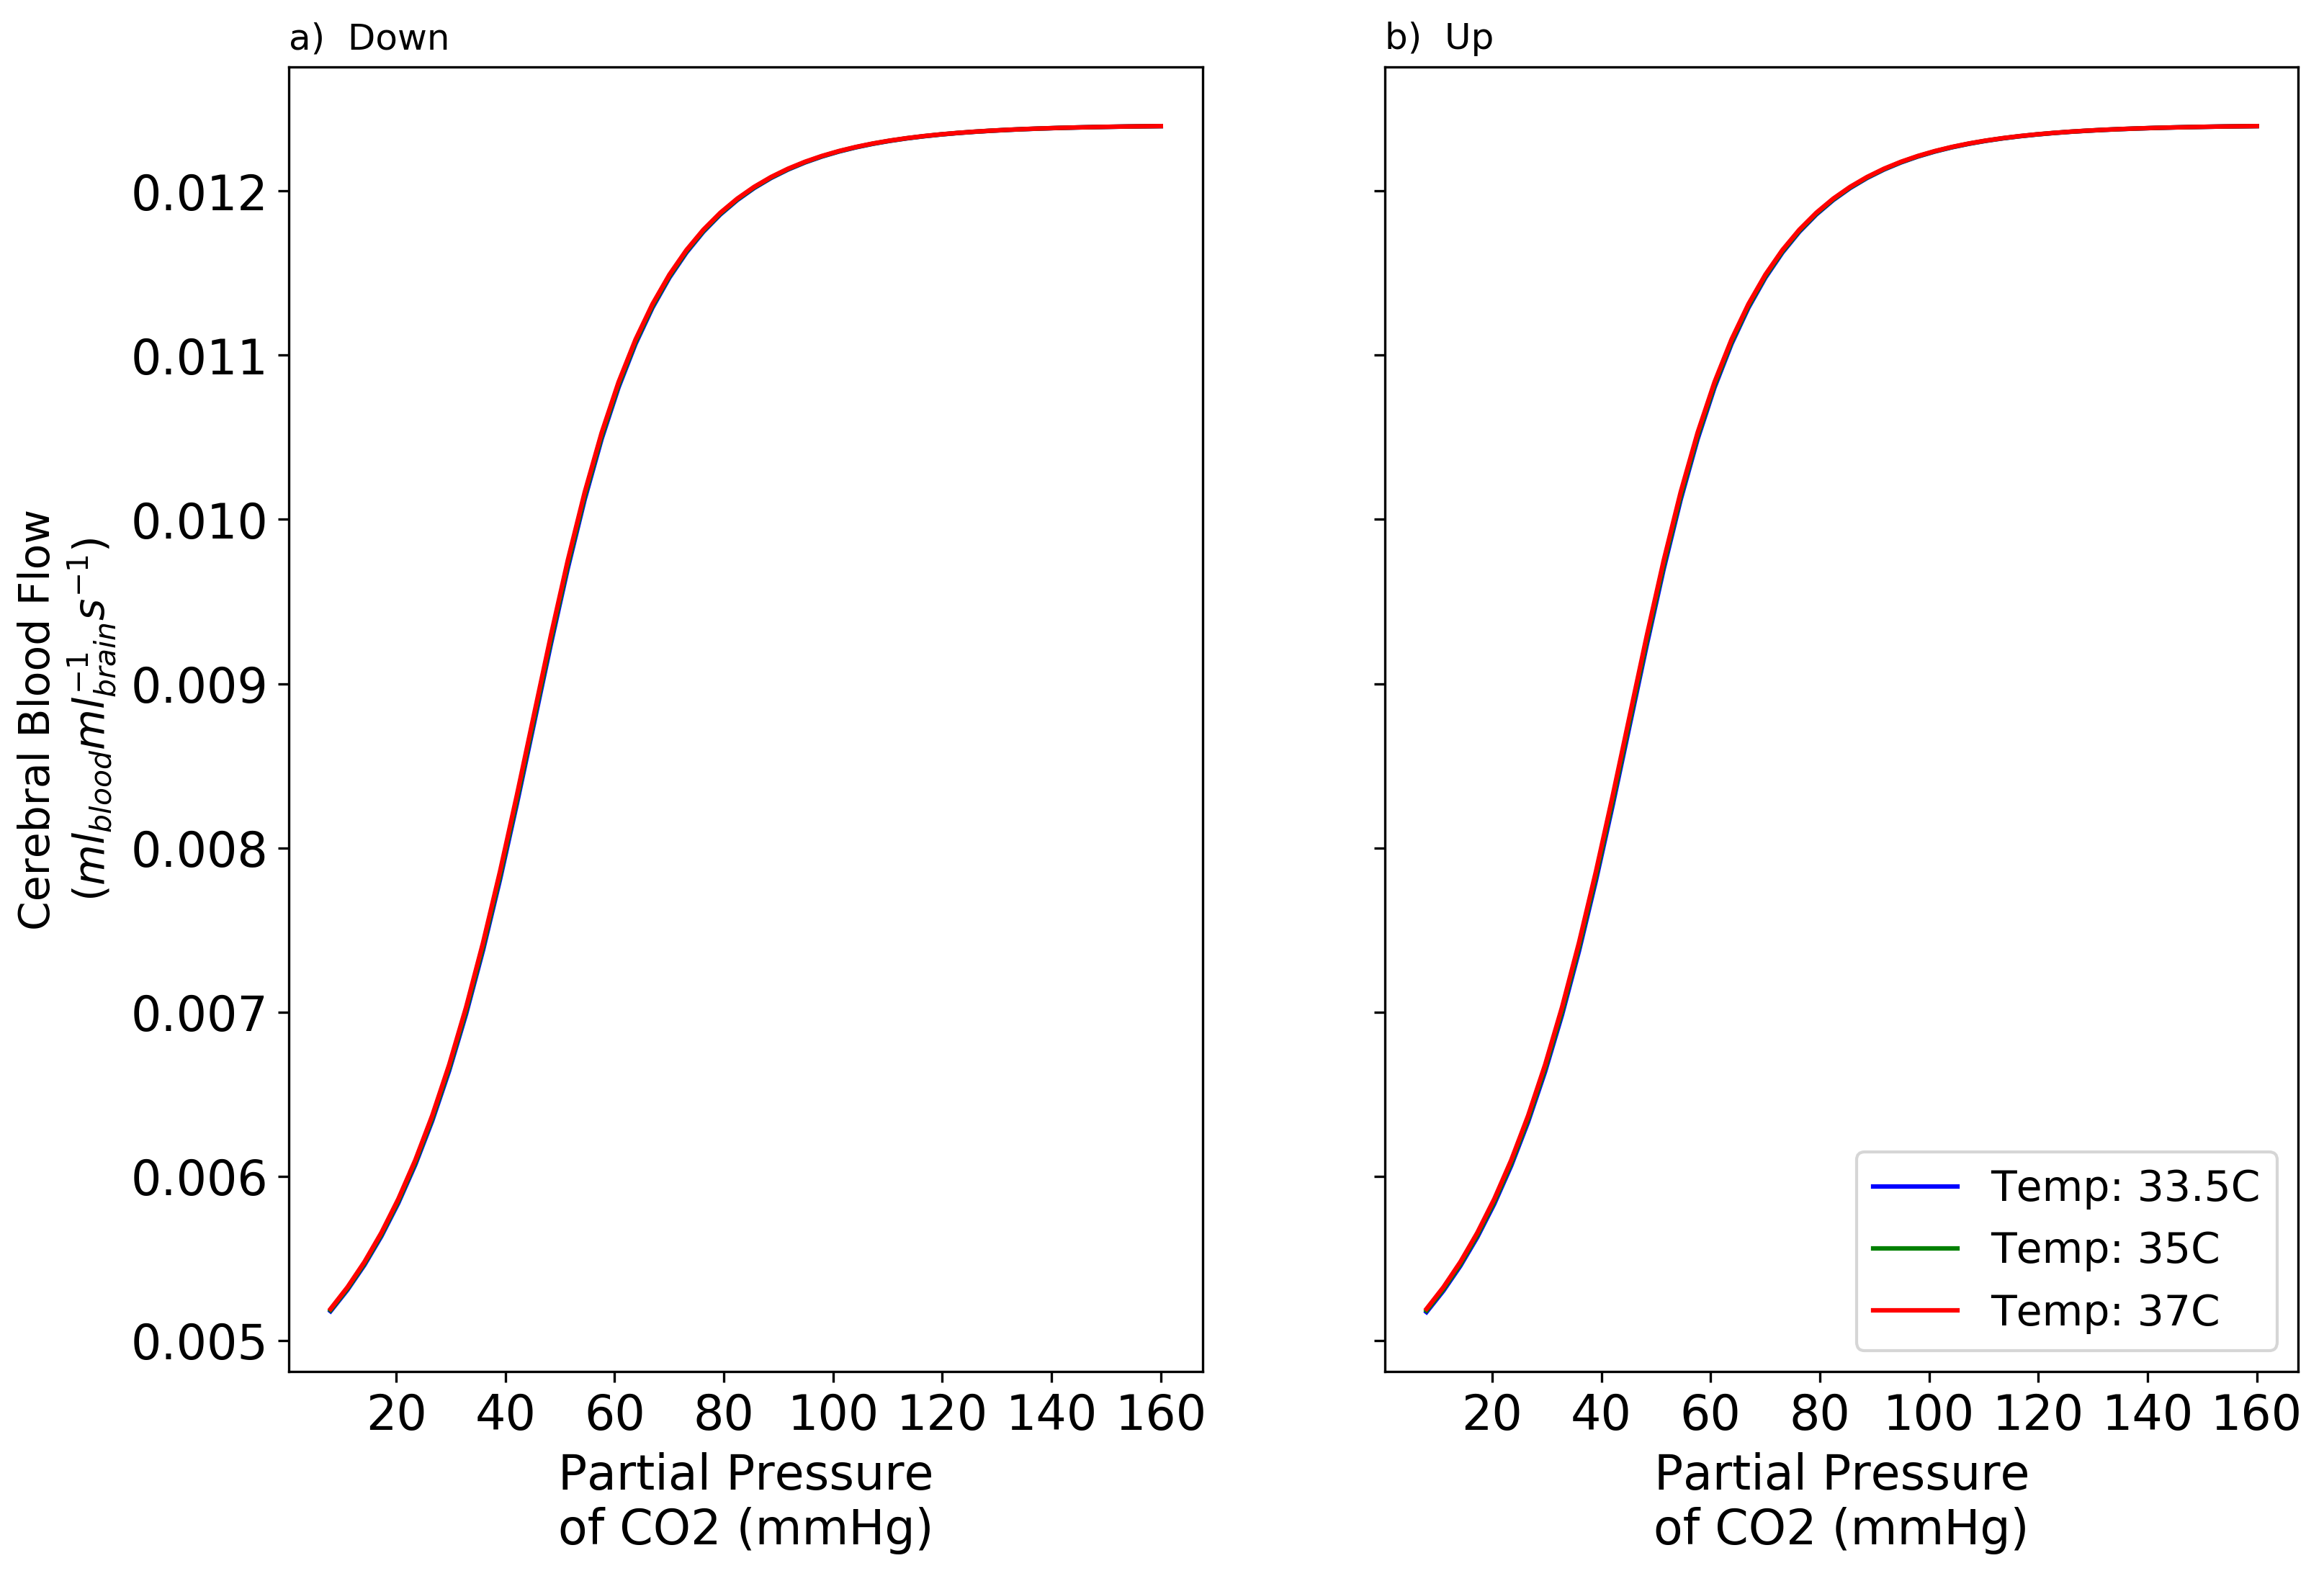

In [4]:
def generate_SS_figure(output, model, xlabel="", legend_loc="upper left"):

    fig, axes = plt.subplots(ncols=2, sharey=True, sharex=True)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for ix, direction in enumerate(["down", "up"]): 
        jsondata = get_autoregulation_json_data(model, output, direction)
        keys = list(jsondata.keys())
        keys.sort()
        data = jsondata[keys[0]][output]

        for idx, k in enumerate(keys):
            axes[ix].plot(jsondata[k][output], jsondata[k]['CBF'], label='Temp: %sC'%k, c=colors[idx])
            
        axes[ix].set_title("{})  {}".format(string.ascii_lowercase[ix], direction.title()), loc="left")  
        axes[ix].set_xlabel(xlabel, size=16)
        

        for item in (axes[ix].get_xticklabels() + axes[ix].get_yticklabels()):
            item.set_fontsize(16)
        
    axes[0].set_ylabel('Cerebral Blood Flow\n($ml_{blood}ml_{brain}^{-1}s^{-1}$)', size=14)
    axes[1].legend(loc=legend_loc, fontsize=14)
    return fig
    
pa_fig = generate_SS_figure("P_a", "bp_hypothermia_1", "Arterial Blood\nPressure (mmHg)")

sao2_fig = generate_SS_figure("SaO2sup", "bp_hypothermia_1", 'Arterial Oxygen\nSaturation (%)', legend_loc="lower left")

paco2_fig = generate_SS_figure("Pa_CO2", "bp_hypothermia_1", 'Partial Pressure\nof CO2 (mmHg)', legend_loc="lower right")

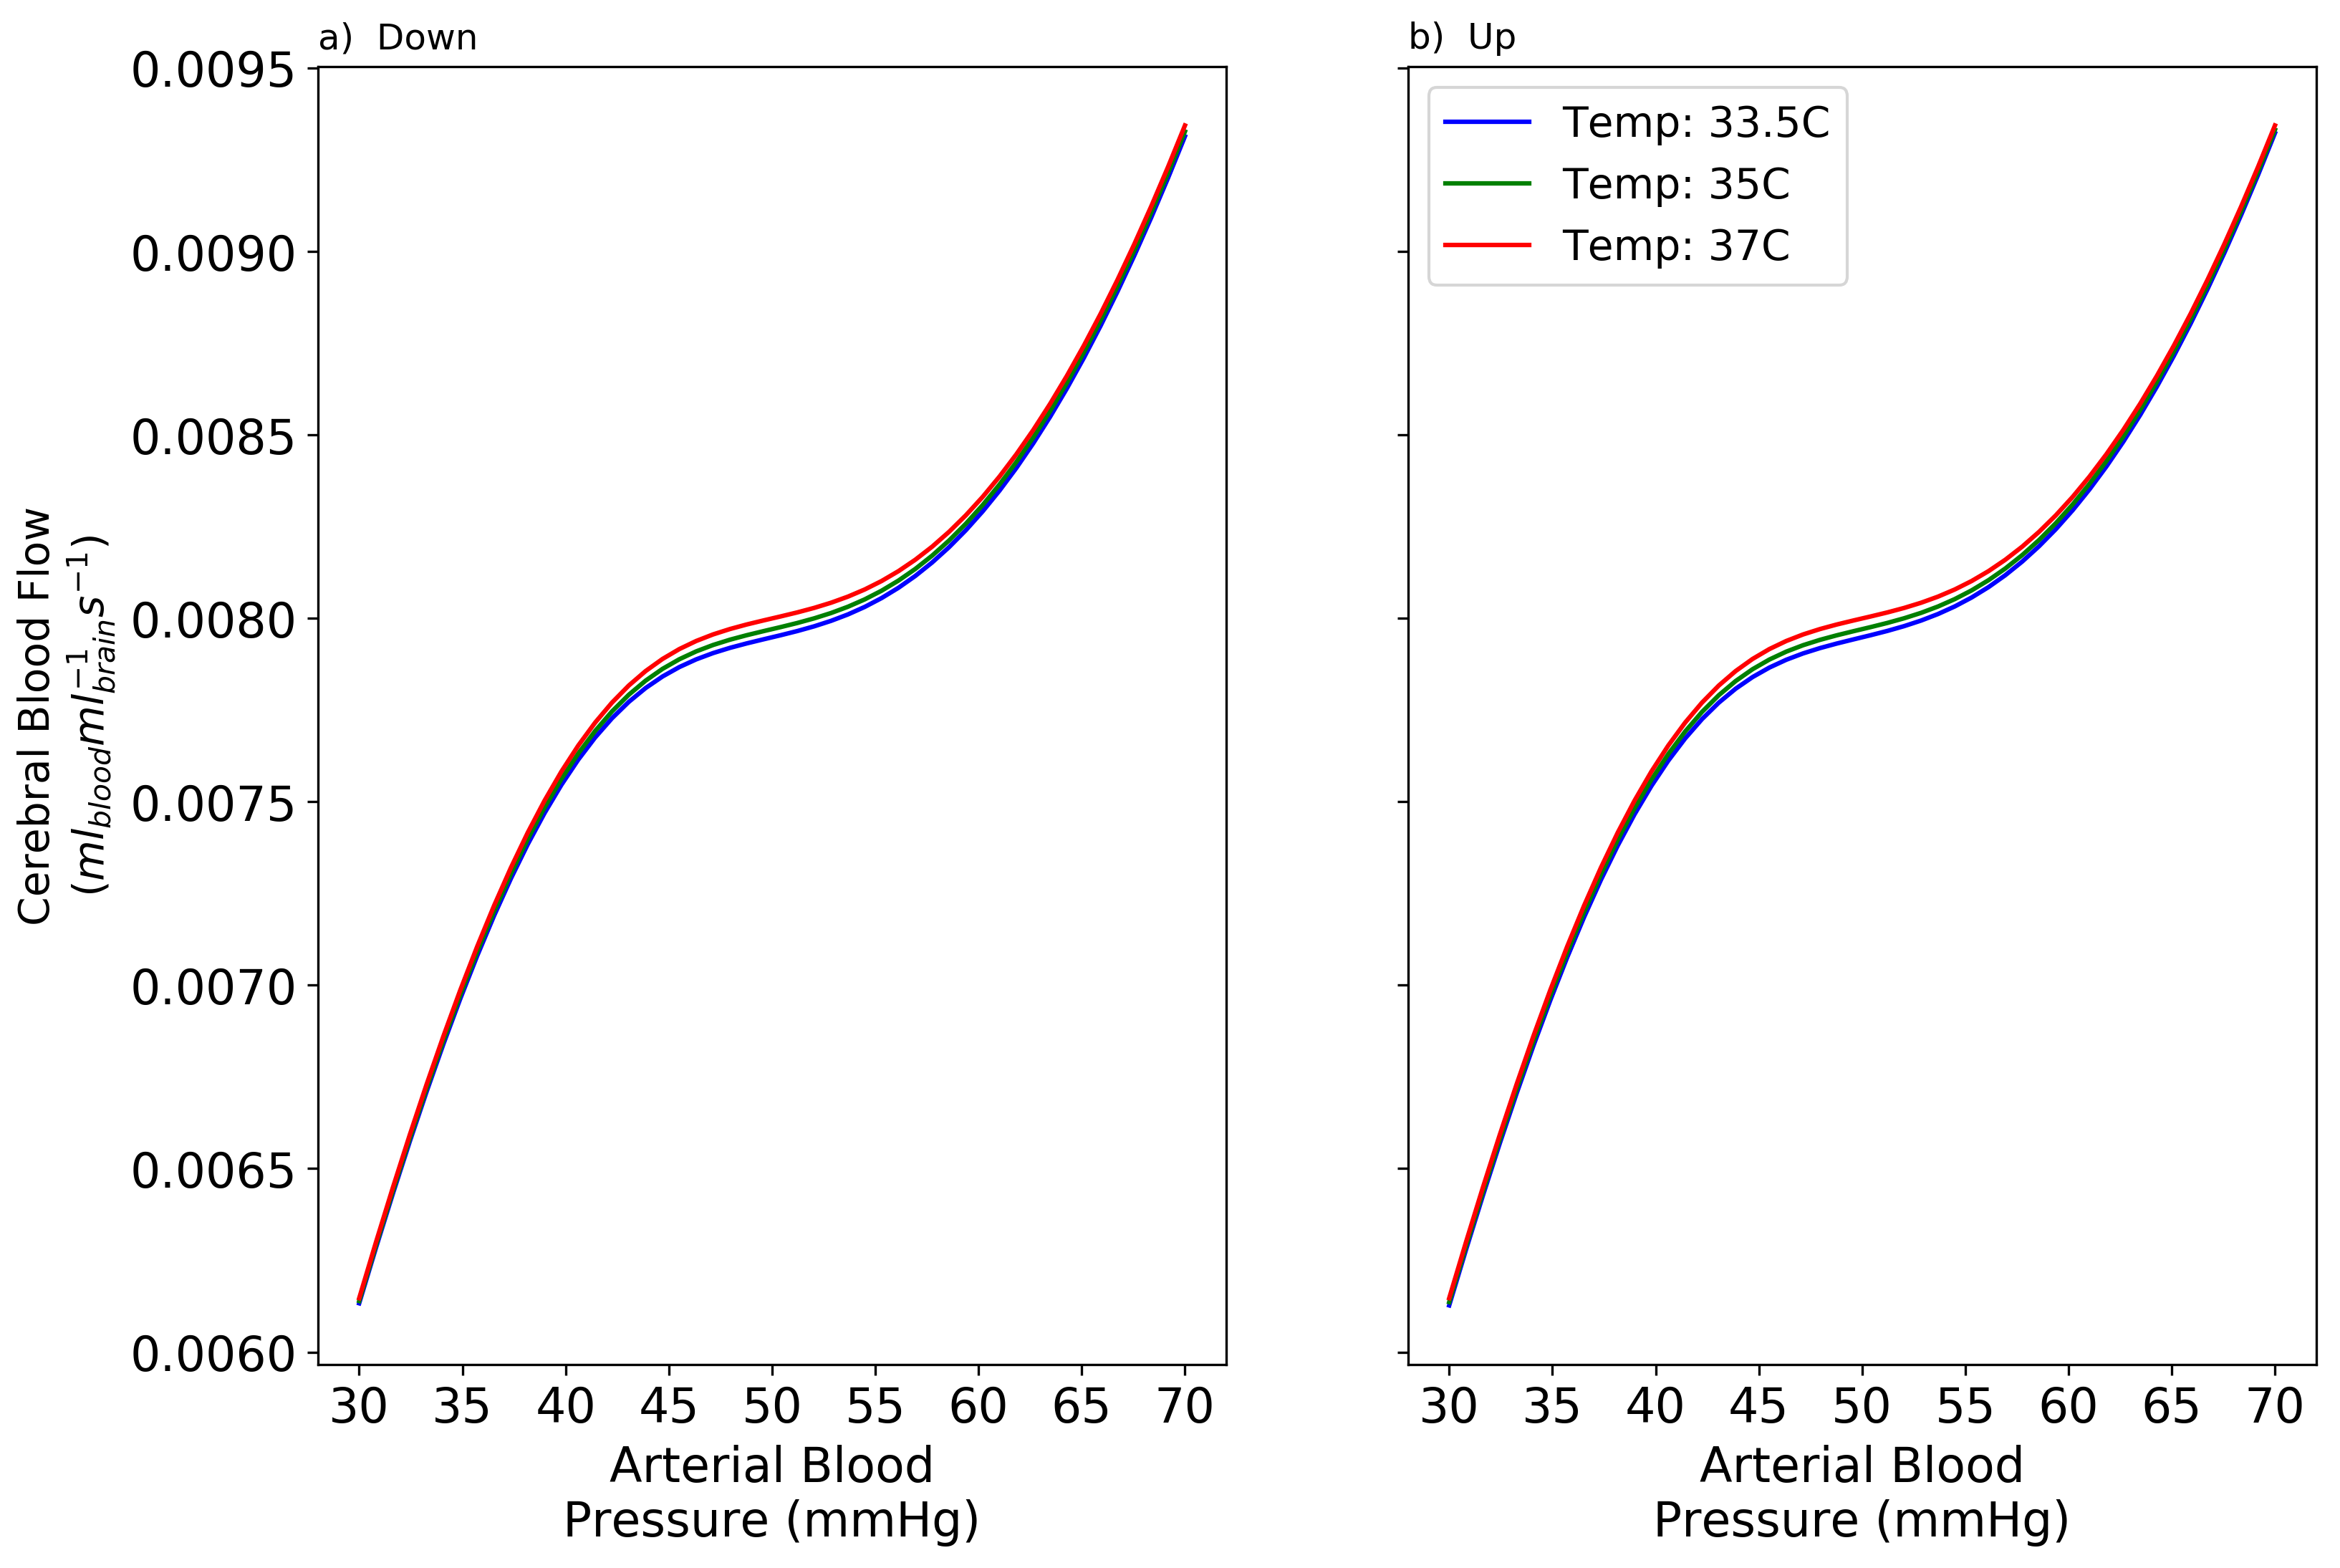

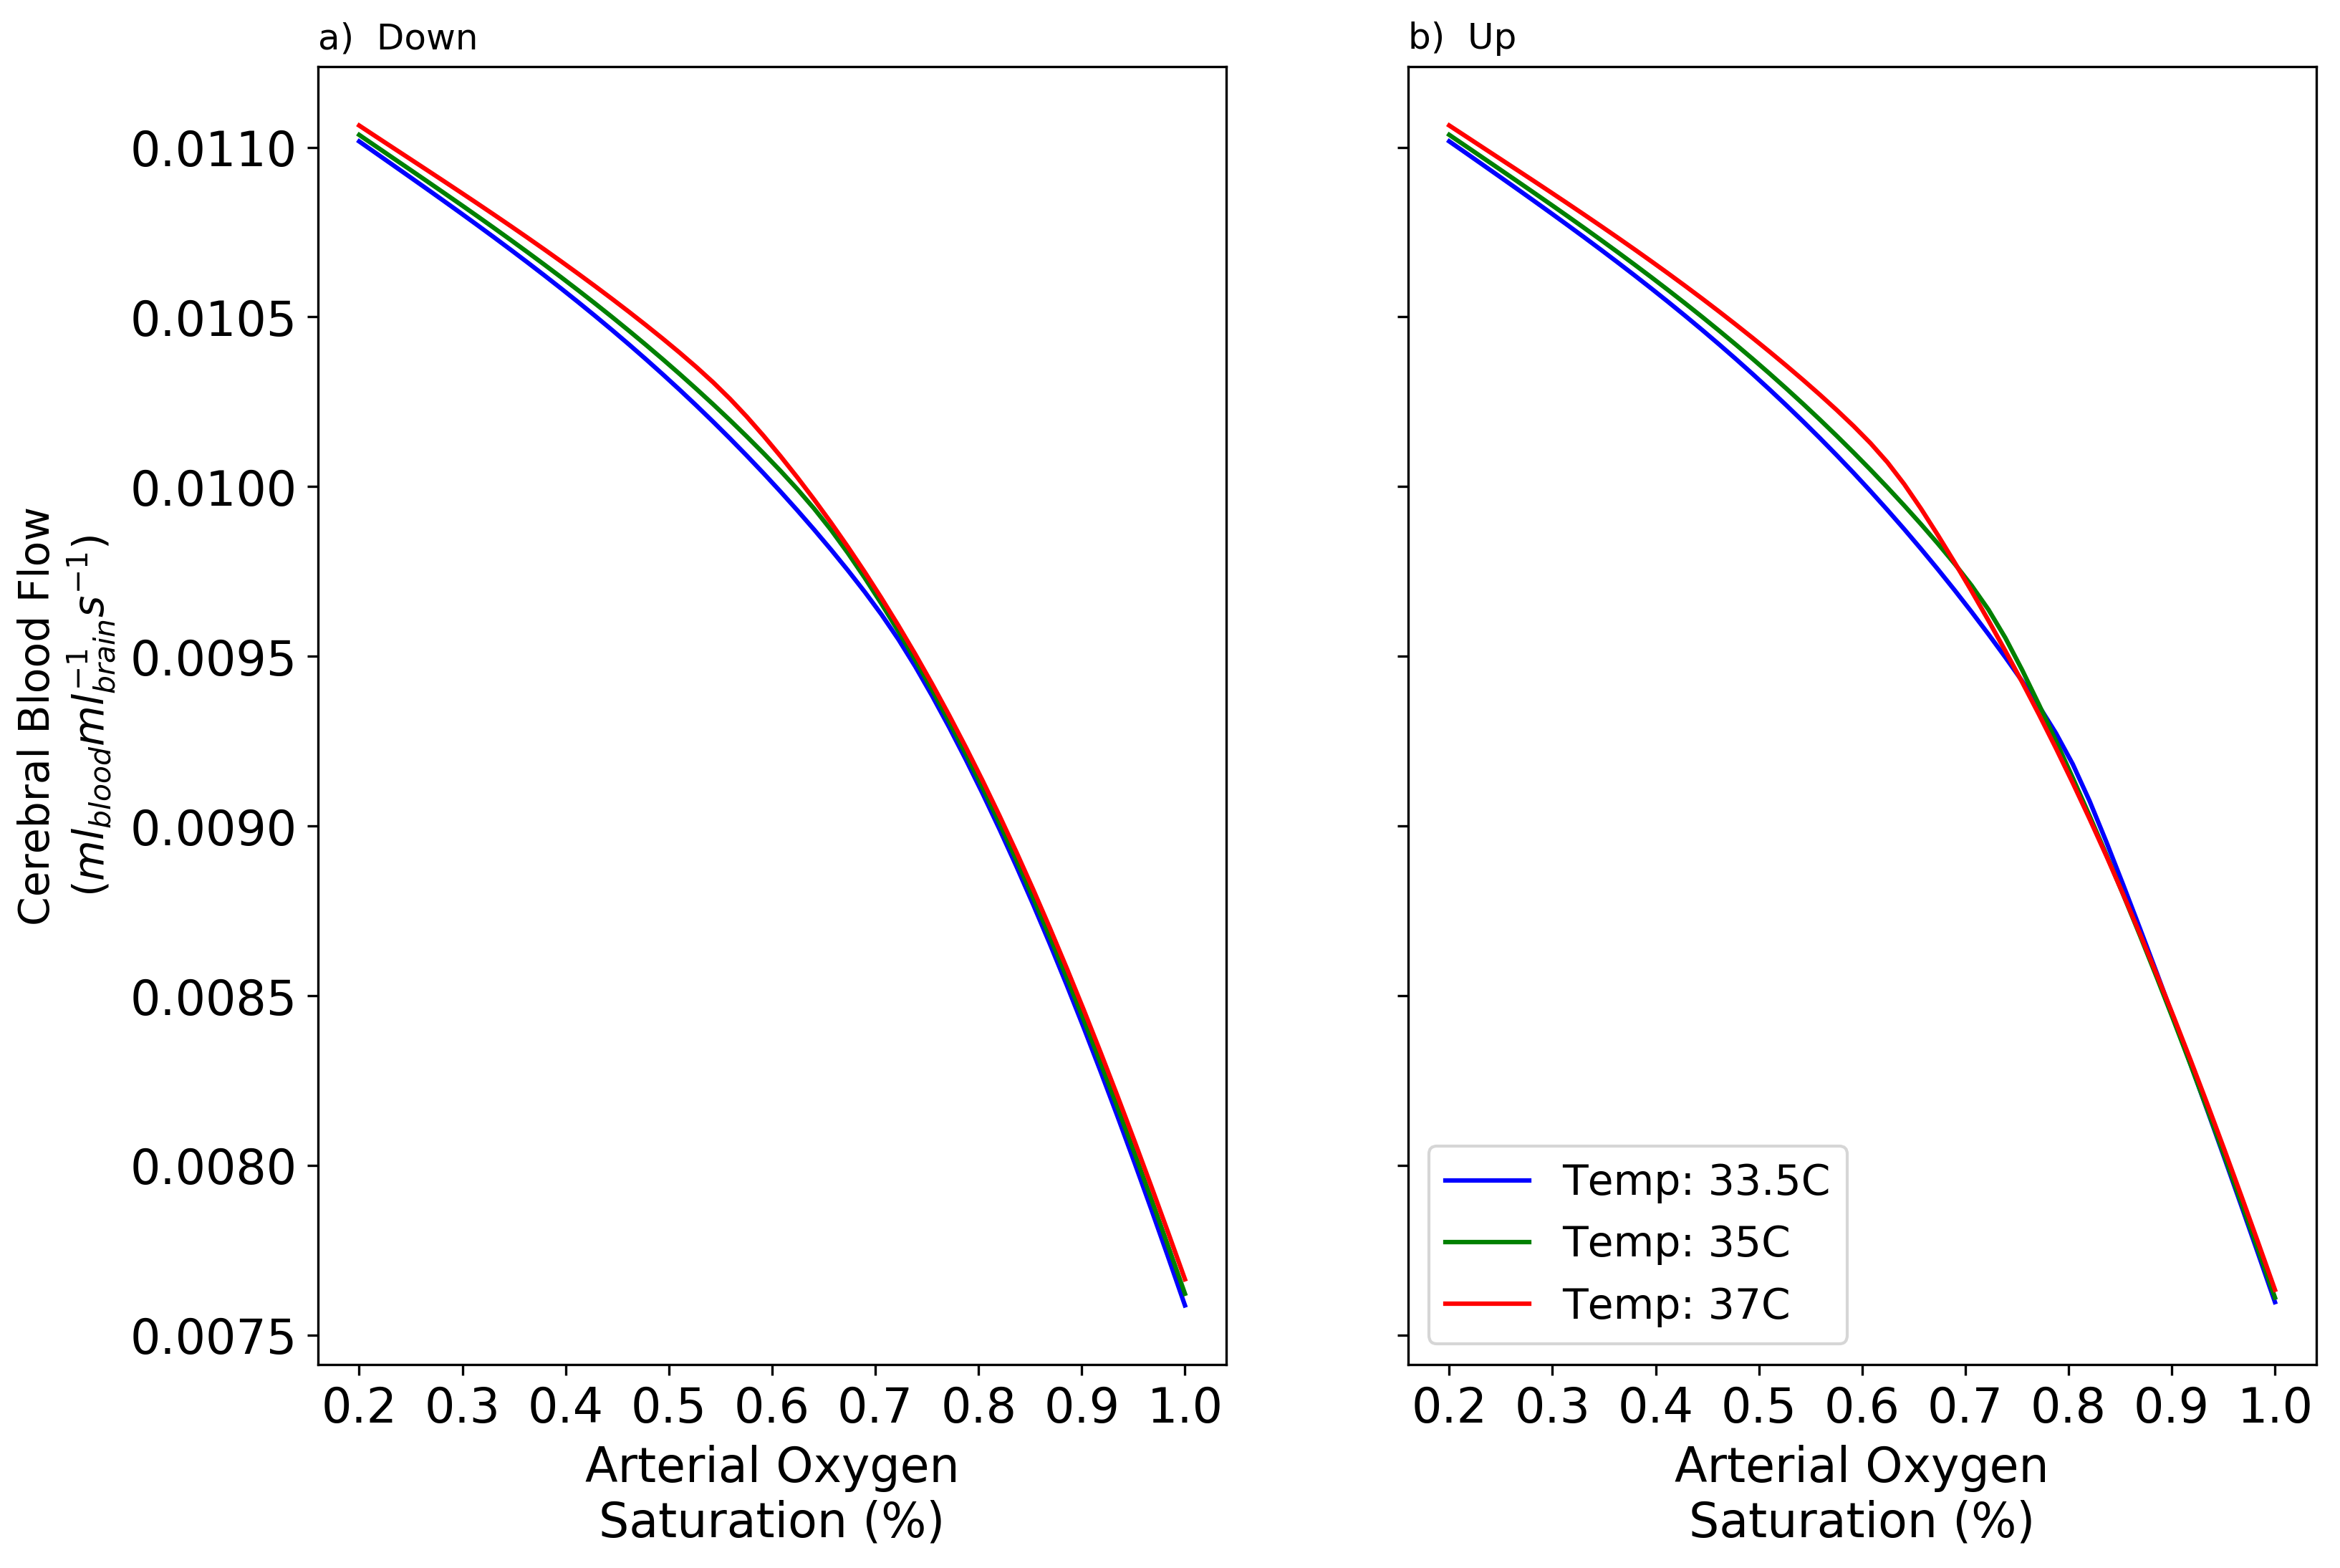

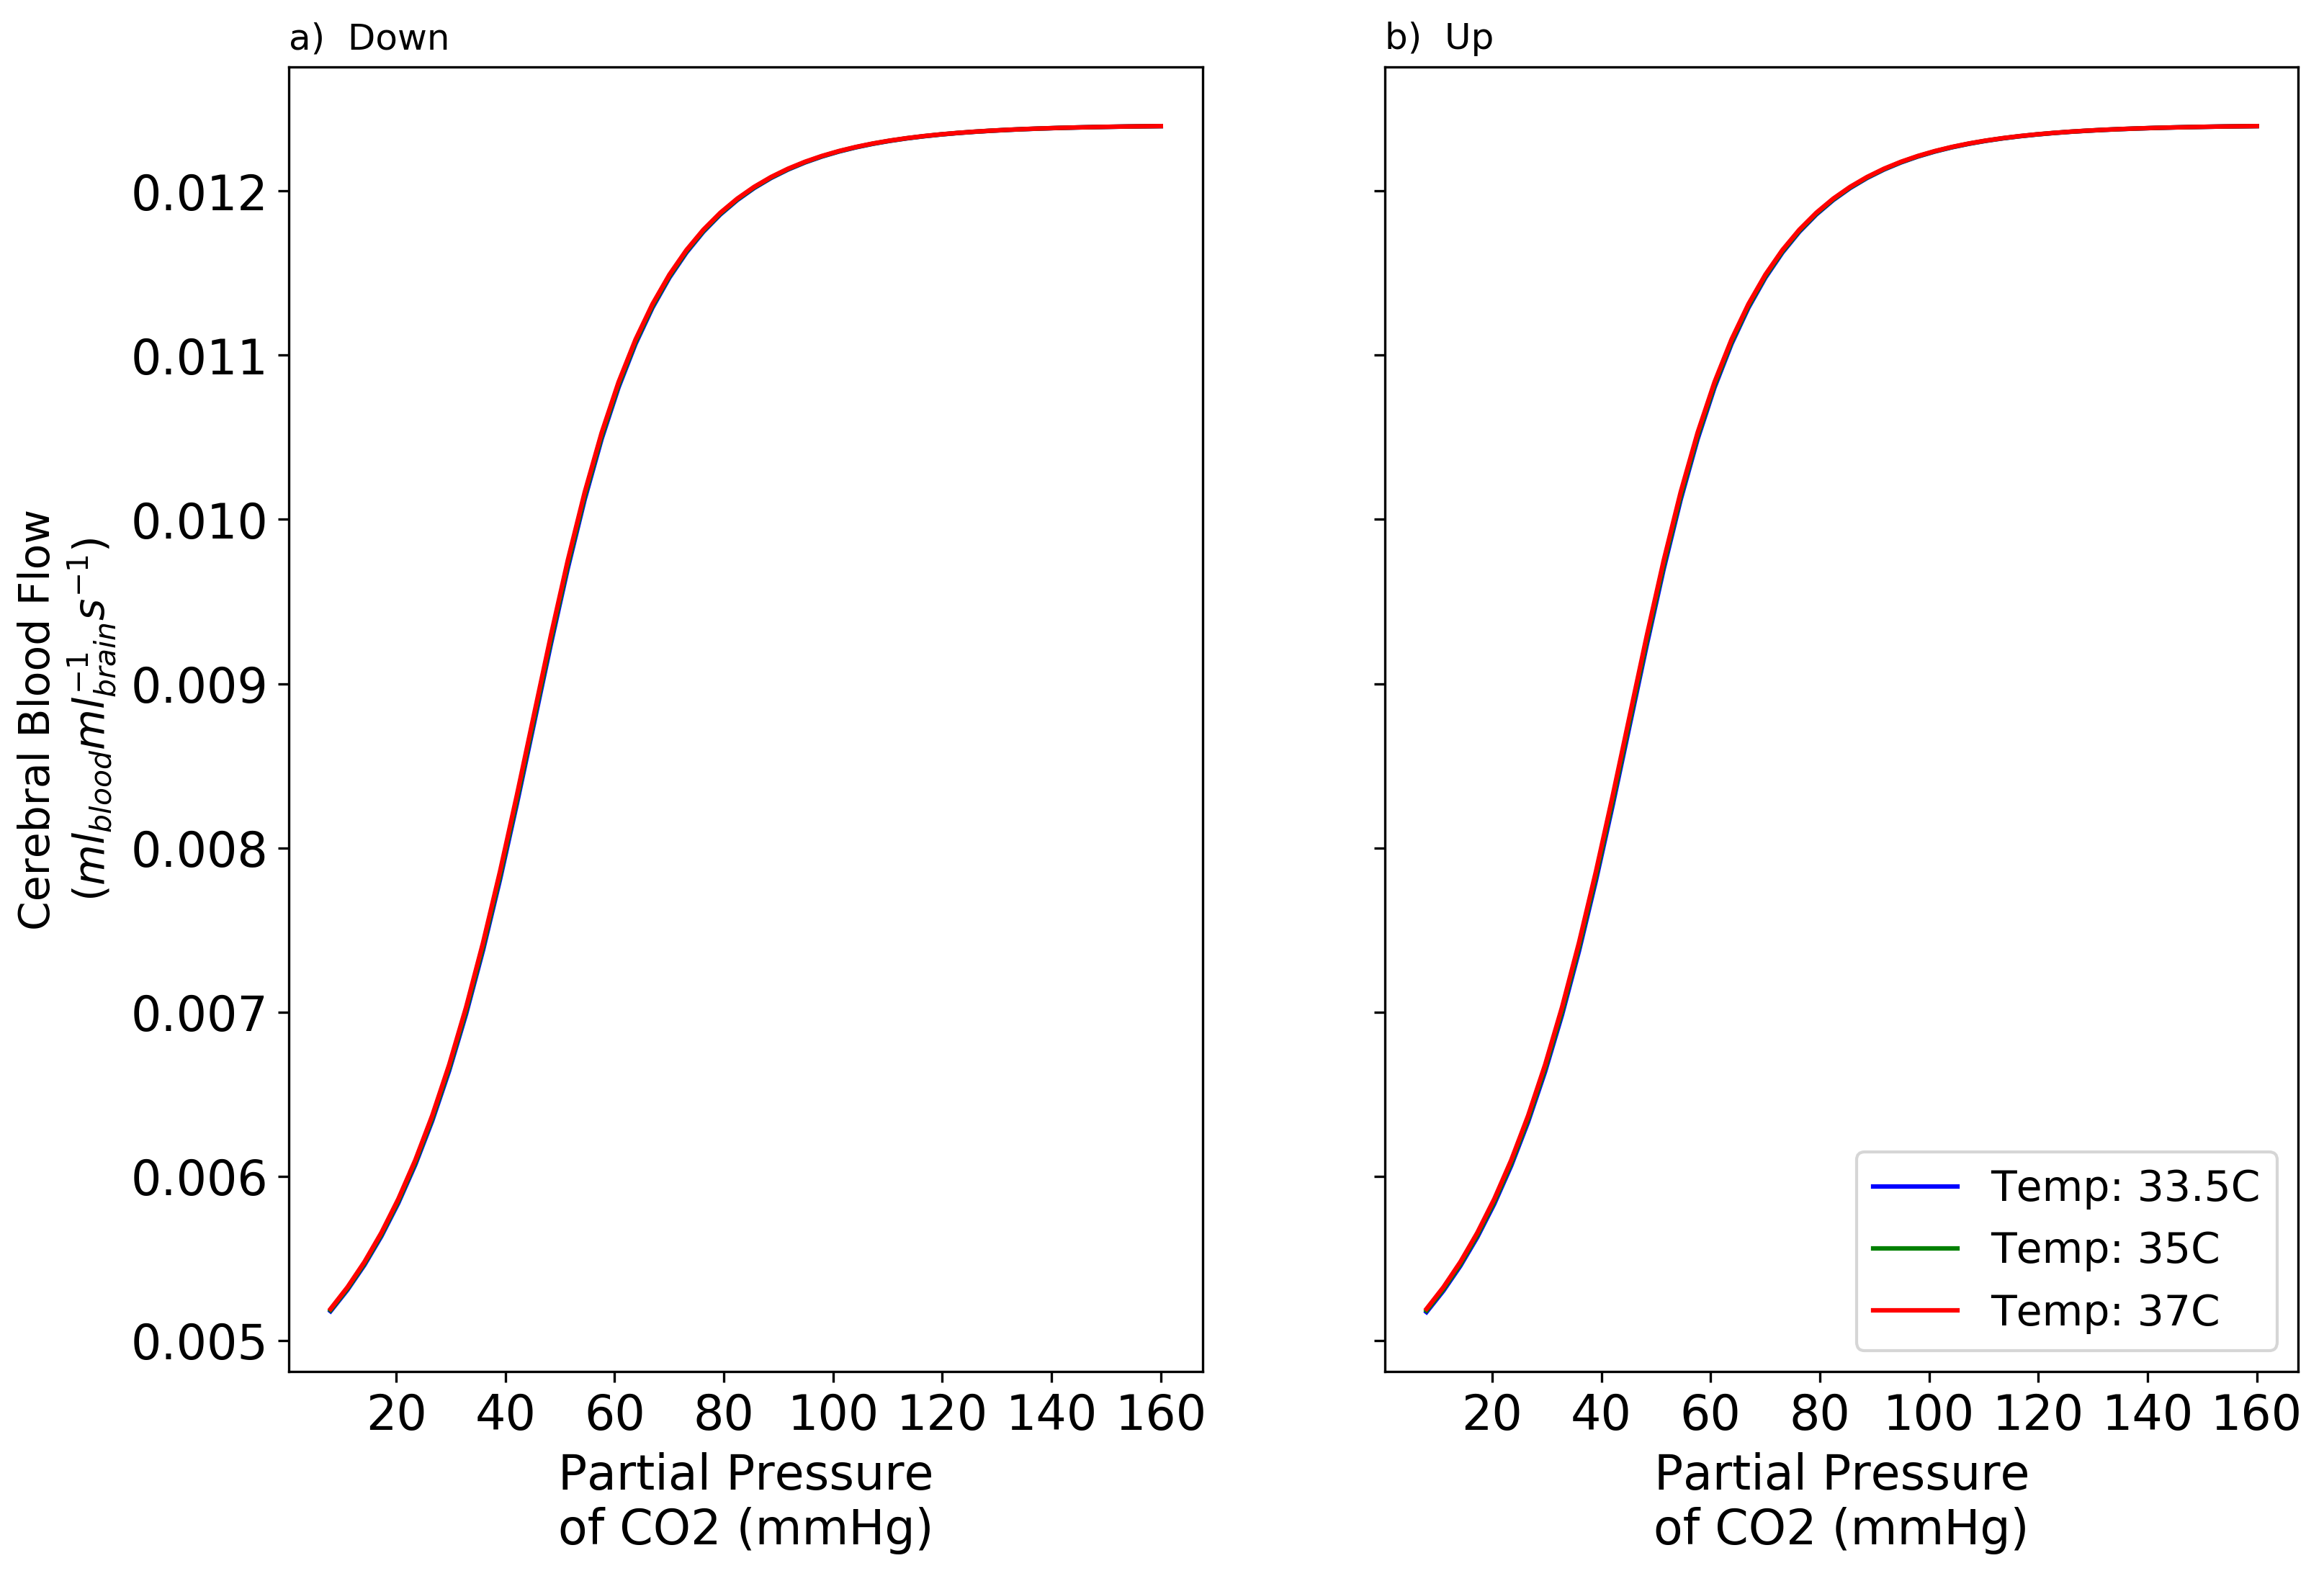

In [5]:
pa_fig_2 = generate_SS_figure("P_a", "bp_hypothermia_2", "Arterial Blood\nPressure (mmHg)")

sao2_fig_2 = generate_SS_figure("SaO2sup", "bp_hypothermia_2", 'Arterial Oxygen\nSaturation (%)', legend_loc="lower left")

paco2_fig_2 = generate_SS_figure("Pa_CO2", "bp_hypothermia_2", 'Partial Pressure\nof CO2 (mmHg)', legend_loc="lower right")

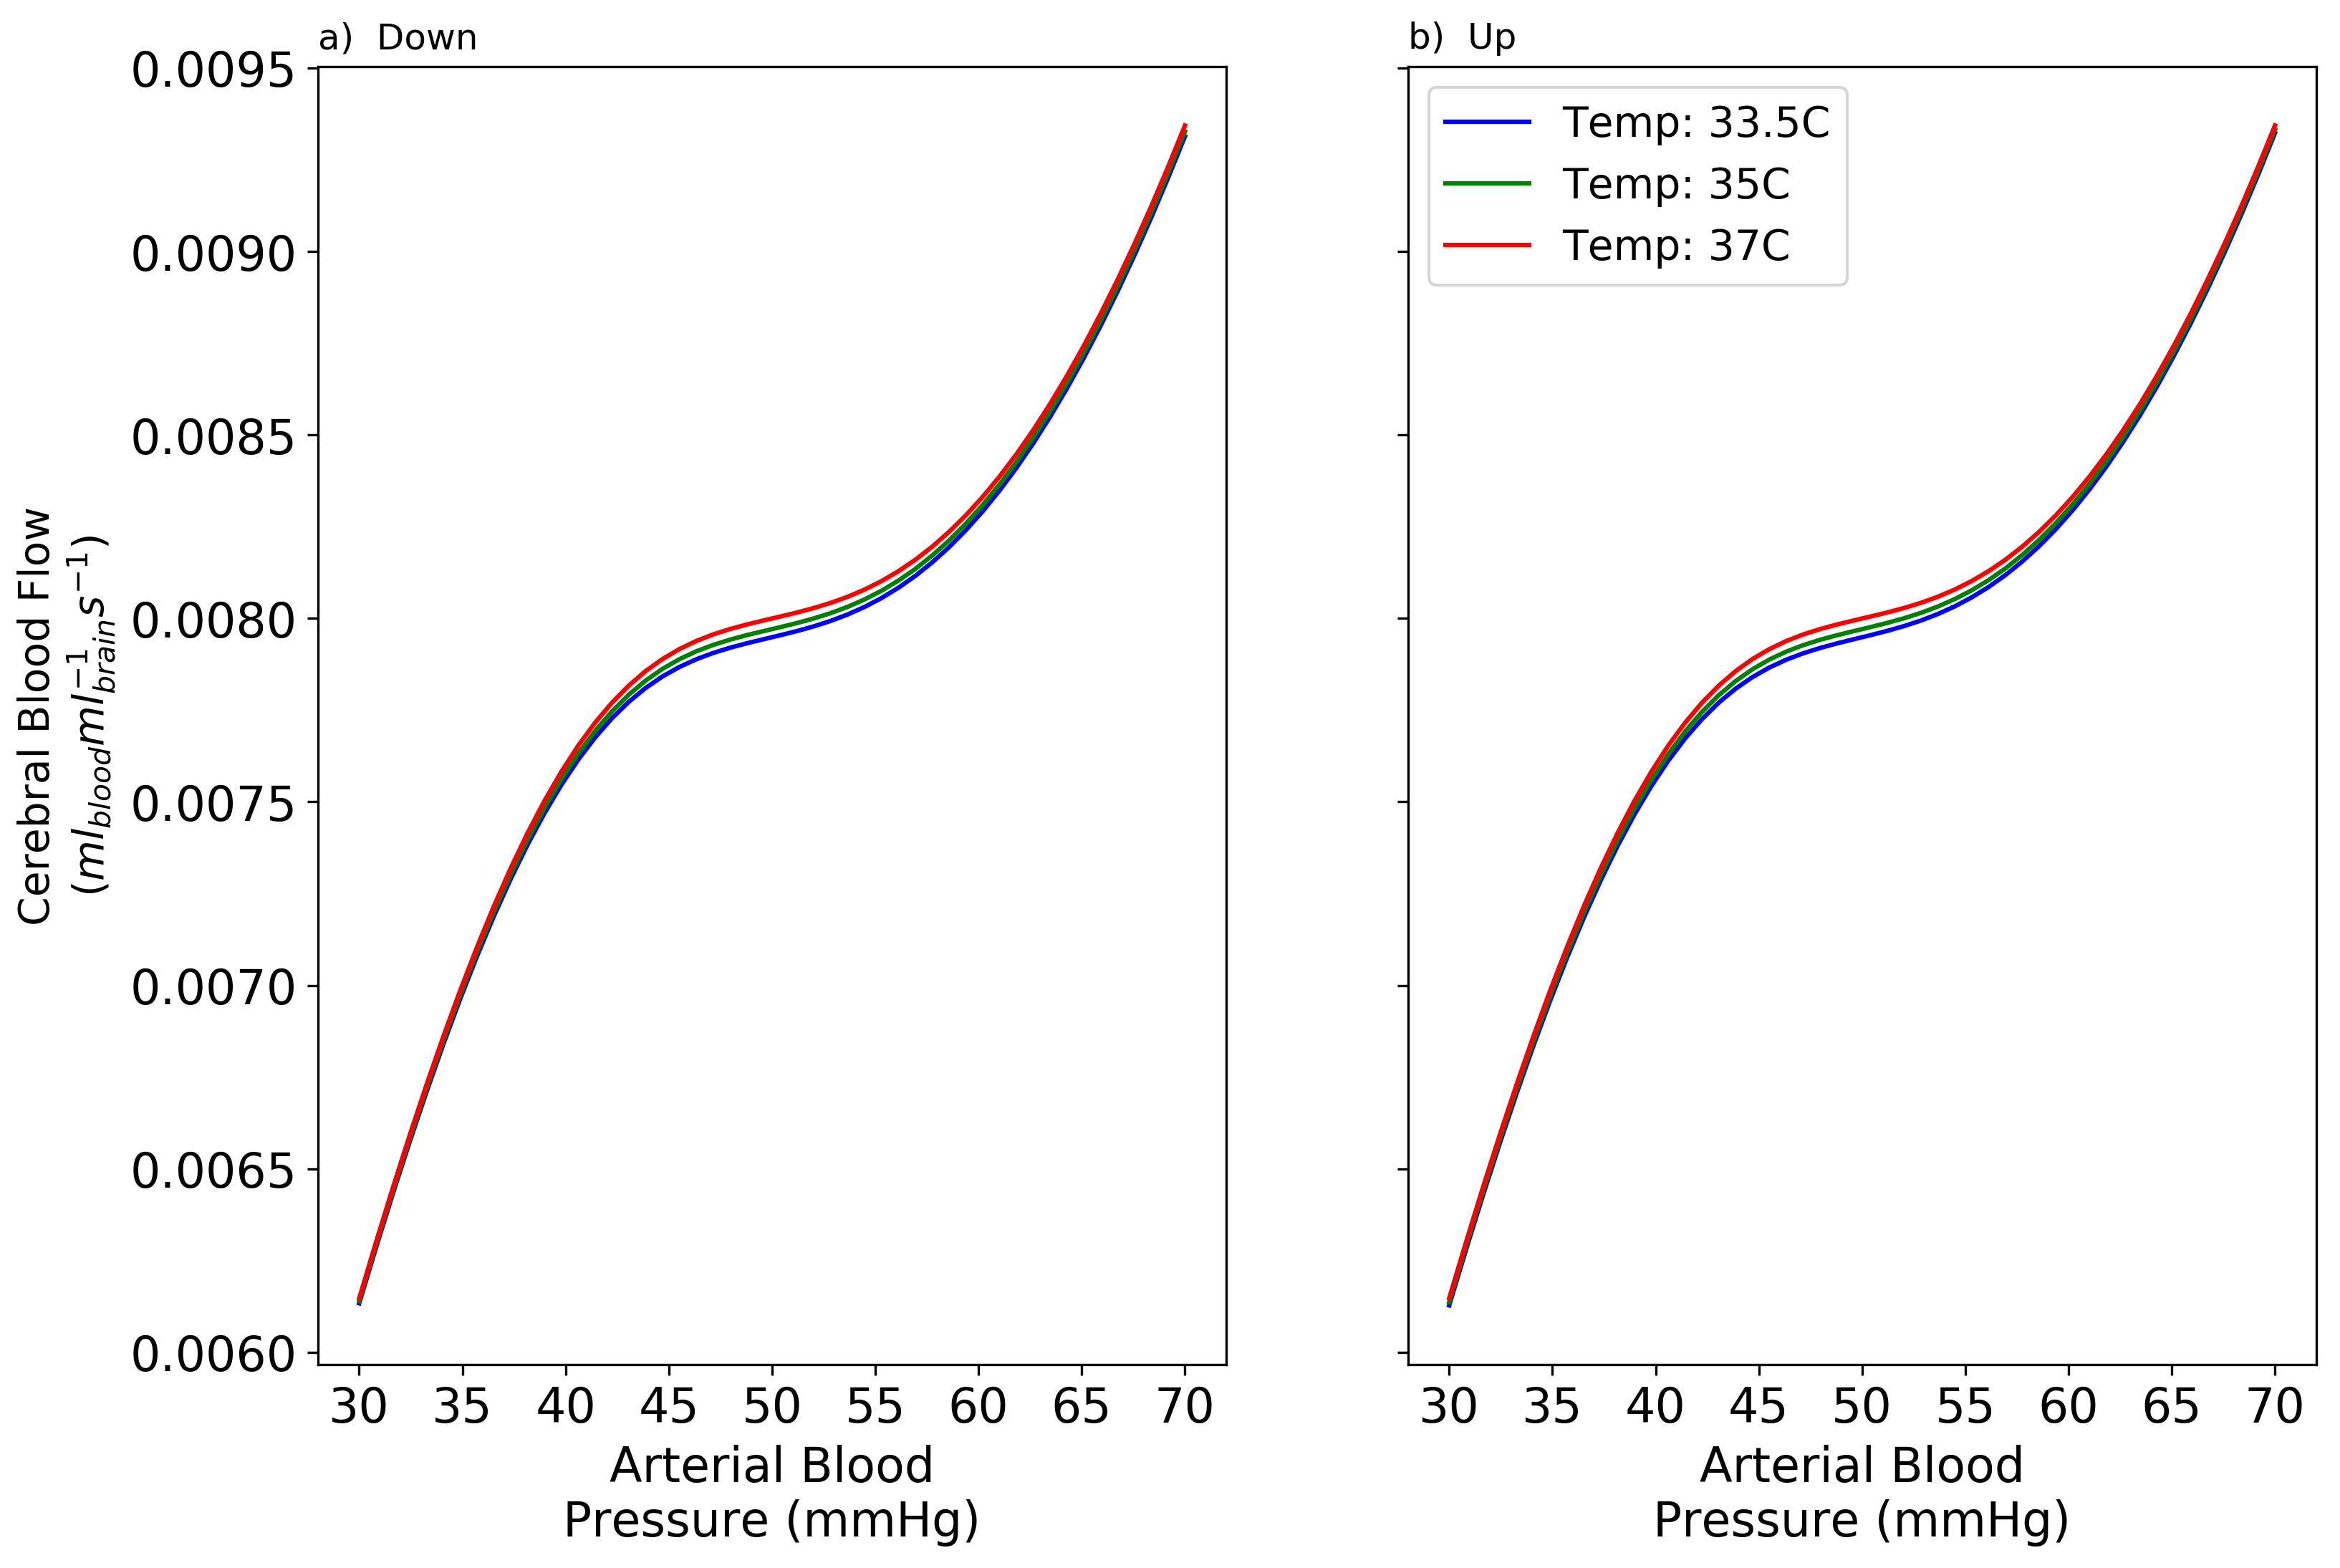

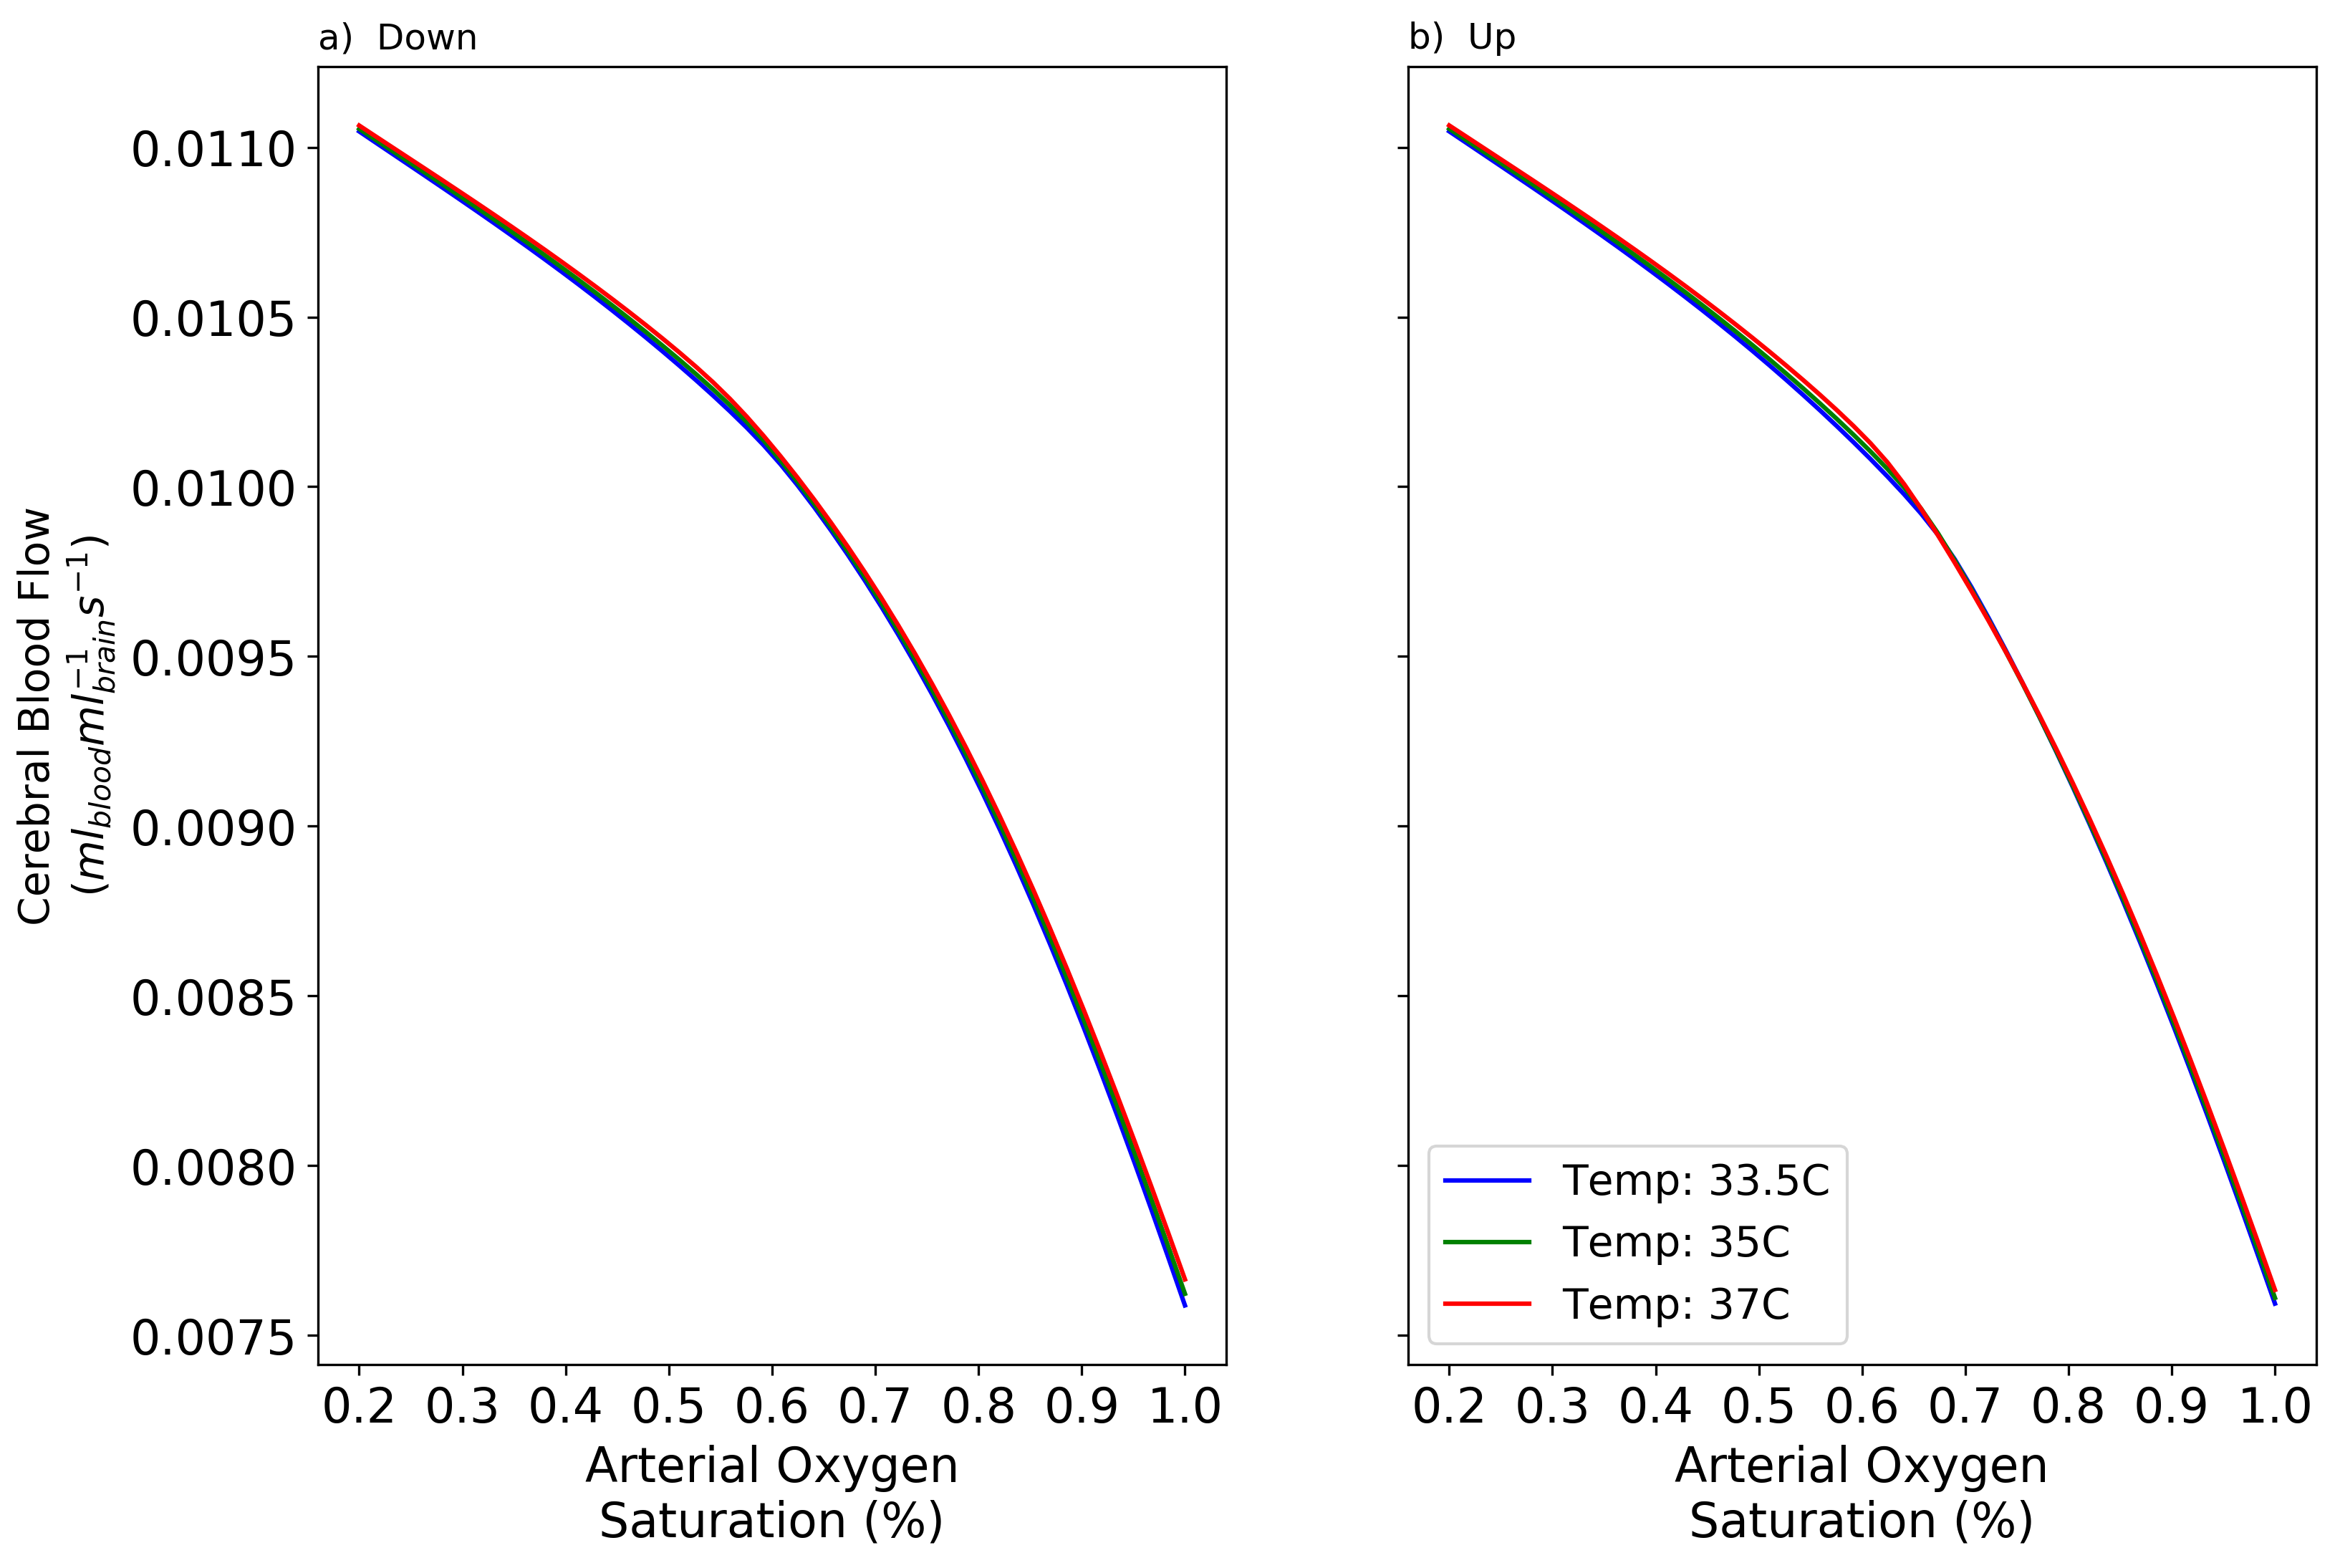

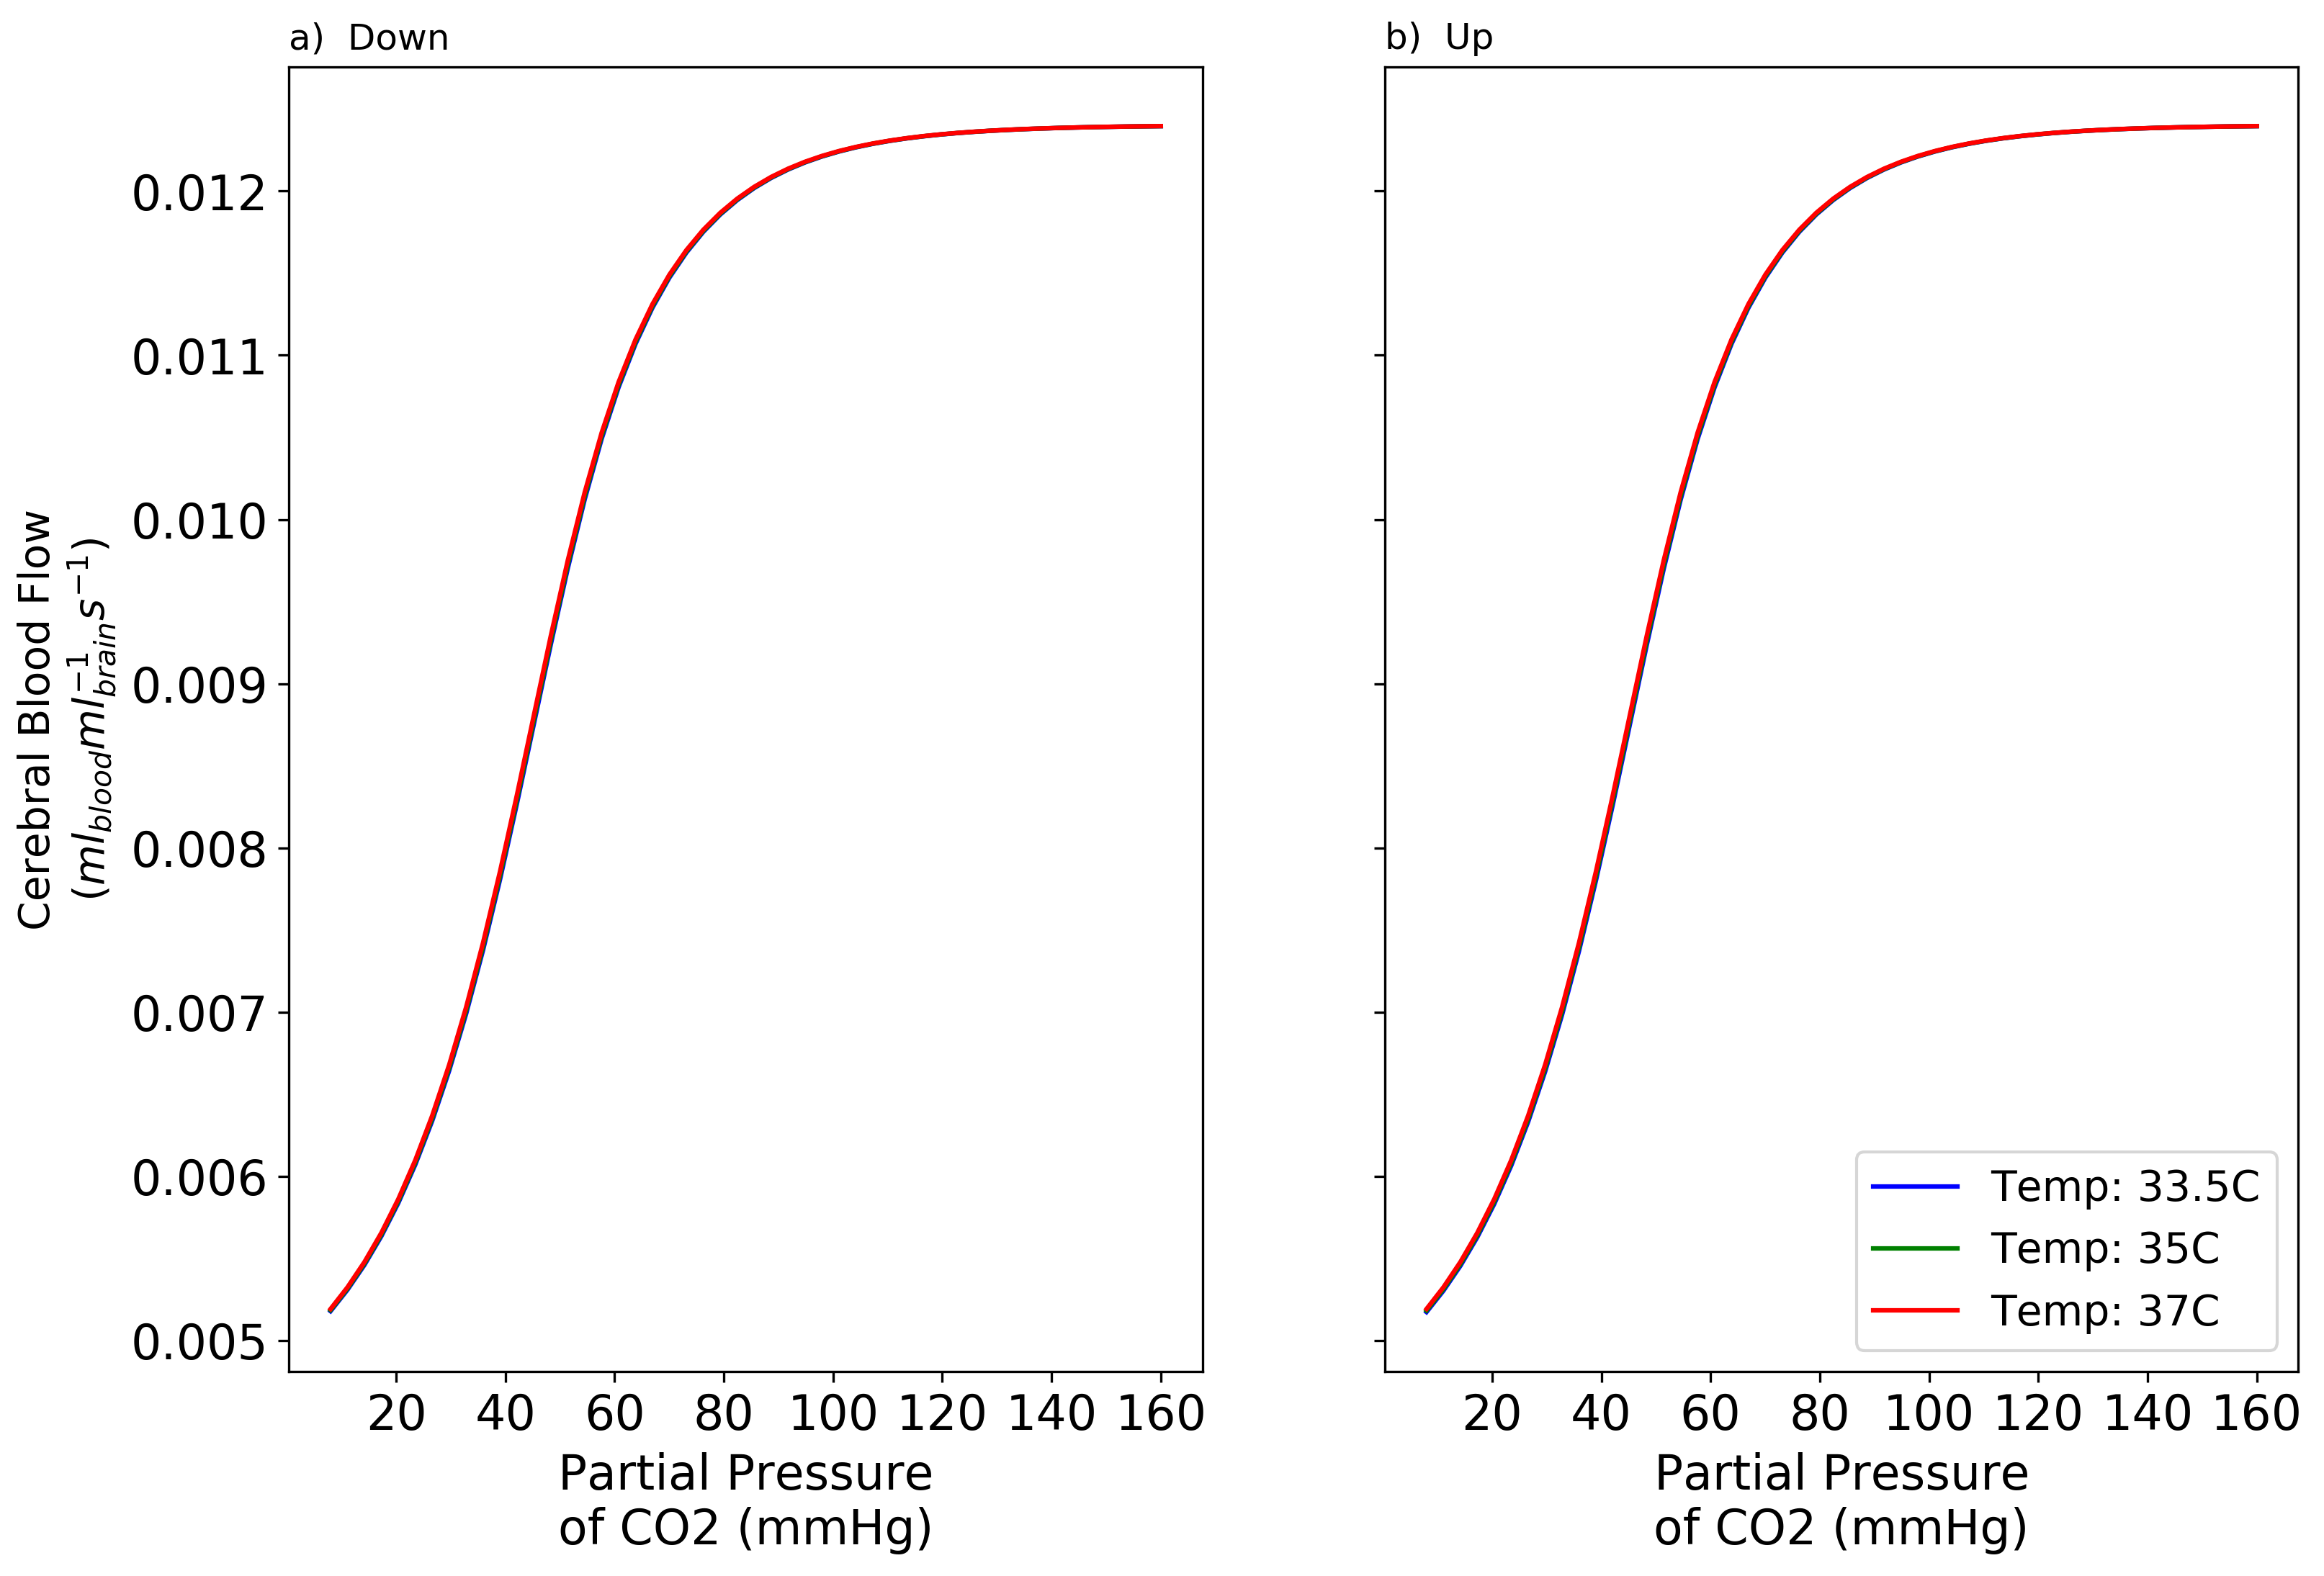

In [6]:
pa_fig_3 = generate_SS_figure("P_a", "bp_hypothermia_4", "Arterial Blood\nPressure (mmHg)")

sao2_fig_3 = generate_SS_figure("SaO2sup", "bp_hypothermia_4", 'Arterial Oxygen\nSaturation (%)', legend_loc="lower left")

paco2_fig_3 = generate_SS_figure("Pa_CO2", "bp_hypothermia_4", 'Partial Pressure\nof CO2 (mmHg)', legend_loc="lower right")

## Model output visualisation ##

In [145]:
bp2_data = get_outputs_json_data(model="bp_hypothermia_2", direction="down")
bp3_data = get_outputs_json_data(model="bp_hypothermia_4", direction="down")

In [149]:
bp3_data.keys()

dict_keys(['1.0_0.1', '1.0_0.12000000000000001', '1.0_0.14', '1.0_0.16000000000000003', '1.0_0.18000000000000002', '1.0_0.2', '1.0_0.22000000000000003', '1.0_0.24000000000000002', '1.0_0.26', '1.0_0.28', '1.0_0.30000000000000004', '1.0_0.32000000000000006', '1.0_0.3400000000000001', '1.0_0.3600000000000001', '1.0_0.38', '1.0_0.4', '1.0_0.42000000000000004', '1.0_0.44000000000000006', '1.0_0.4600000000000001', '1.0_0.4800000000000001', '1.0_0.5000000000000001', '1.0_0.5200000000000001', '1.0_0.54', '1.0_0.56', '1.0_0.5800000000000001', '1.0_0.6000000000000001', '1.0_0.6200000000000001', '1.0_0.6400000000000001', '1.0_0.66', '1.0_0.68', '1.0_0.7000000000000001', '1.0_0.7200000000000001', '1.0_0.7400000000000001', '1.0_0.7600000000000001', '1.0_0.7800000000000001', '1.0_0.8000000000000002', '1.0_0.8200000000000002', '1.0_0.8400000000000001', '1.0_0.8600000000000001', '1.0_0.8800000000000001', '1.0_0.9000000000000001', '1.0_0.9200000000000002', '1.0_0.9400000000000002', '1.0_0.960000000000

In [152]:
def parse_json_data(json_data):
    parsed_data={}
    for k, v in json_data.items():
        params = tuple(map(lambda x: round(float(x),2), k.split('_')))
        parsed_data[params] = {output: data[-1] for output, data in v.items()}
        
    return parsed_data

def get_cols_and_rows(parsed_json_data):
    """
    Get set of col and rows from json keys.
    
    Return
    ======
    
    cols, rows : sets of the param values
    """
    rows = []
    cols = []
    for k in parsed_json_data.keys():
        rows.append(k[0])
        cols.append(k[1])
    return sorted(set(cols)), sorted(set(rows))
        
def create_dataframe(parsed_json_data):
    cols, rows = get_cols_and_rows(parsed_json_data)
    df = pd.DataFrame(index=rows, columns=cols)
    return df

def fill_dataframe(json_data, output):
    parsed_json_data = parse_json_data(json_data)
    df = create_dataframe(parsed_json_data)
    for k, v in parsed_json_data.items():
        df.loc[k] = v[output]
    return df
        
def get_output_heatmap(json_data, output, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(1)
    df = fill_dataframe(json_data, output)
    g = sns.heatmap(df.apply(pd.to_numeric), ax=ax, cmap="BuPu")
    g.set_title(output)
    if xlabel:
        g.set_xlabel(xlabel)
    if ylabel: 
        g.set_ylabel(ylabel)
    return df, g

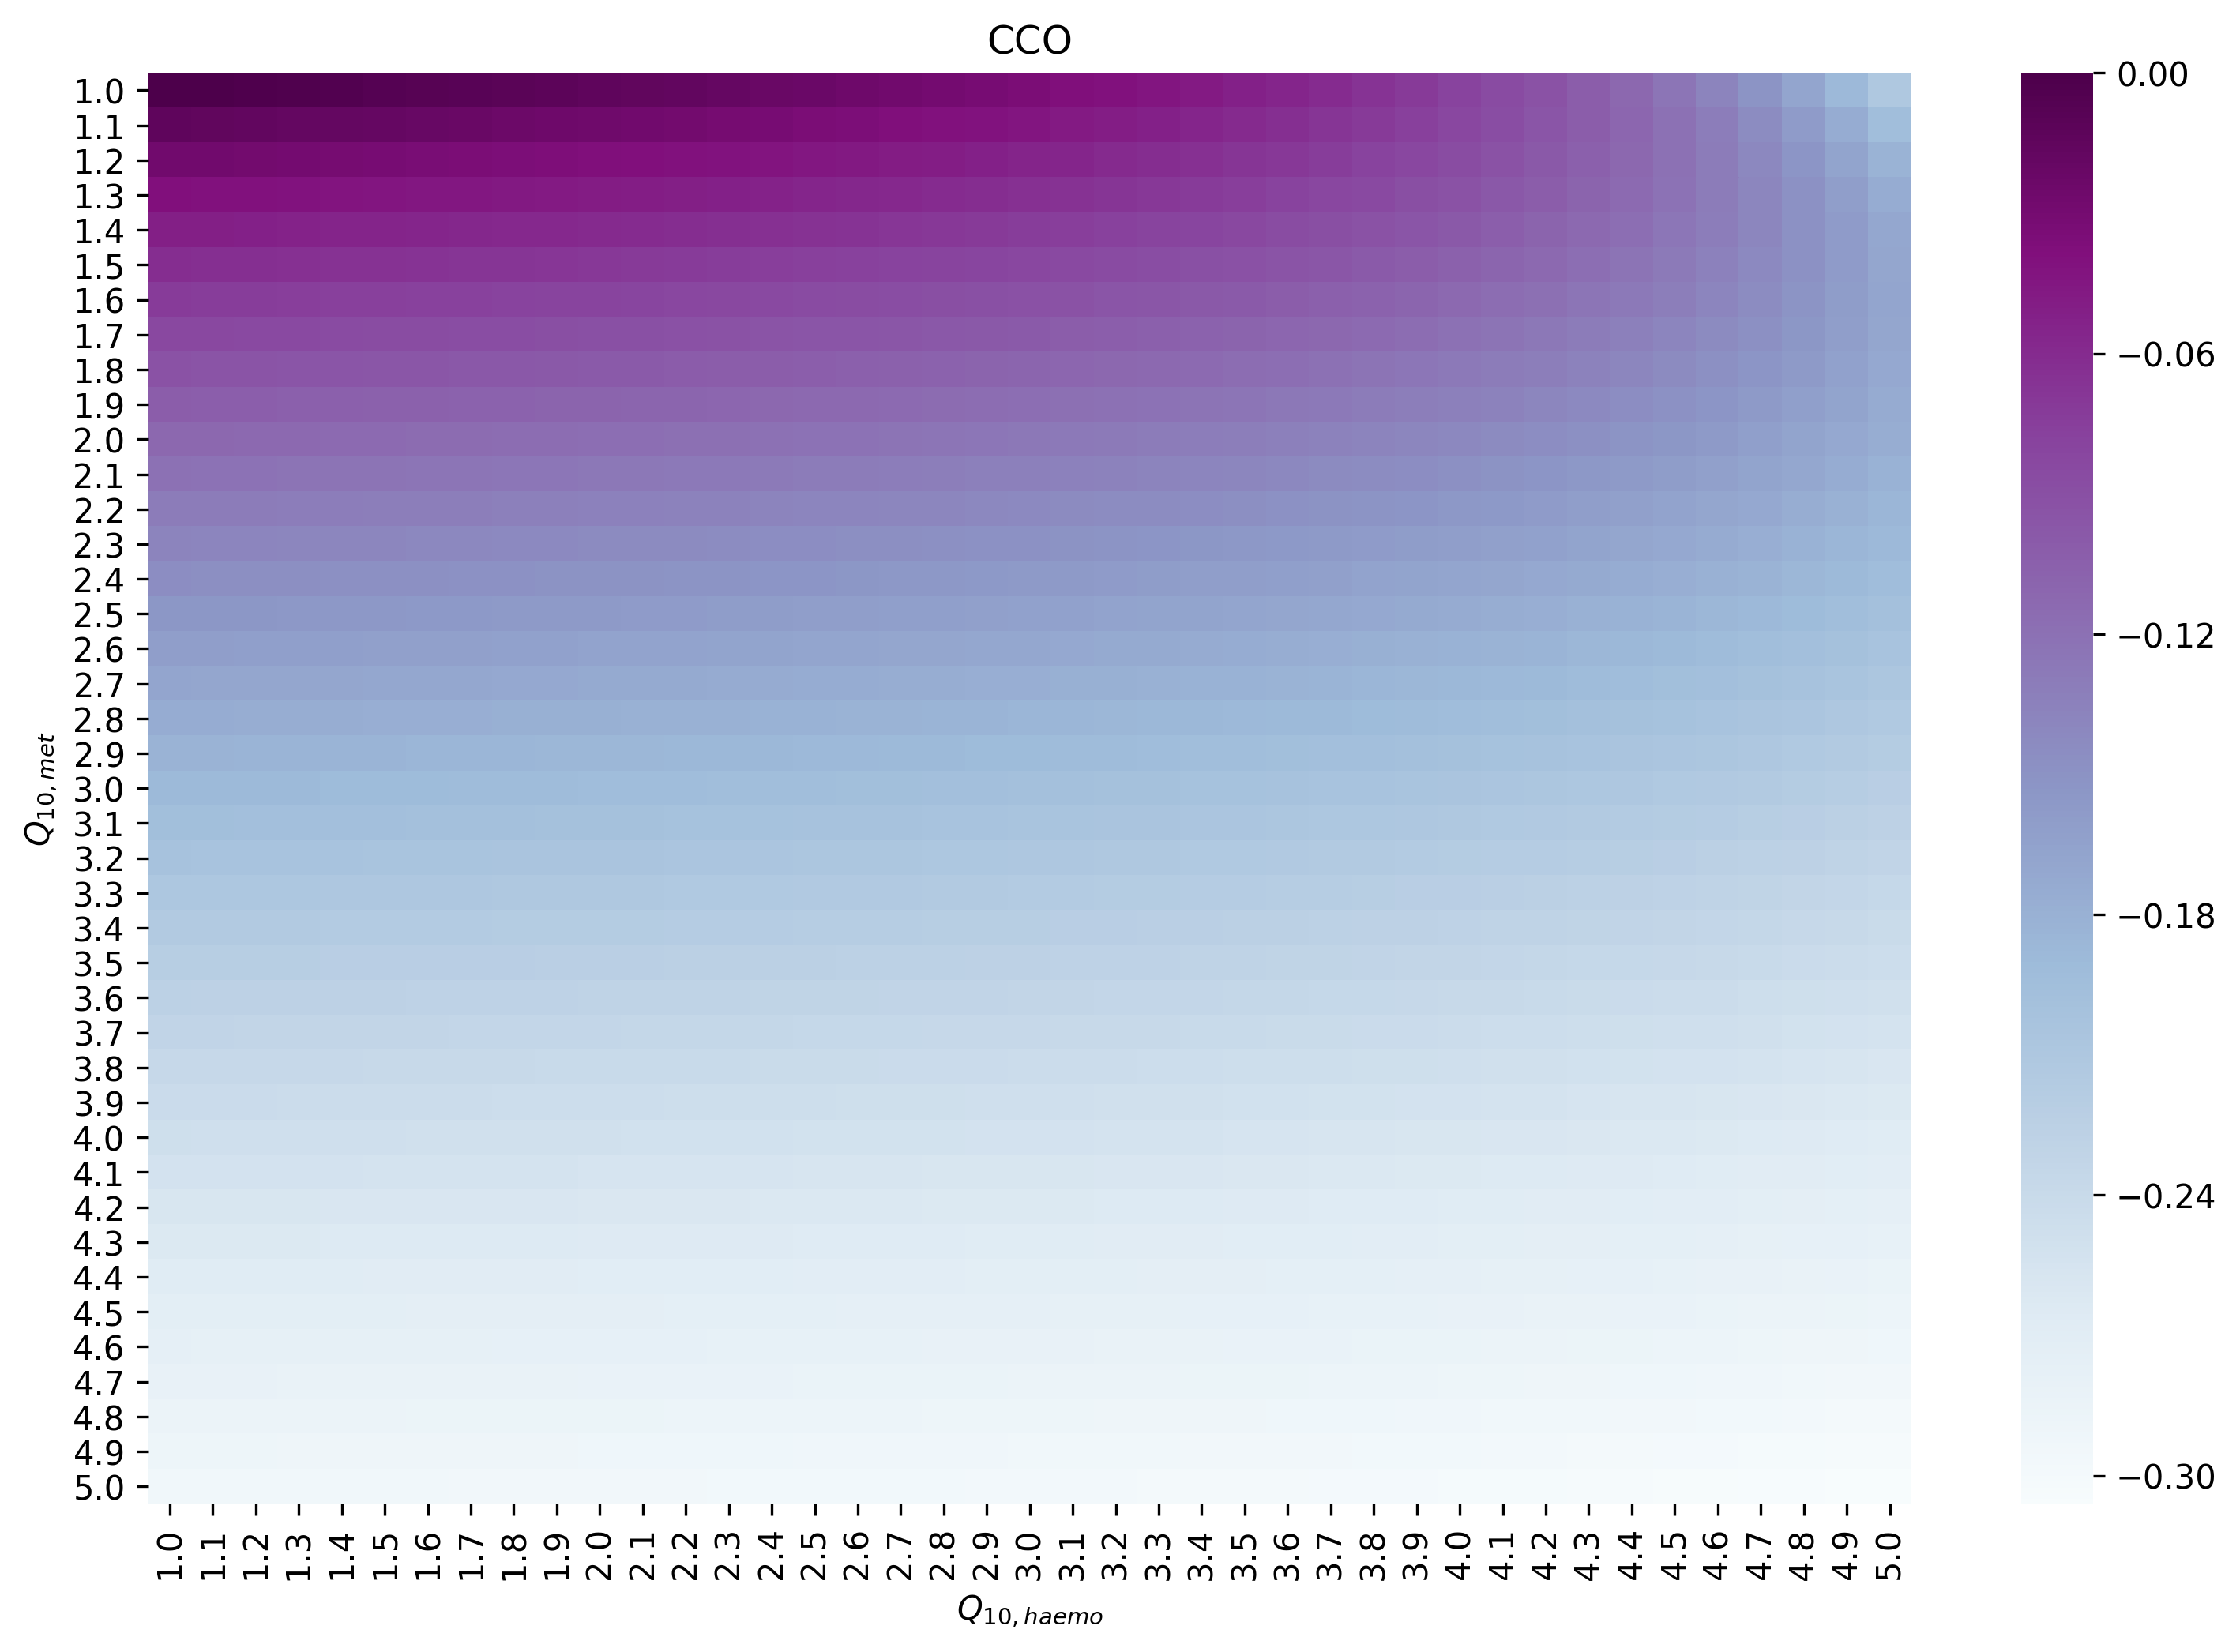

In [153]:
_ = get_output_heatmap(bp2_data, 'CCO', xlabel="$Q_{10, haemo}$", ylabel="$Q_{10,met}$" )



## Initial Notes ##

BPH4 with $q_{diff} > 1$ produces no change - odel becomes insensitive to further changes.

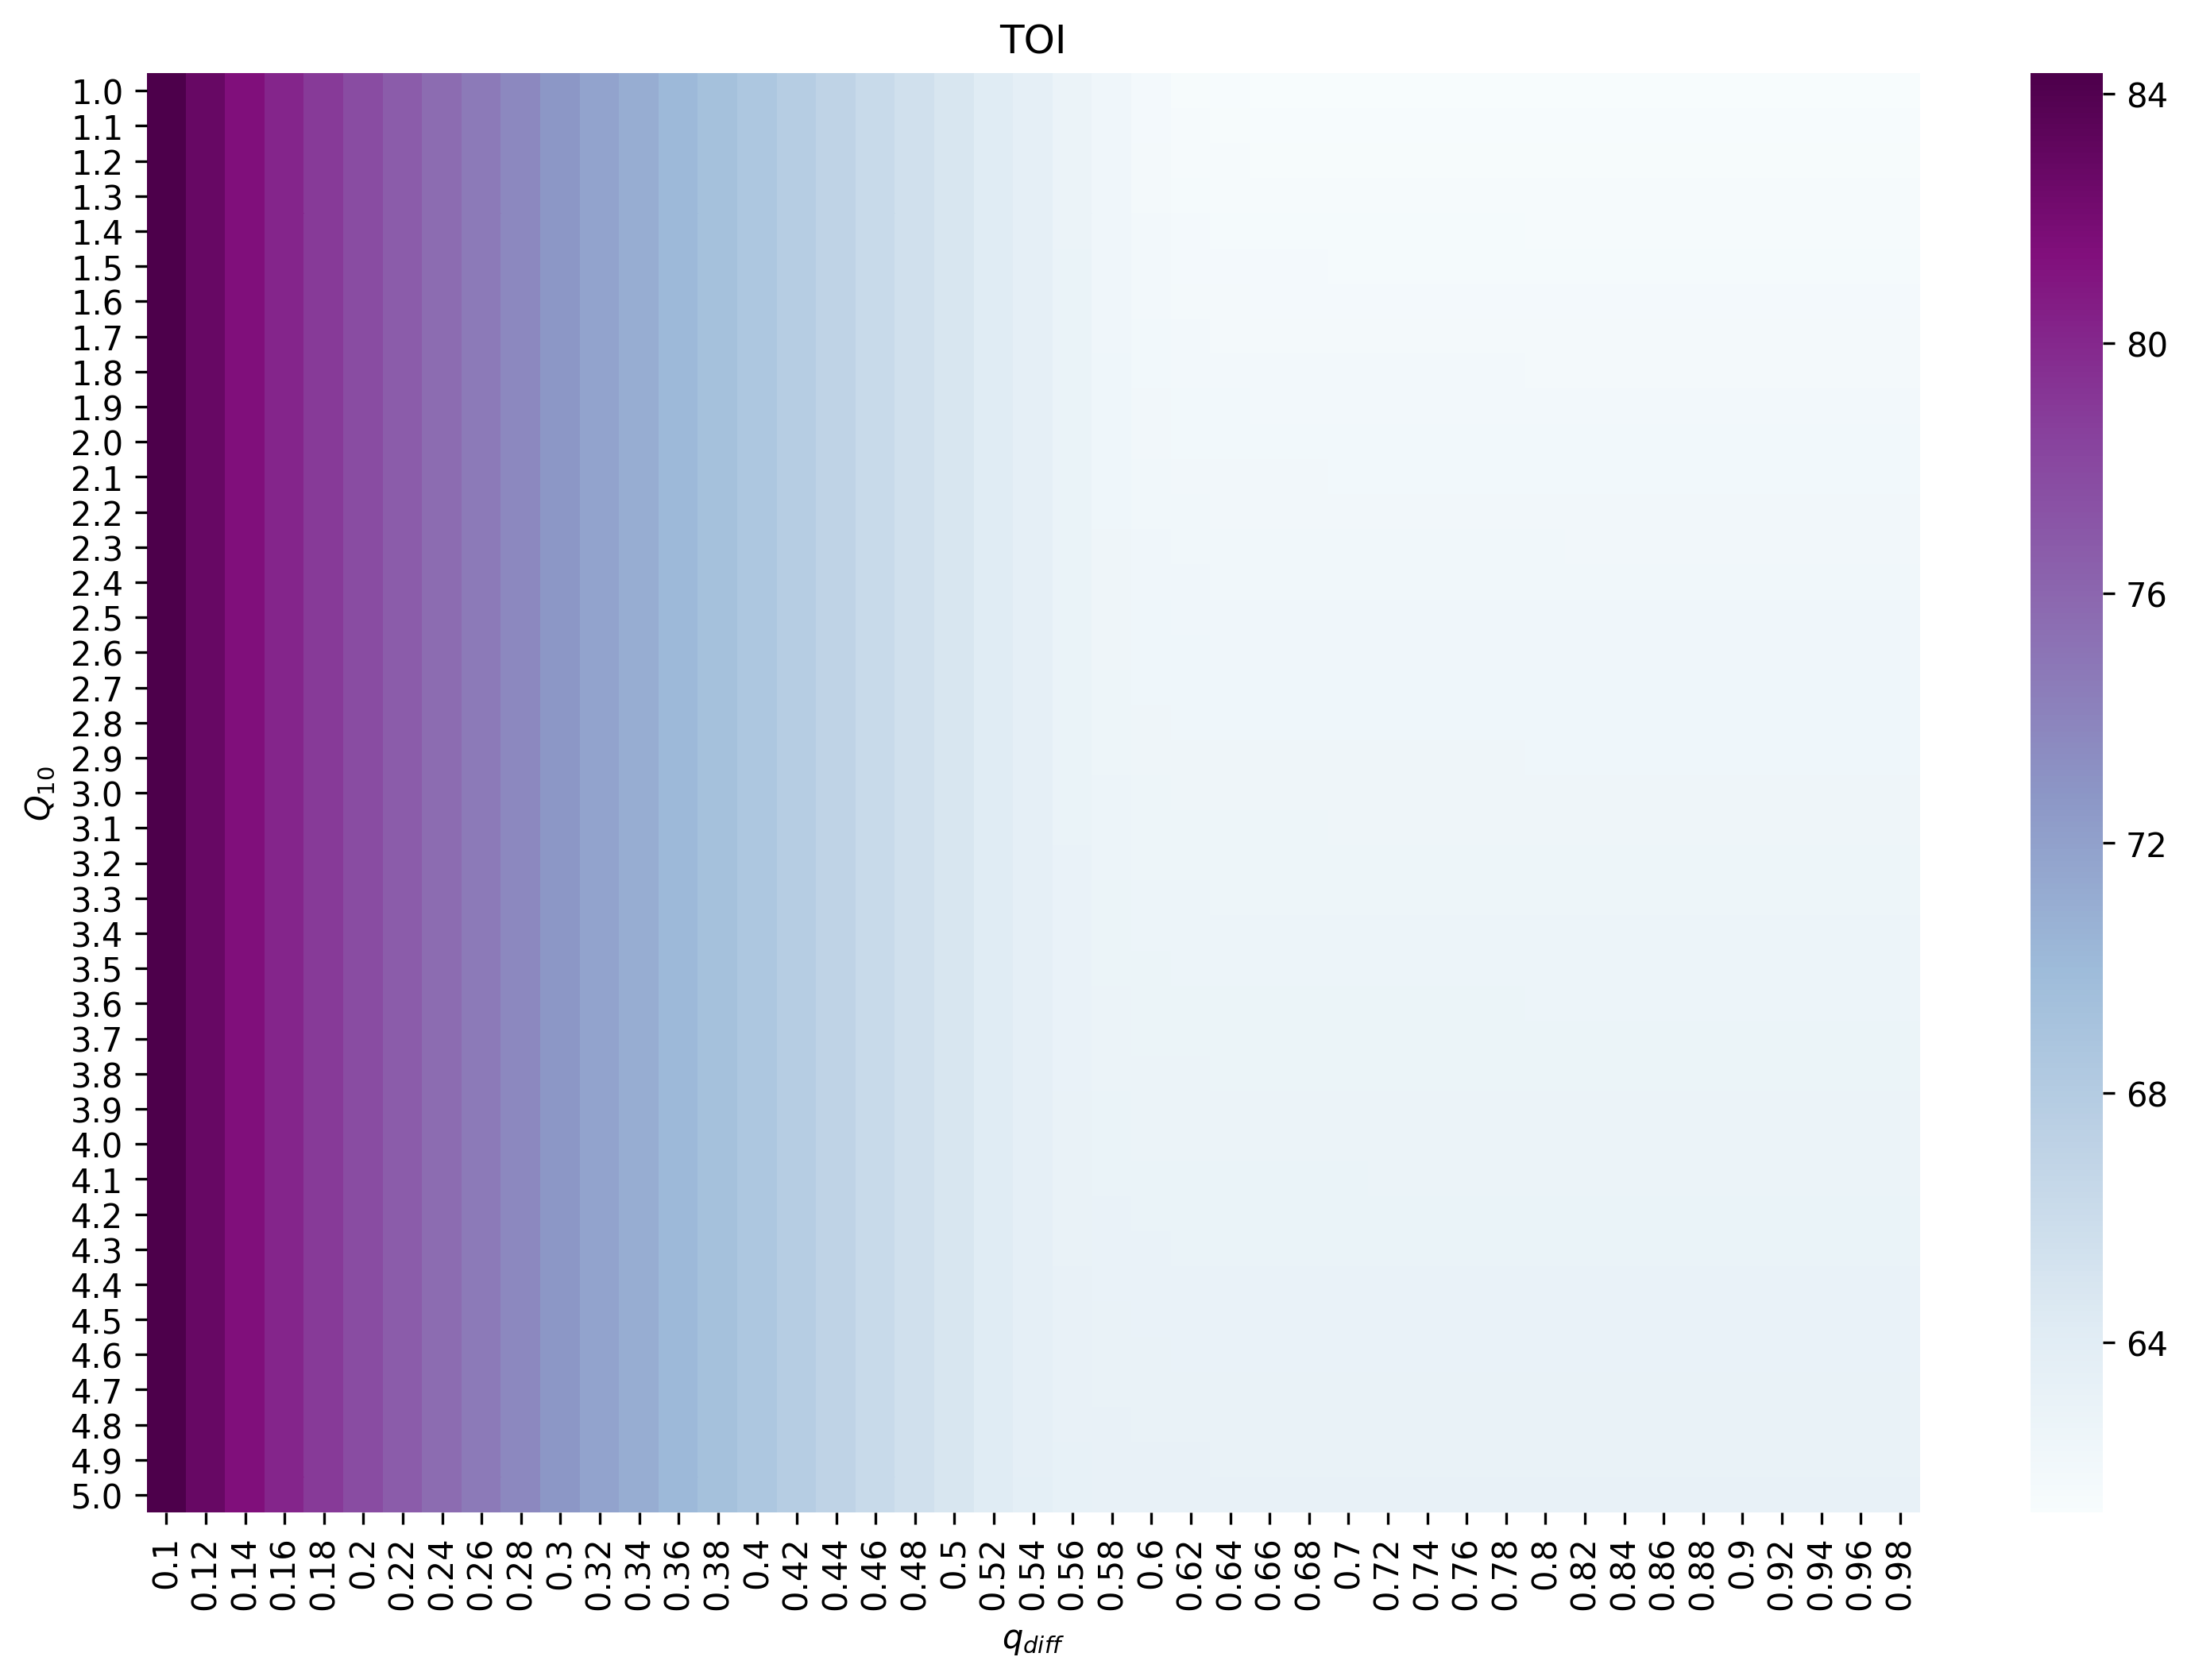

In [166]:
df, g = get_output_heatmap(bp3_data, 'TOI', xlabel="$q_{diff}$", ylabel="$Q_{10}$" )

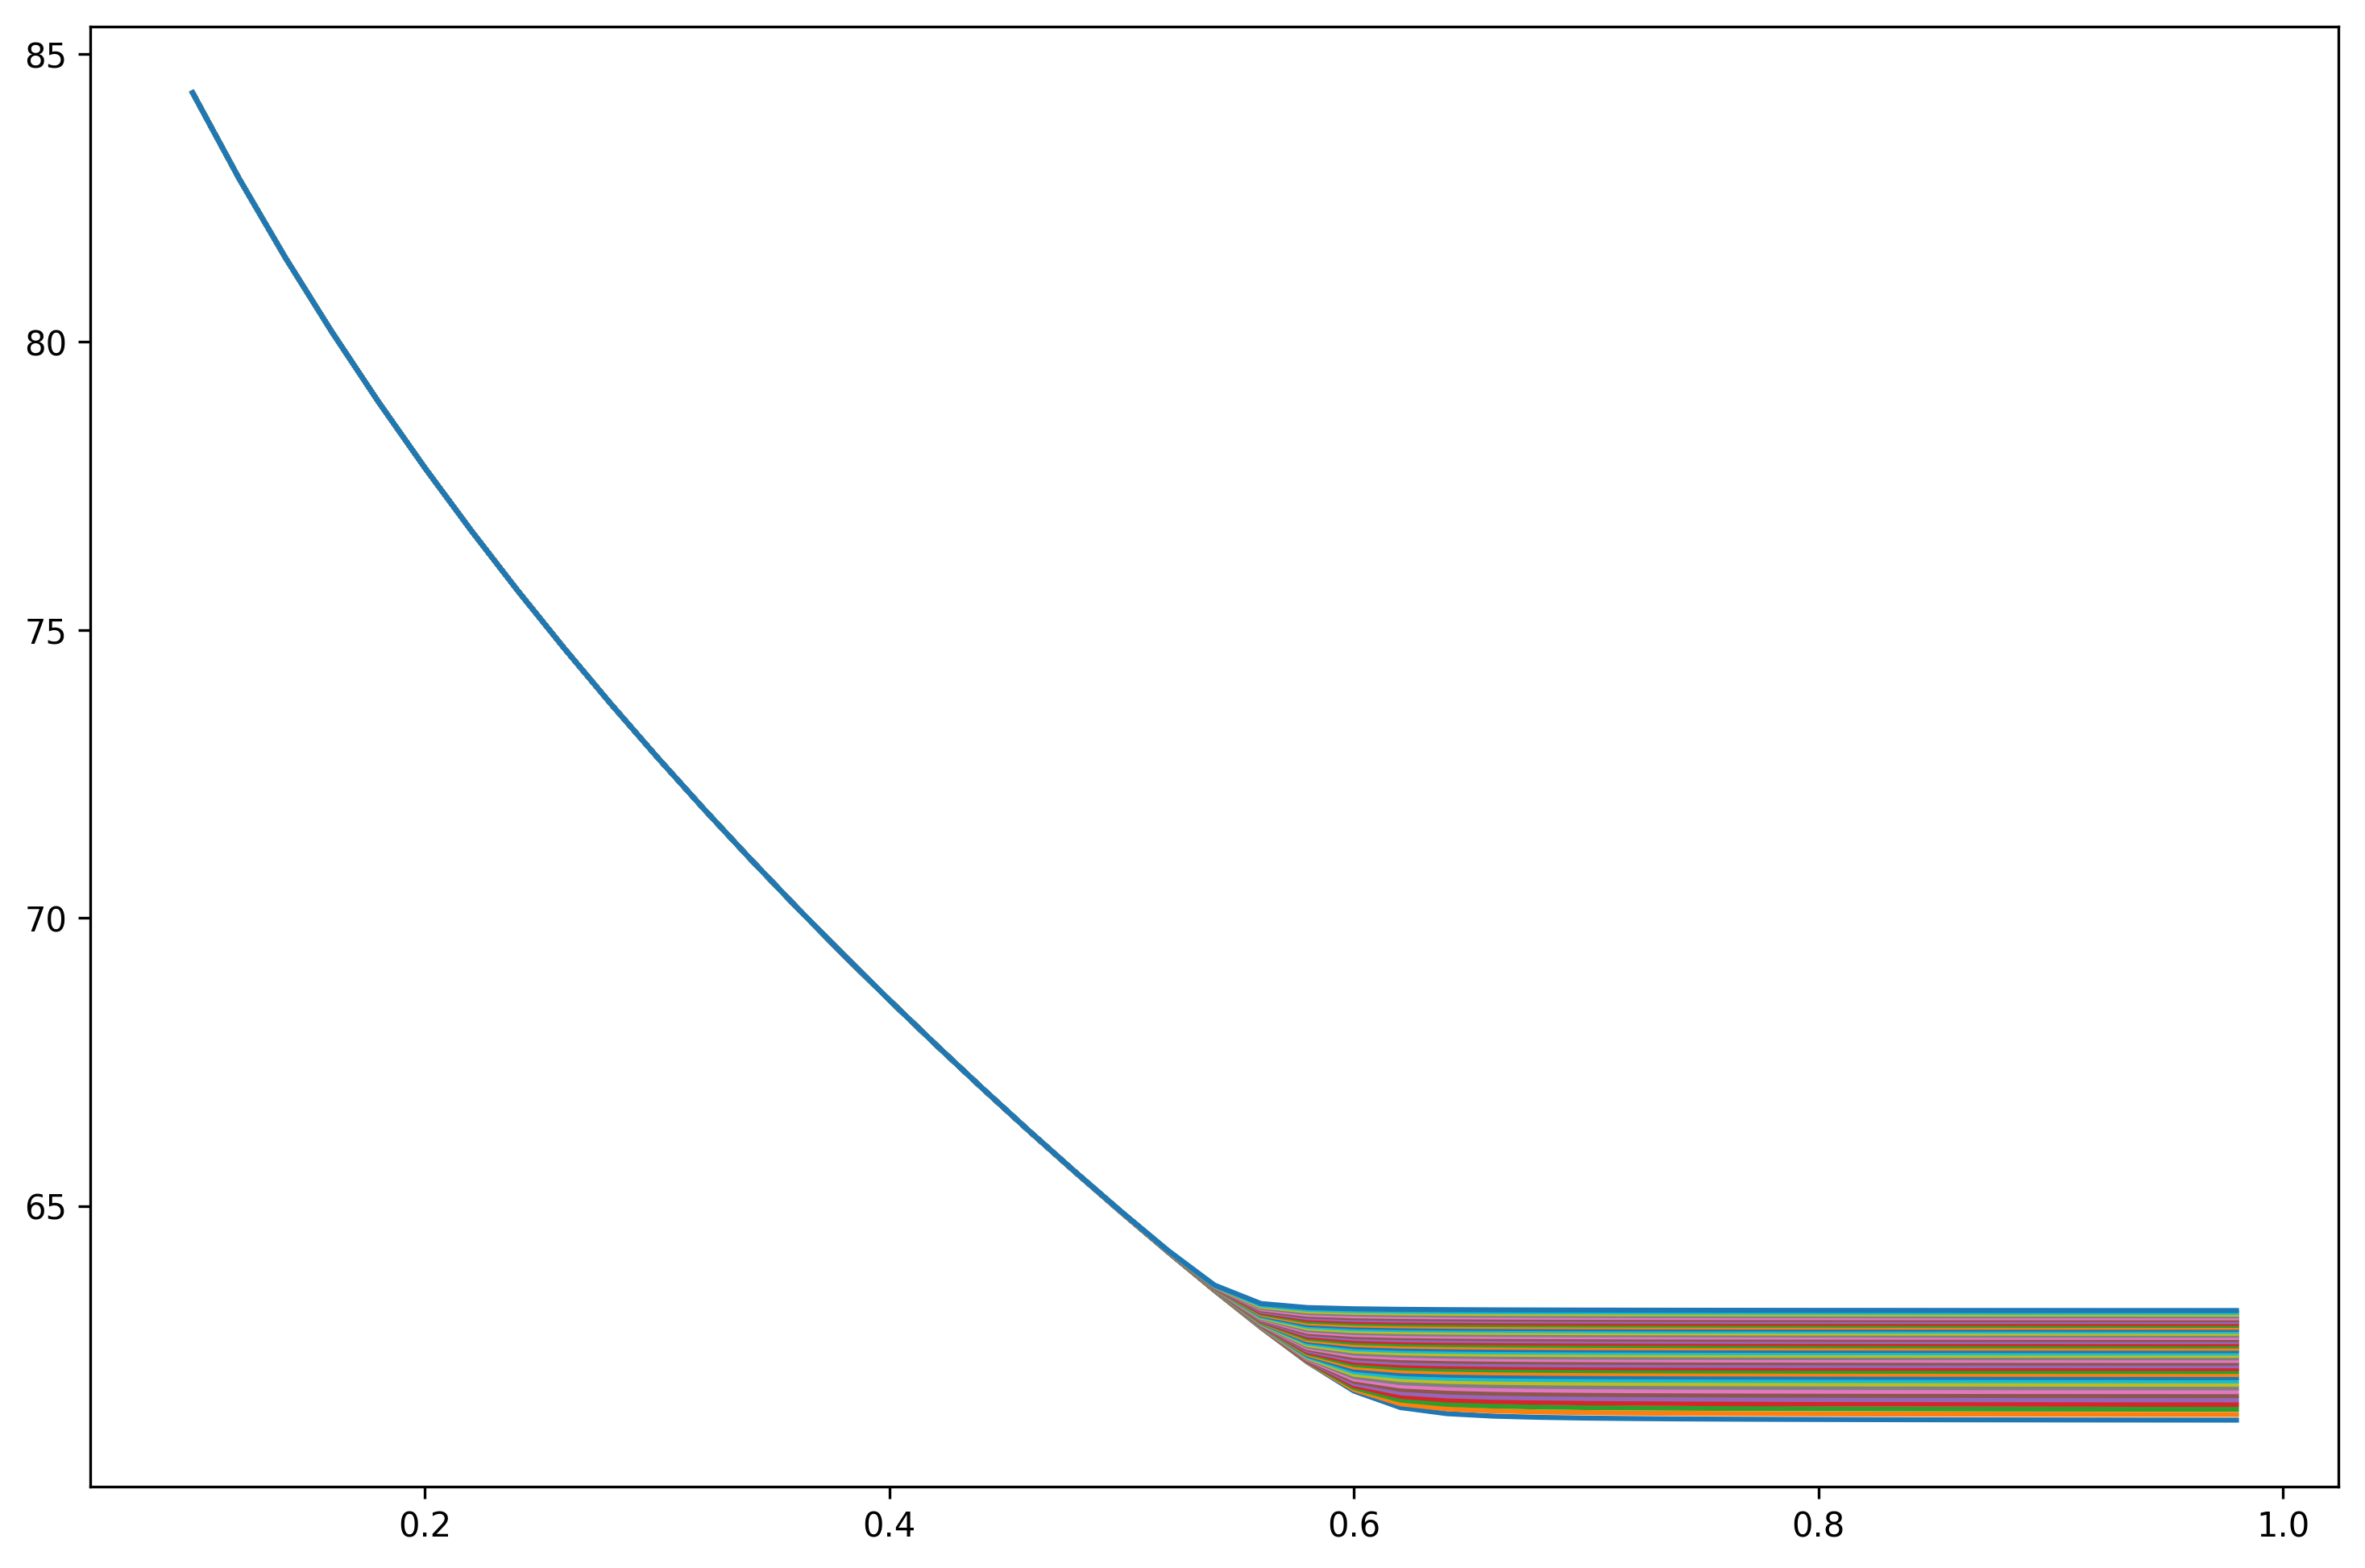

In [167]:
fig, ax = plt.subplots(1)
for d in df.values:
    ax.plot(df.columns, d)

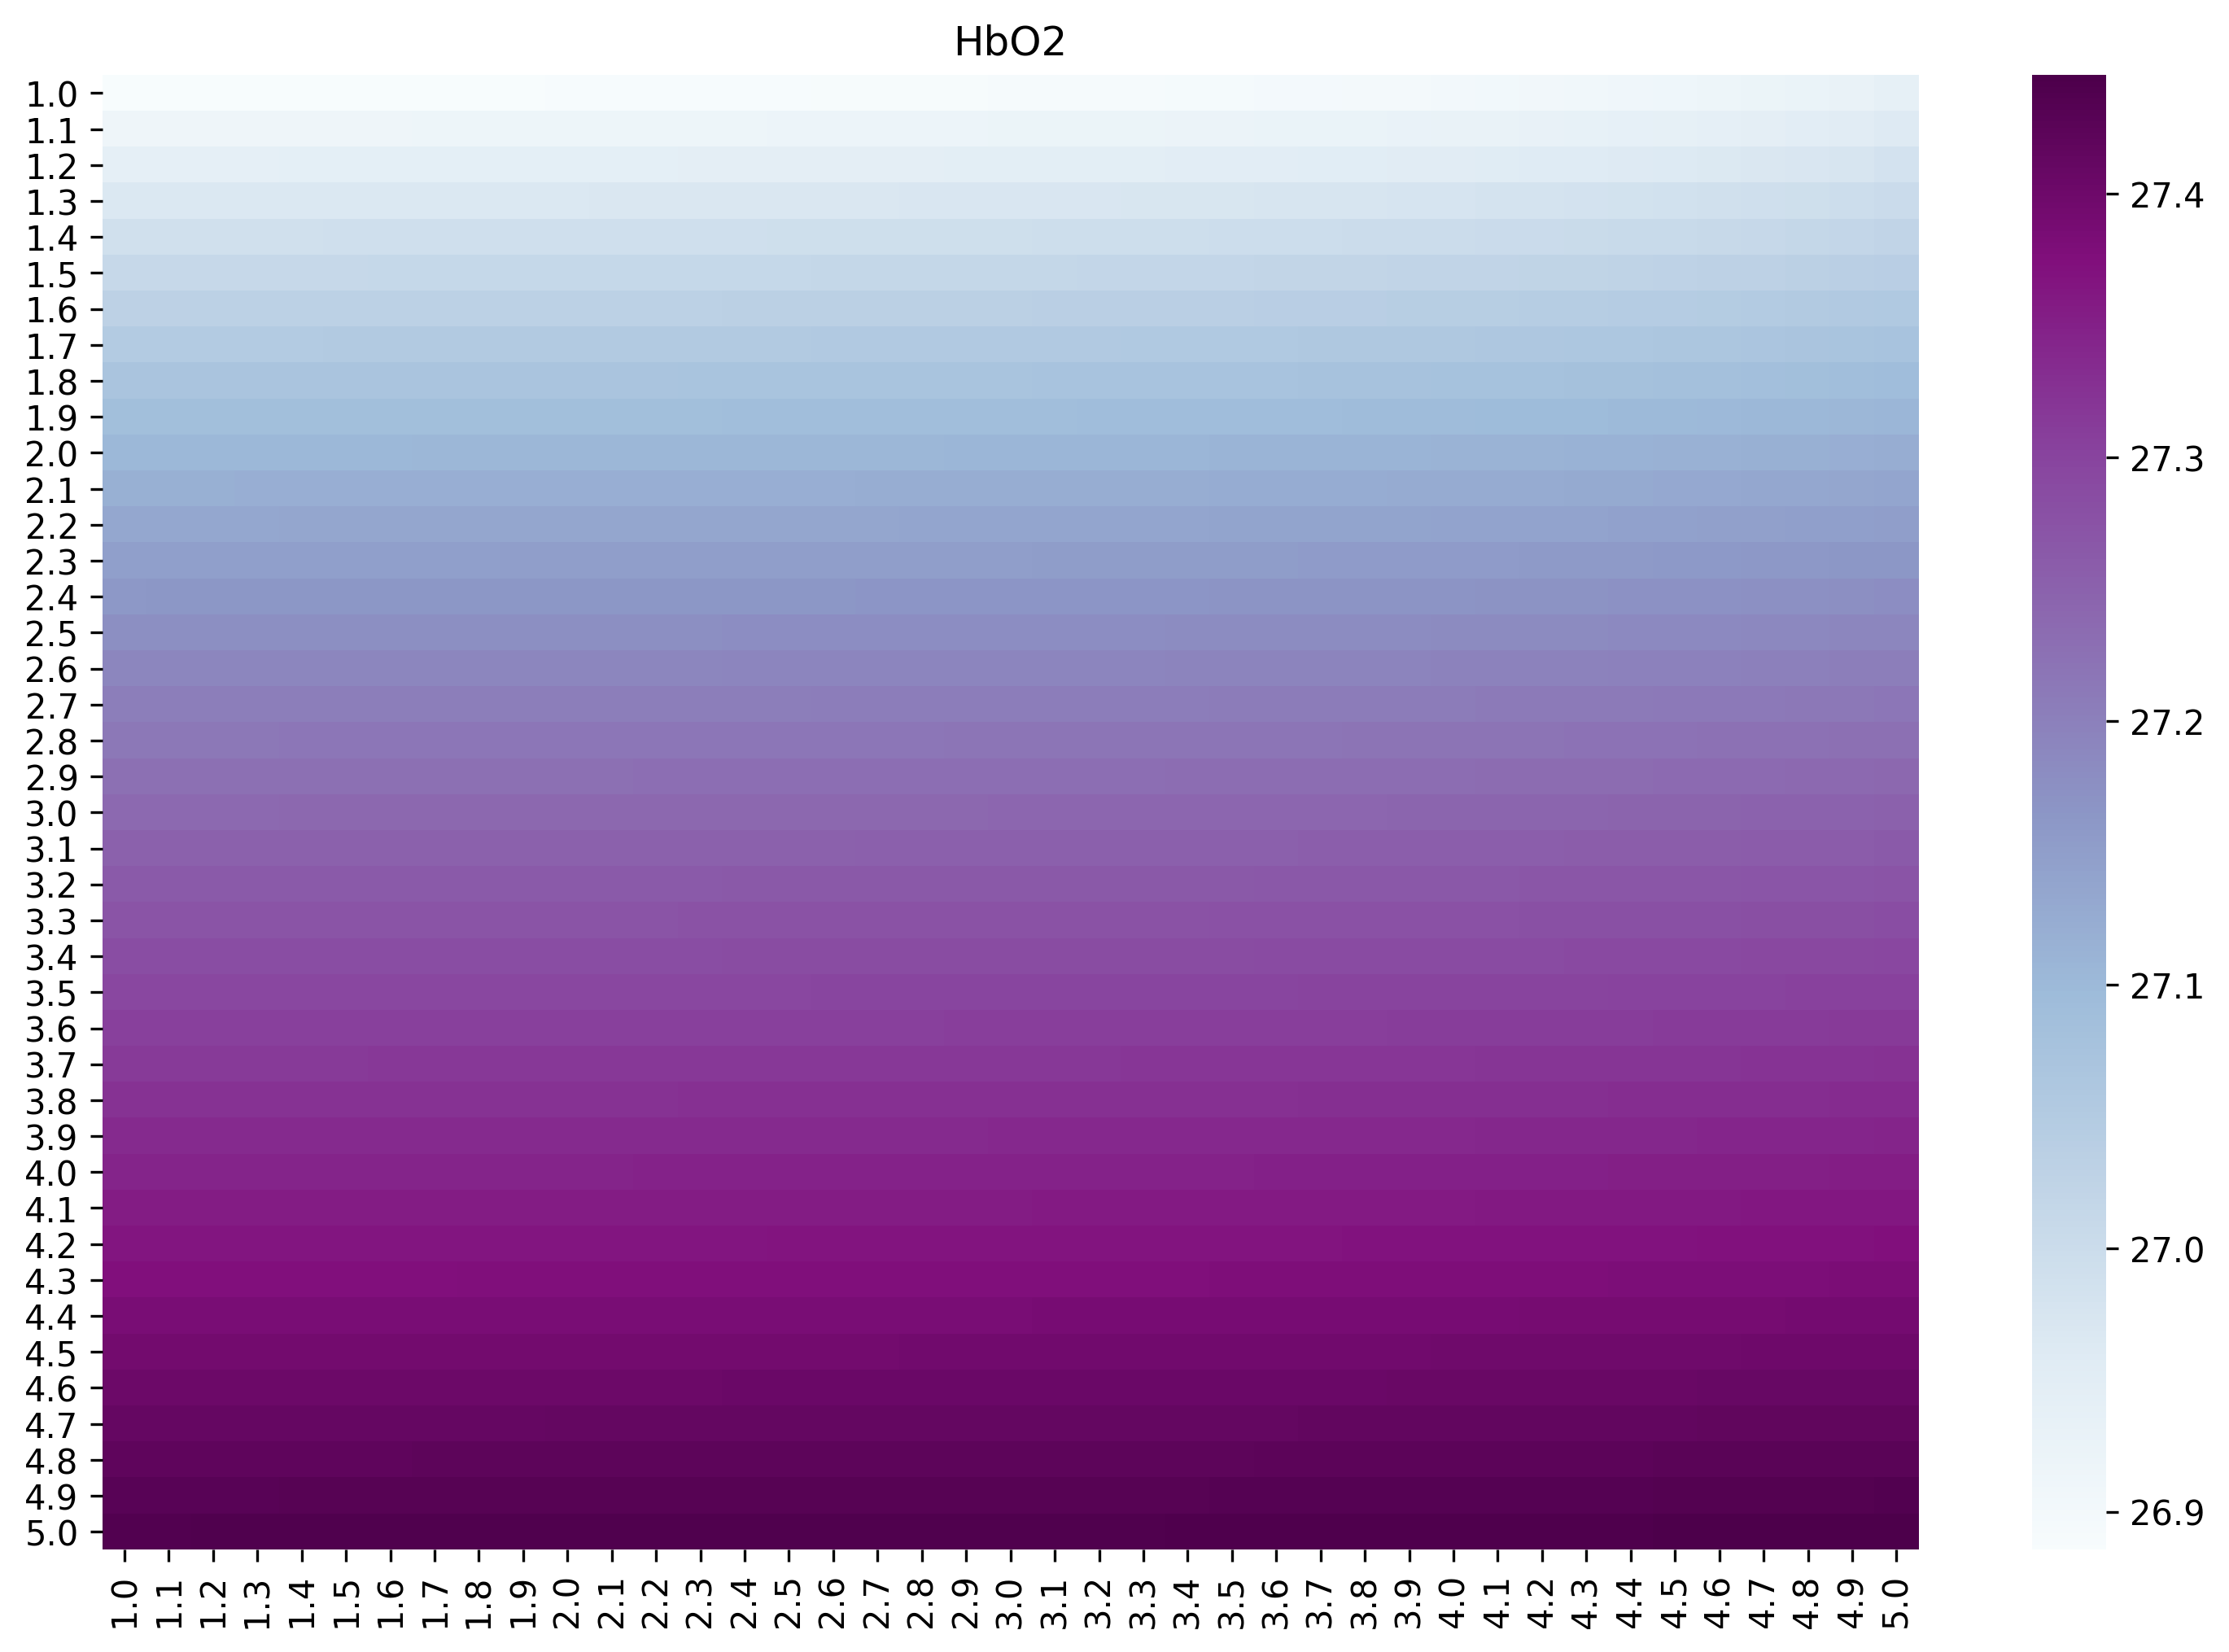

In [119]:
get_output_heatmap(bp2_data, 'HbO2')

['1', '2.5', '3.5']

TOI


CBF

1 :  0.008000000000002356
2.5 :  0.008000000000002356
3.5 :  0.008000000000002356

Hbdiff


CCO


CMRO2

1 :  0.020000000000024644
2.5 :  0.020000000000024644
3.5 :  0.020000000000024644


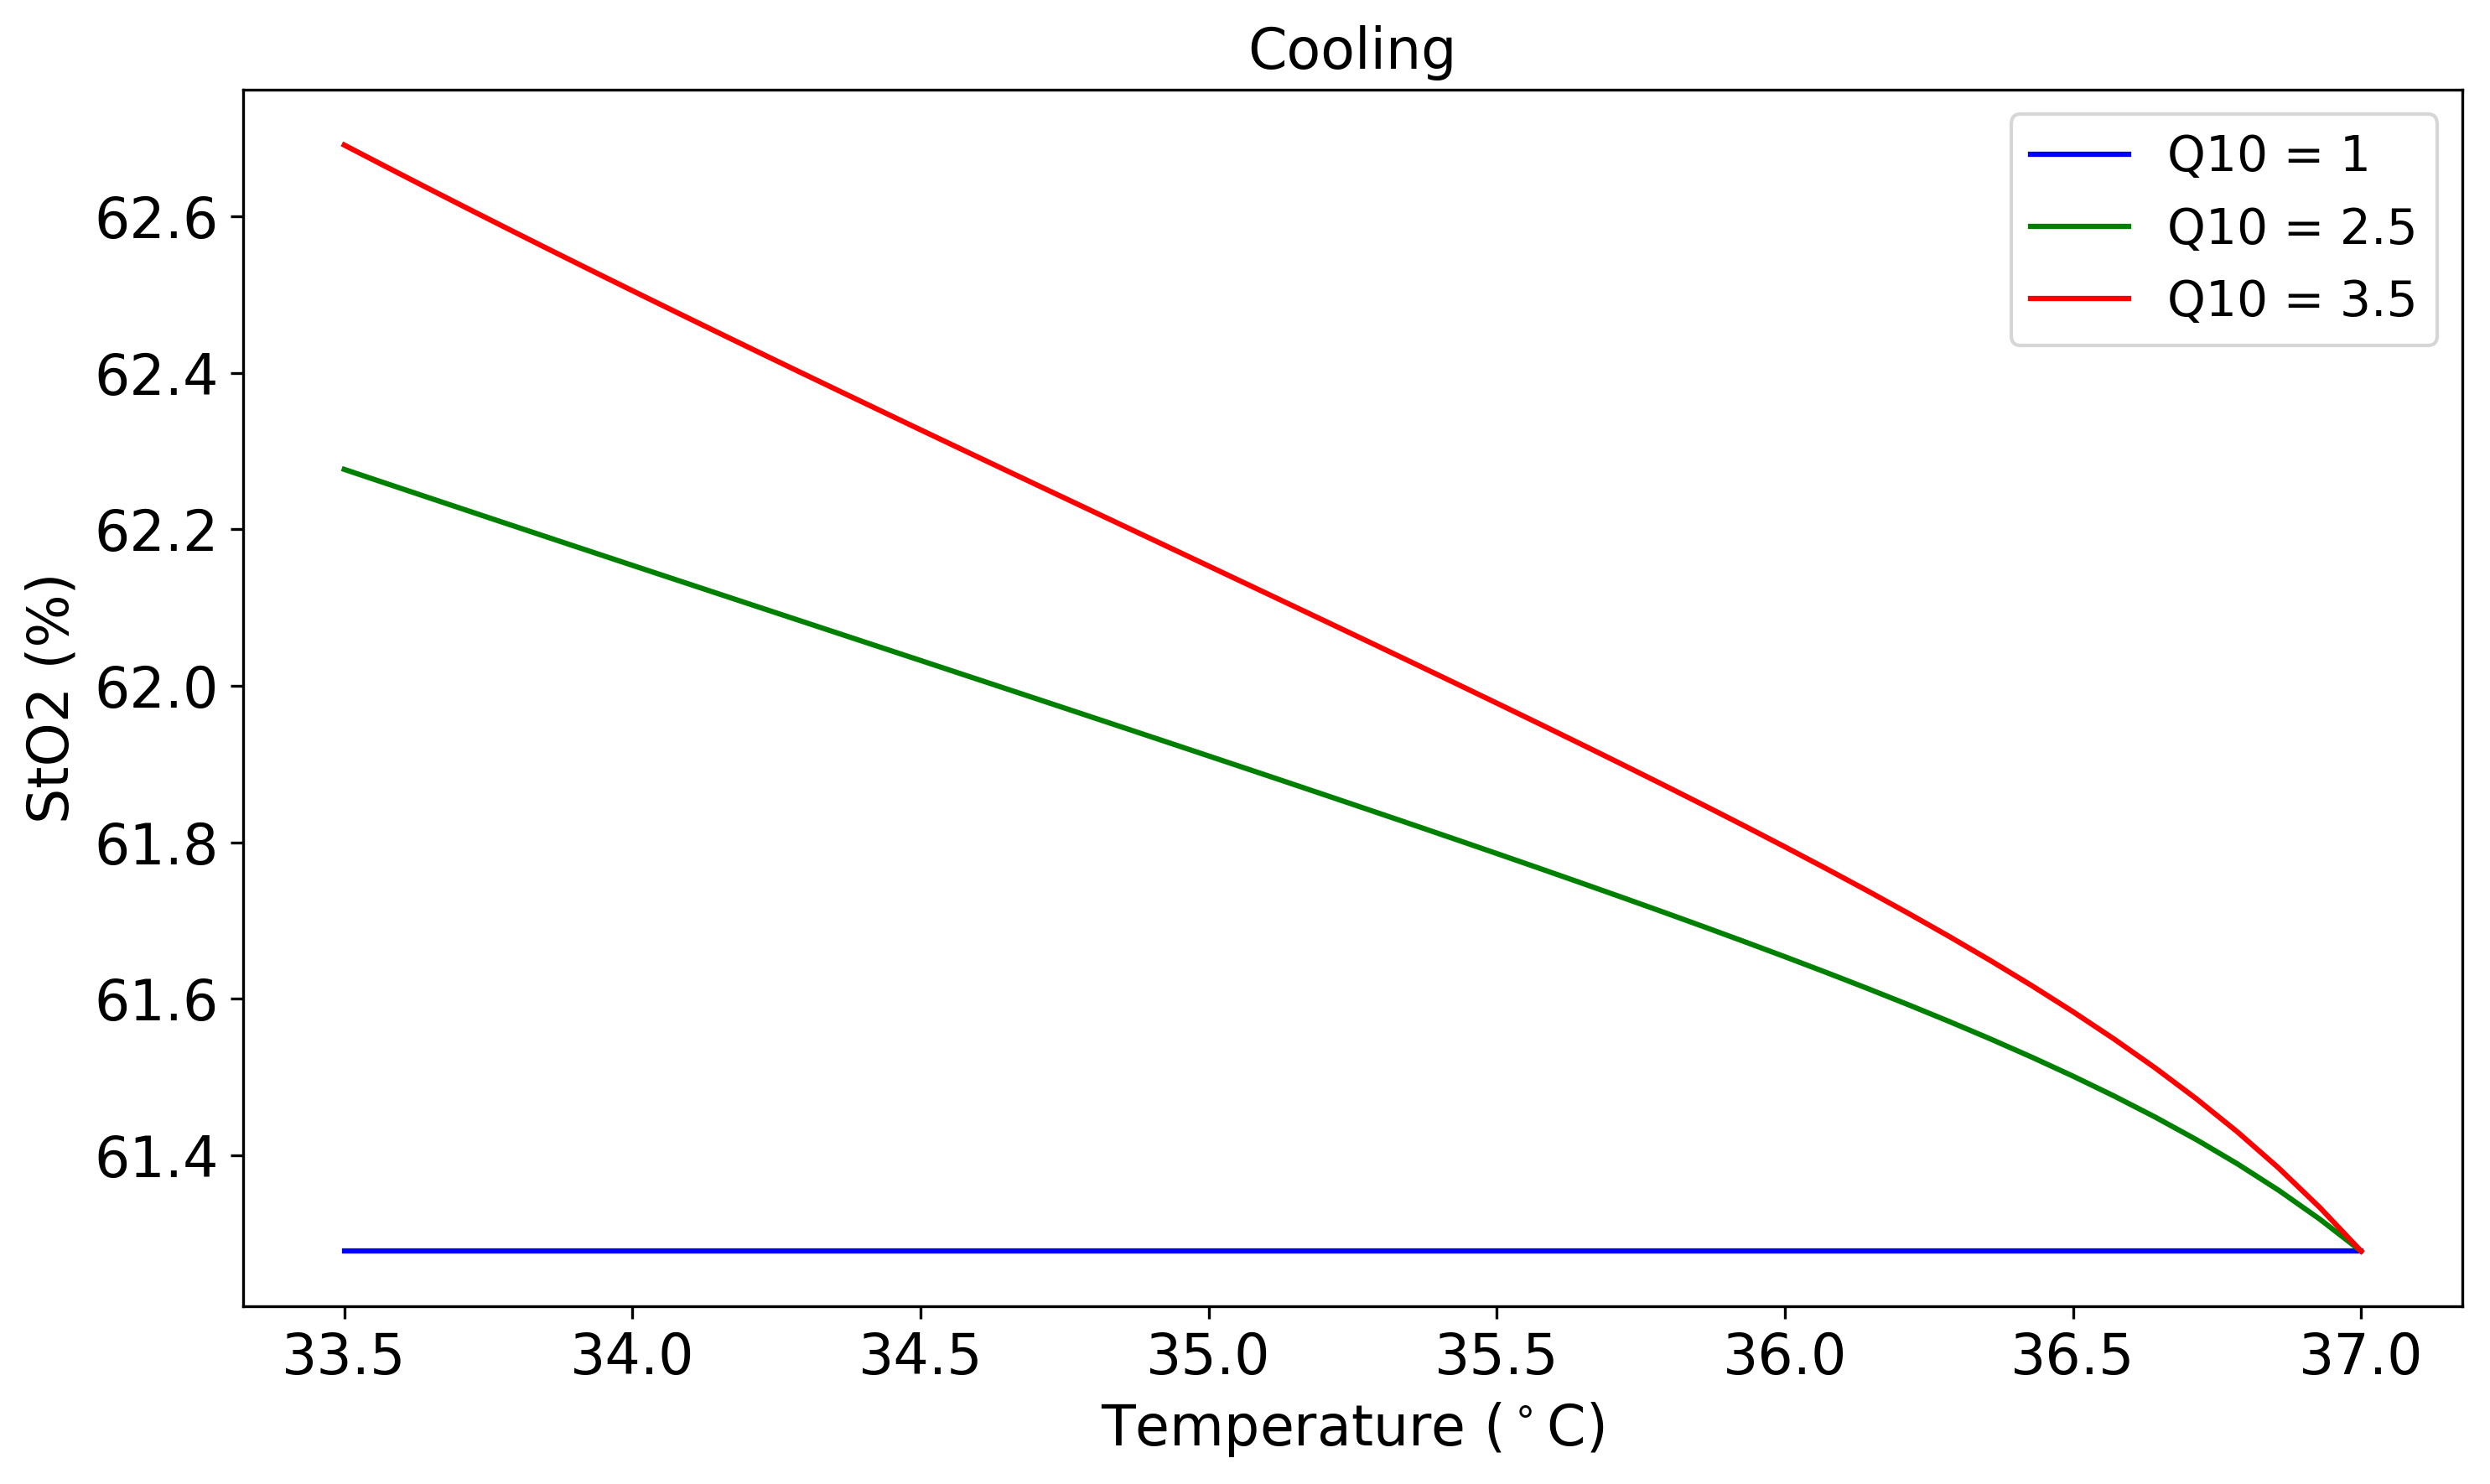

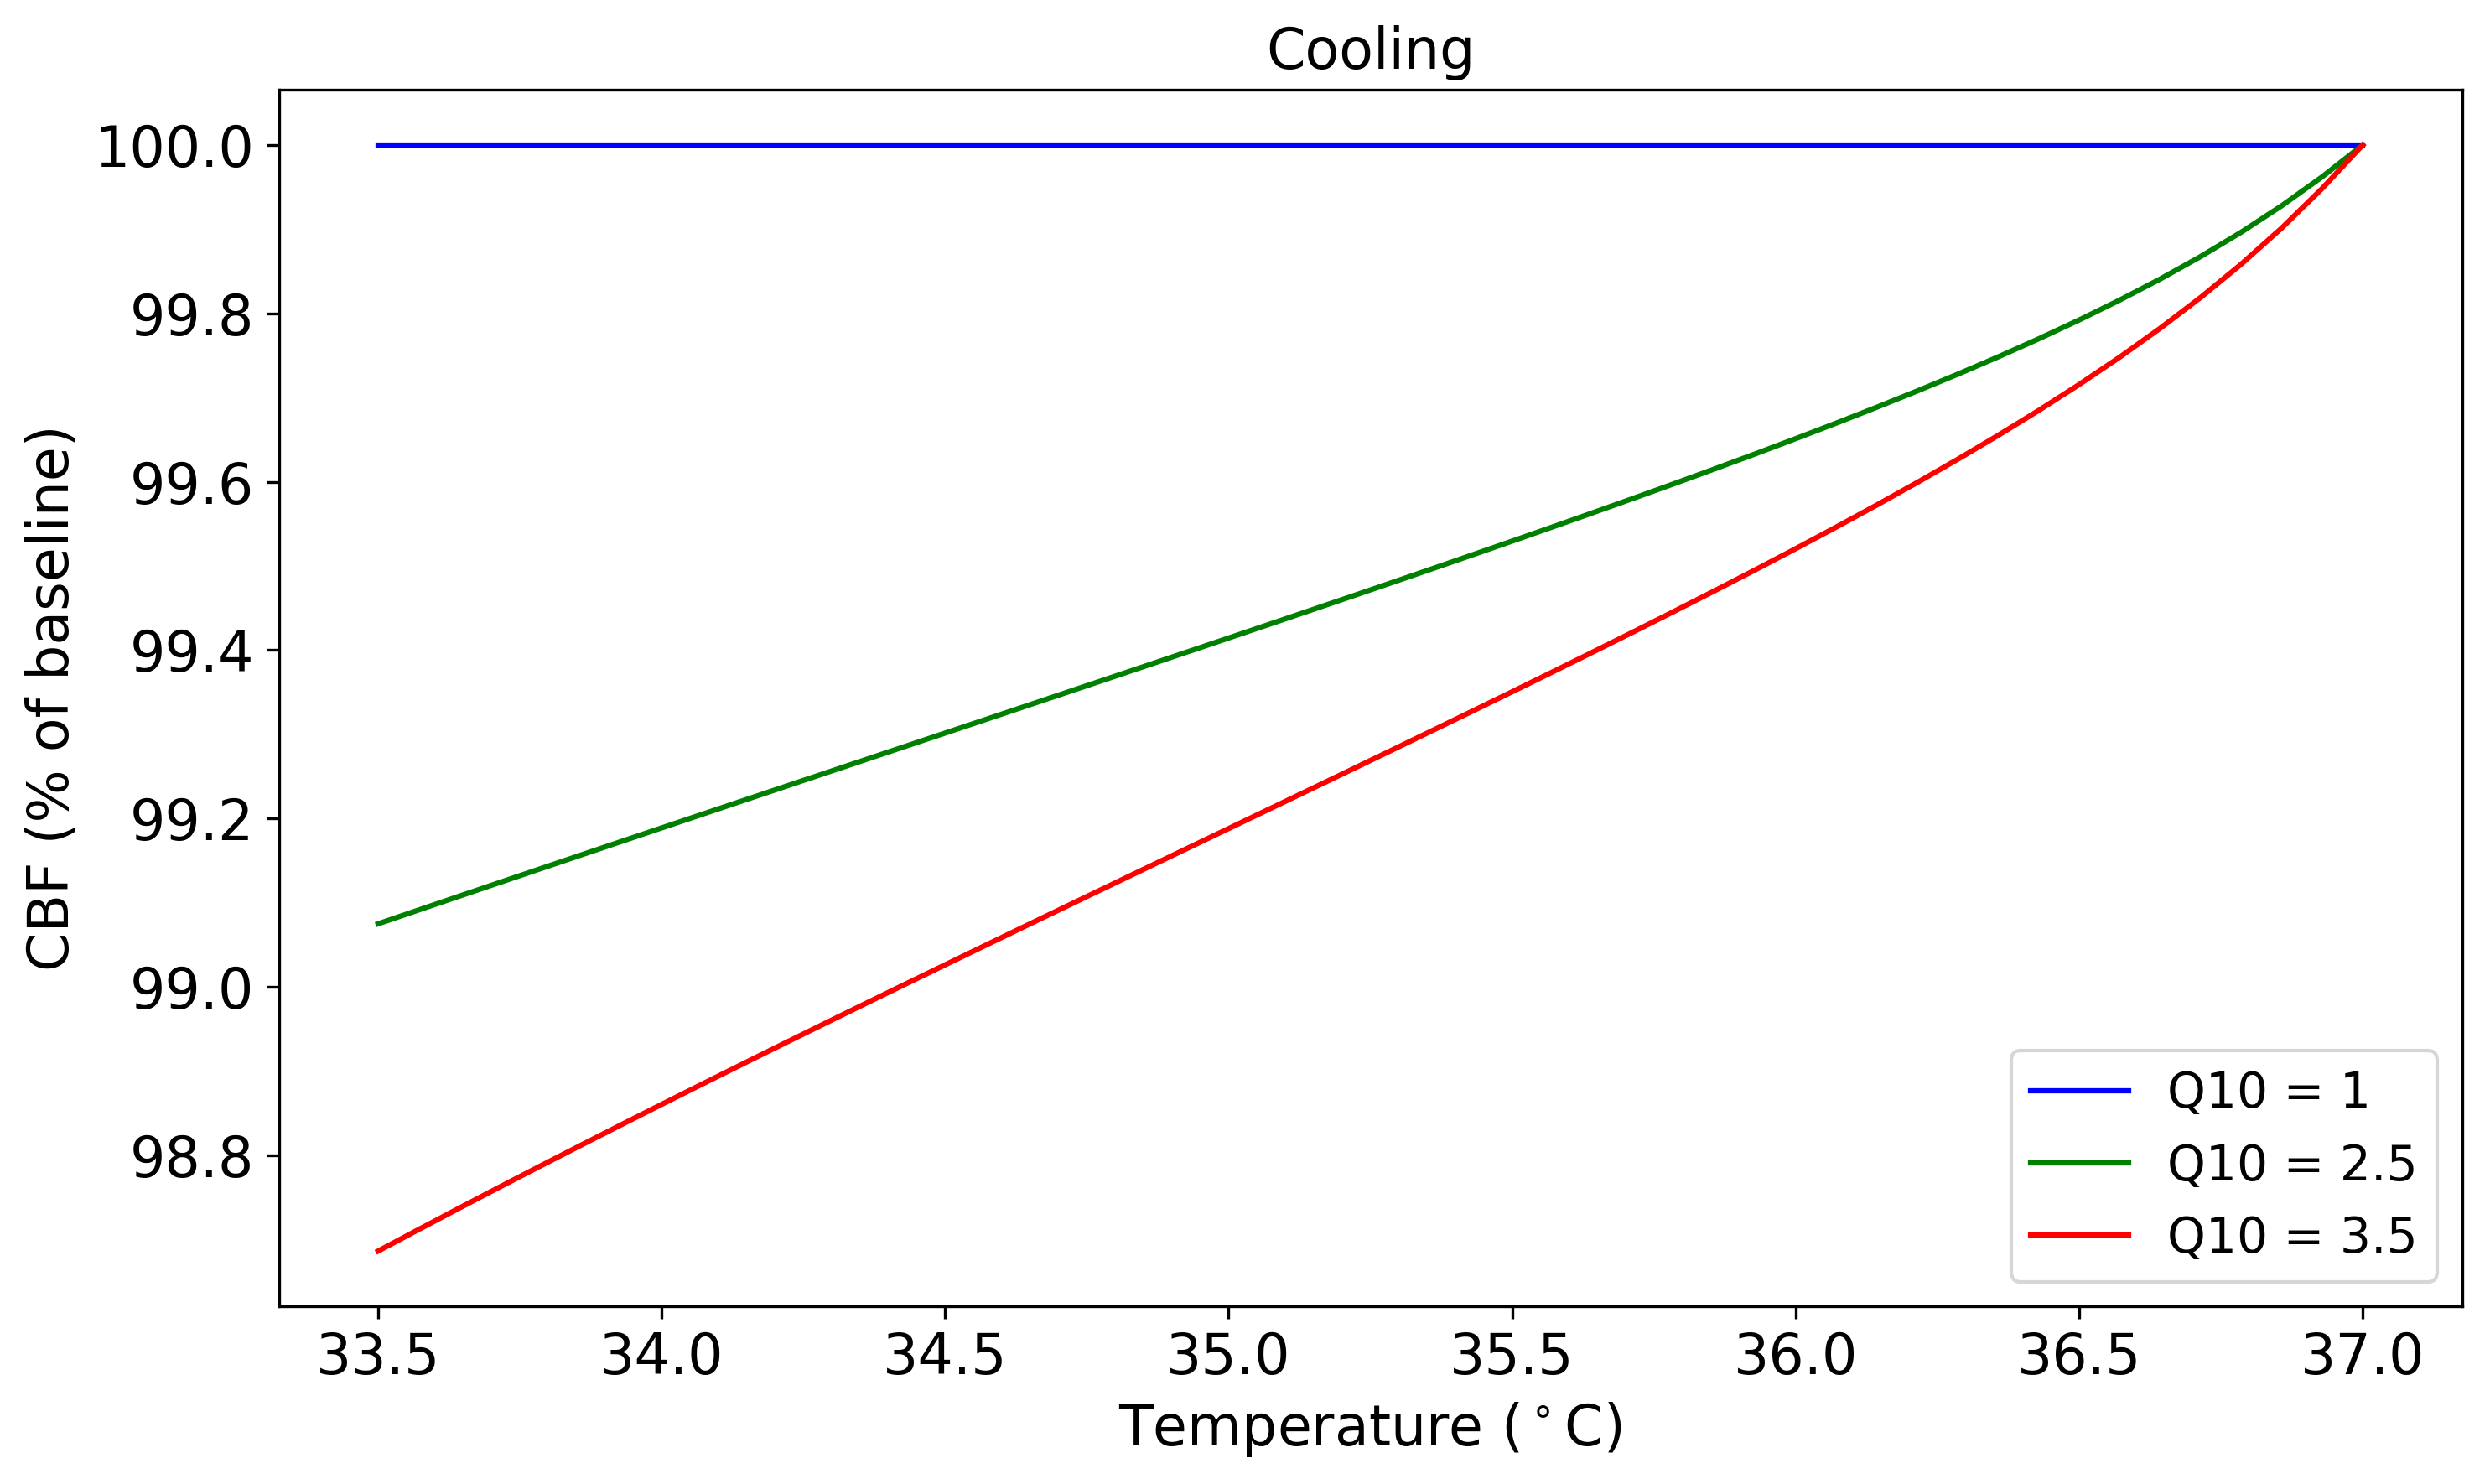

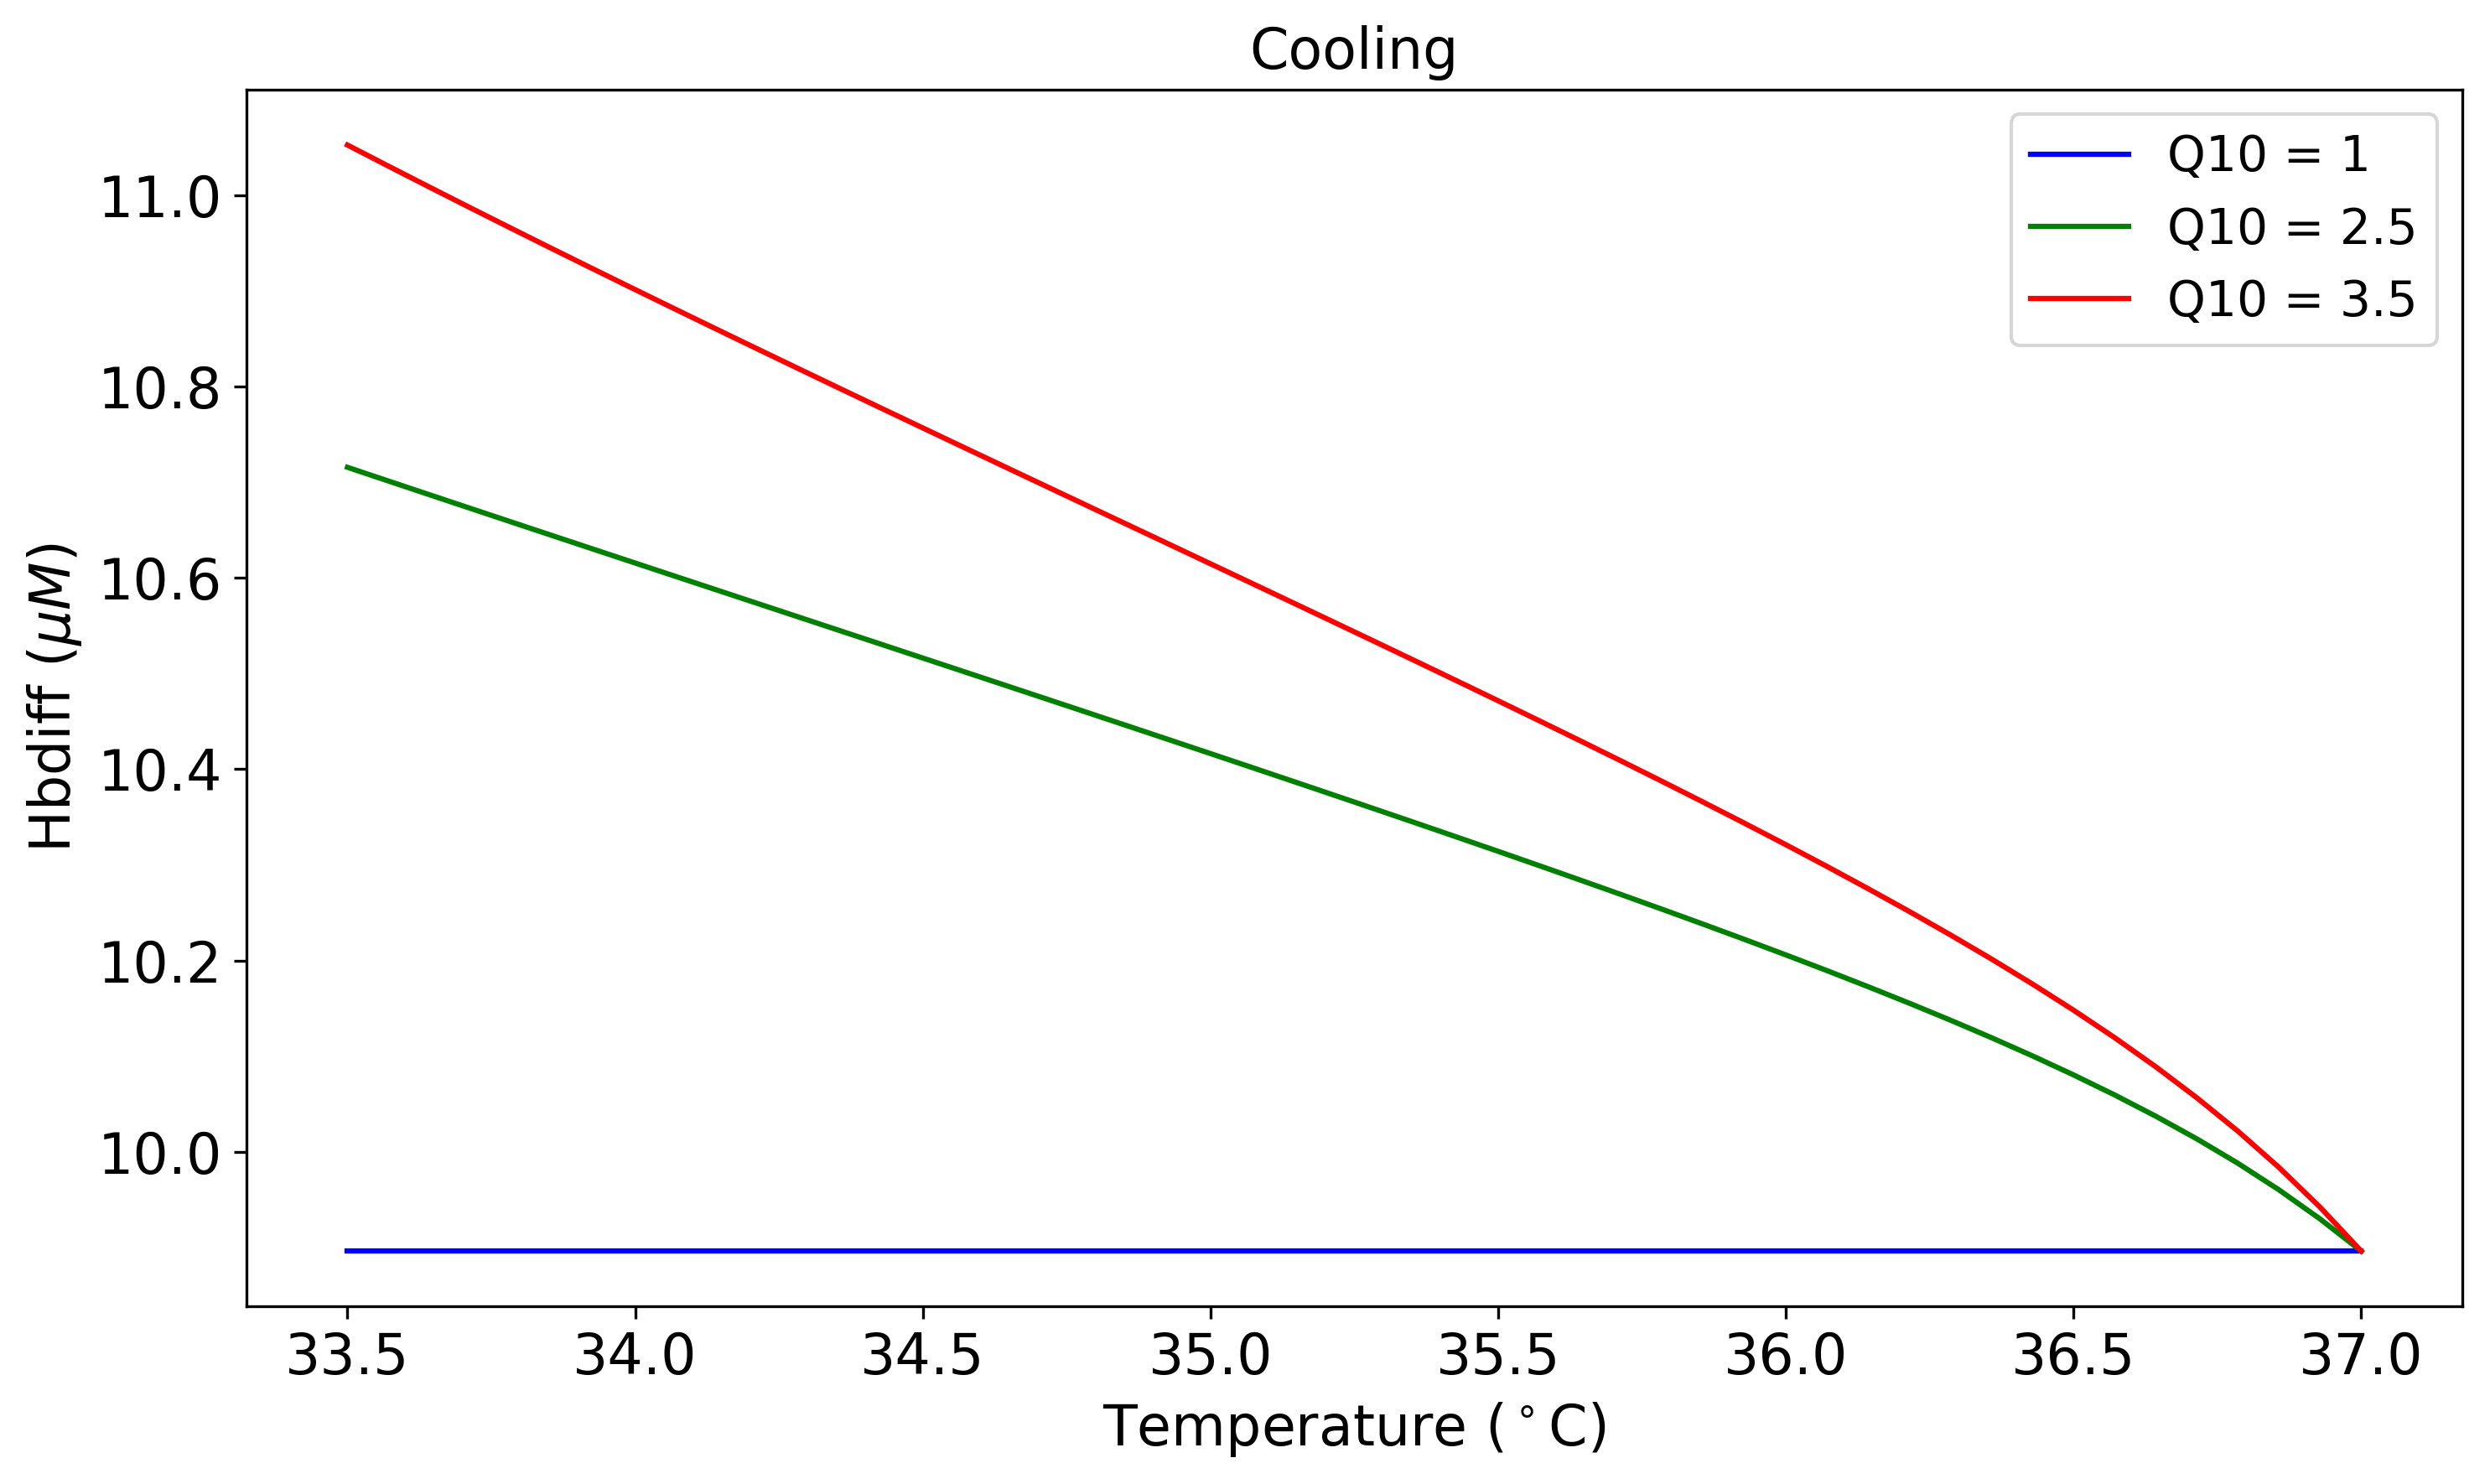

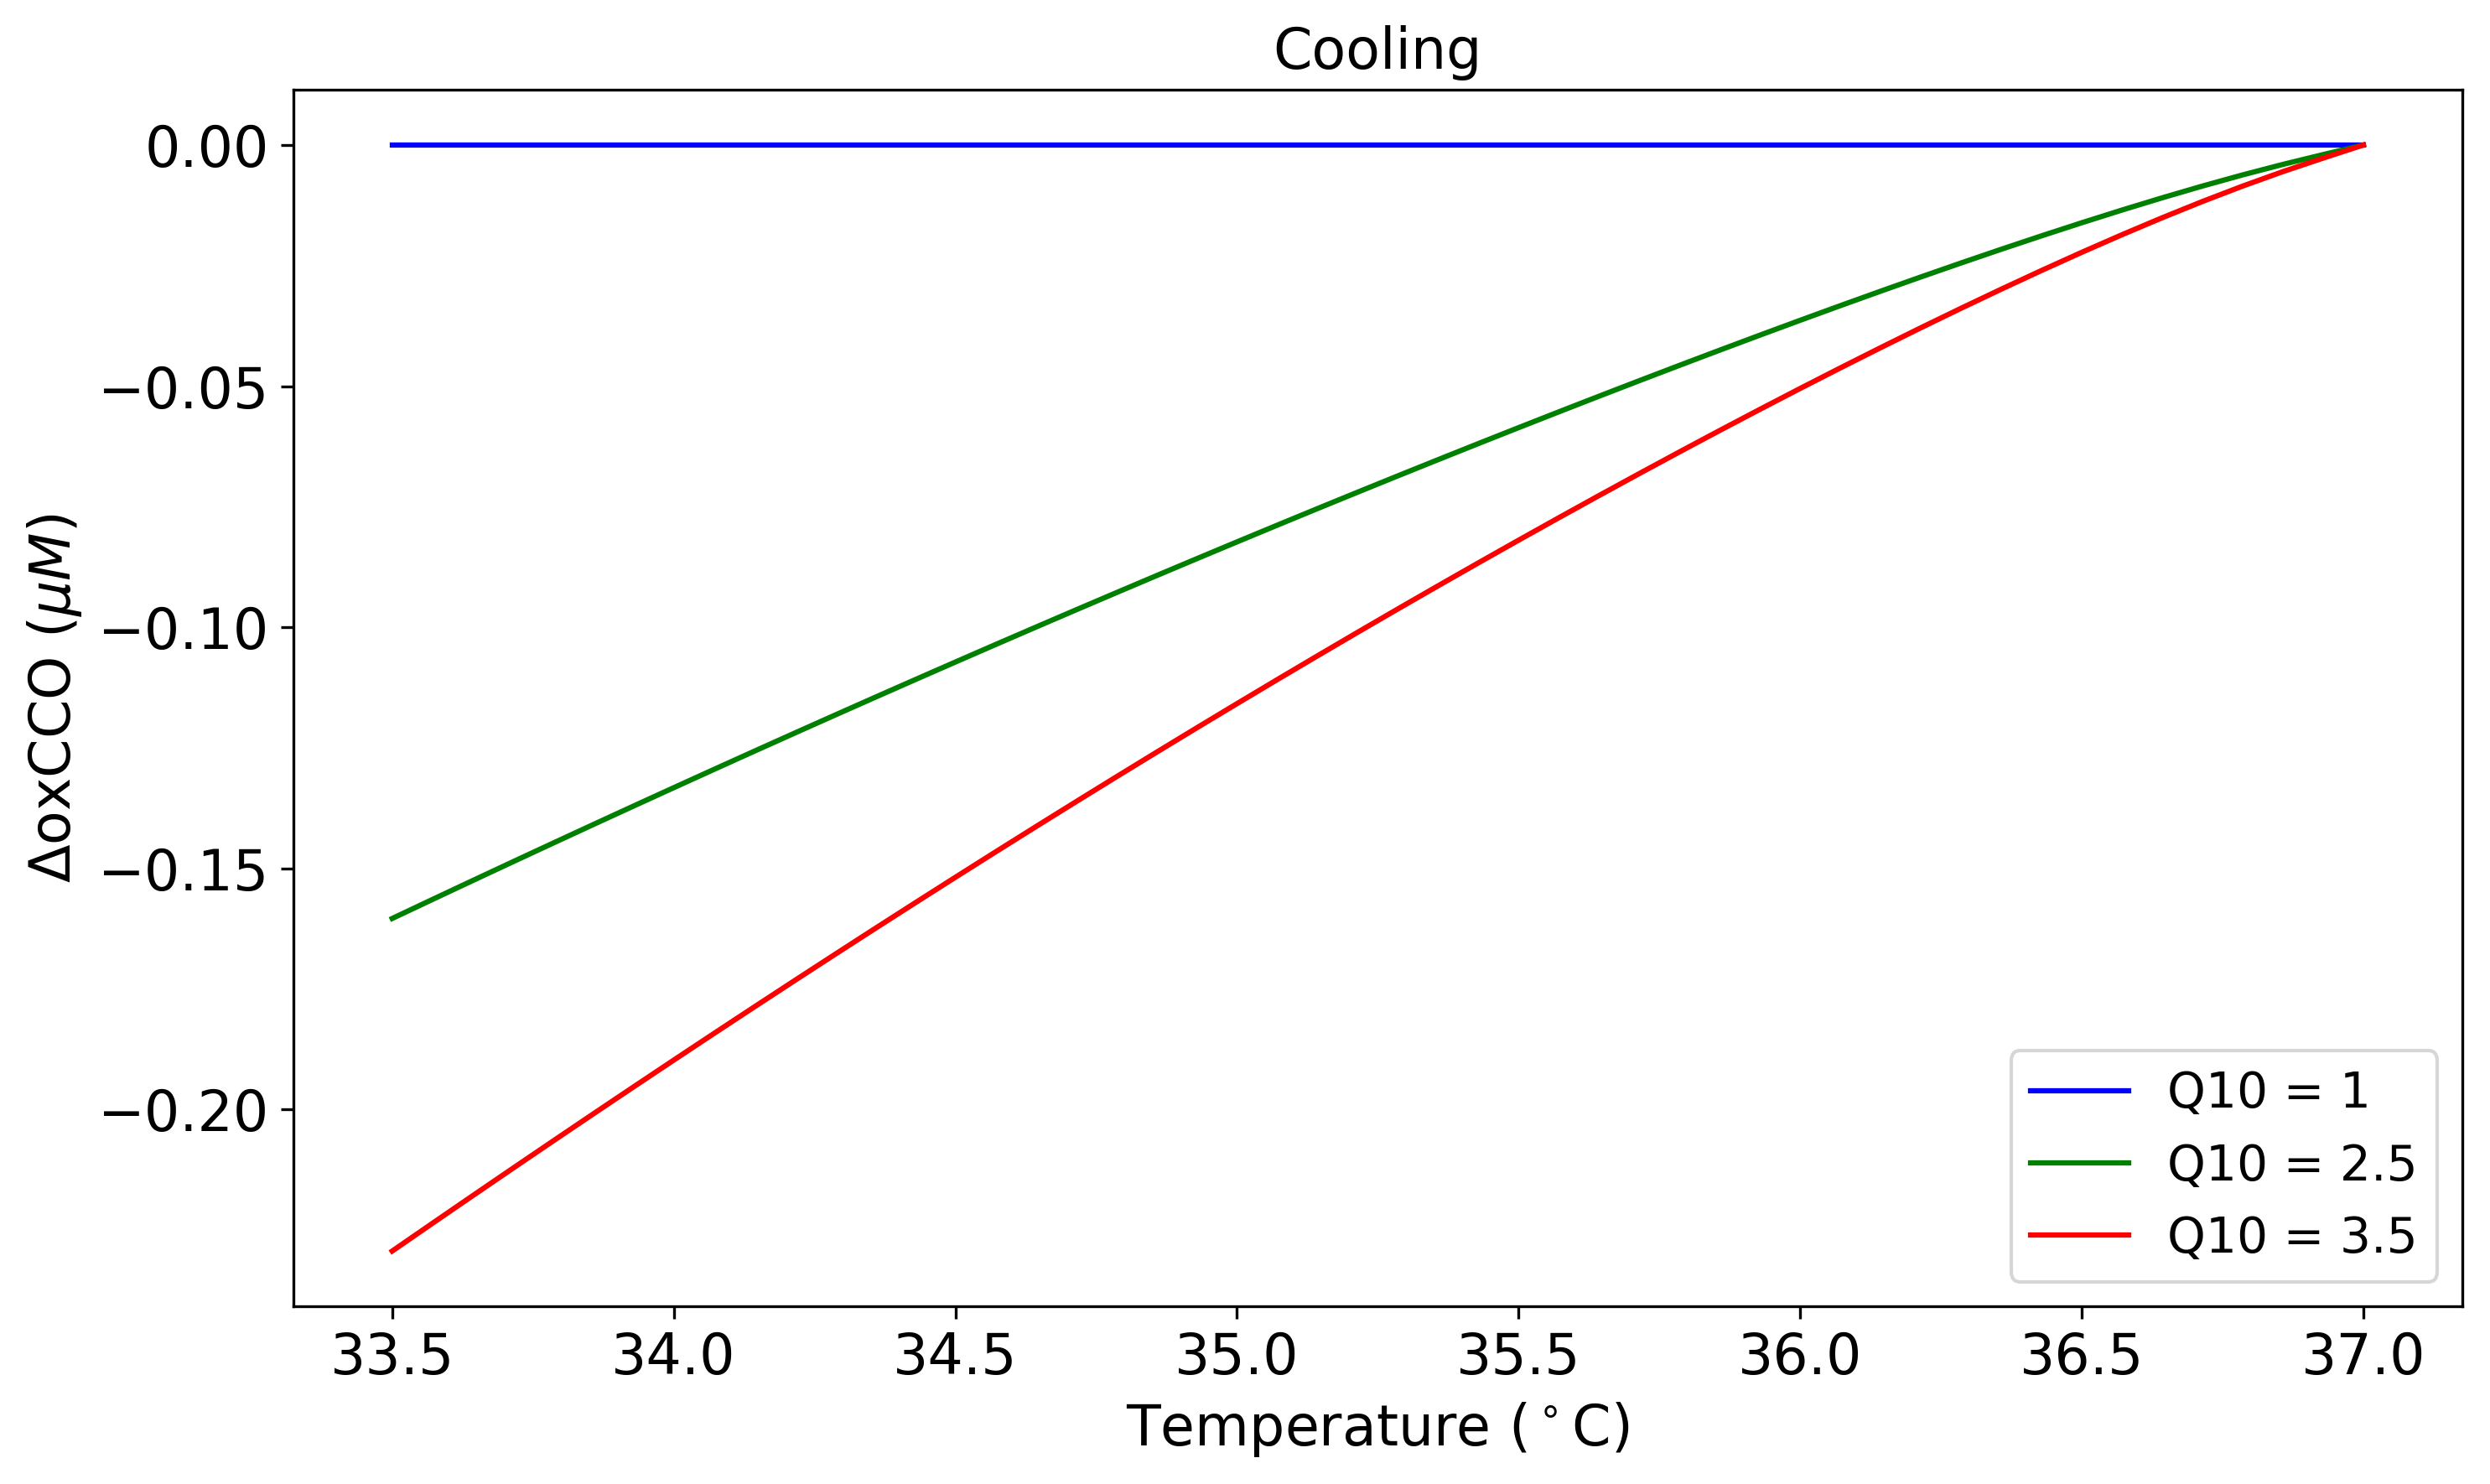

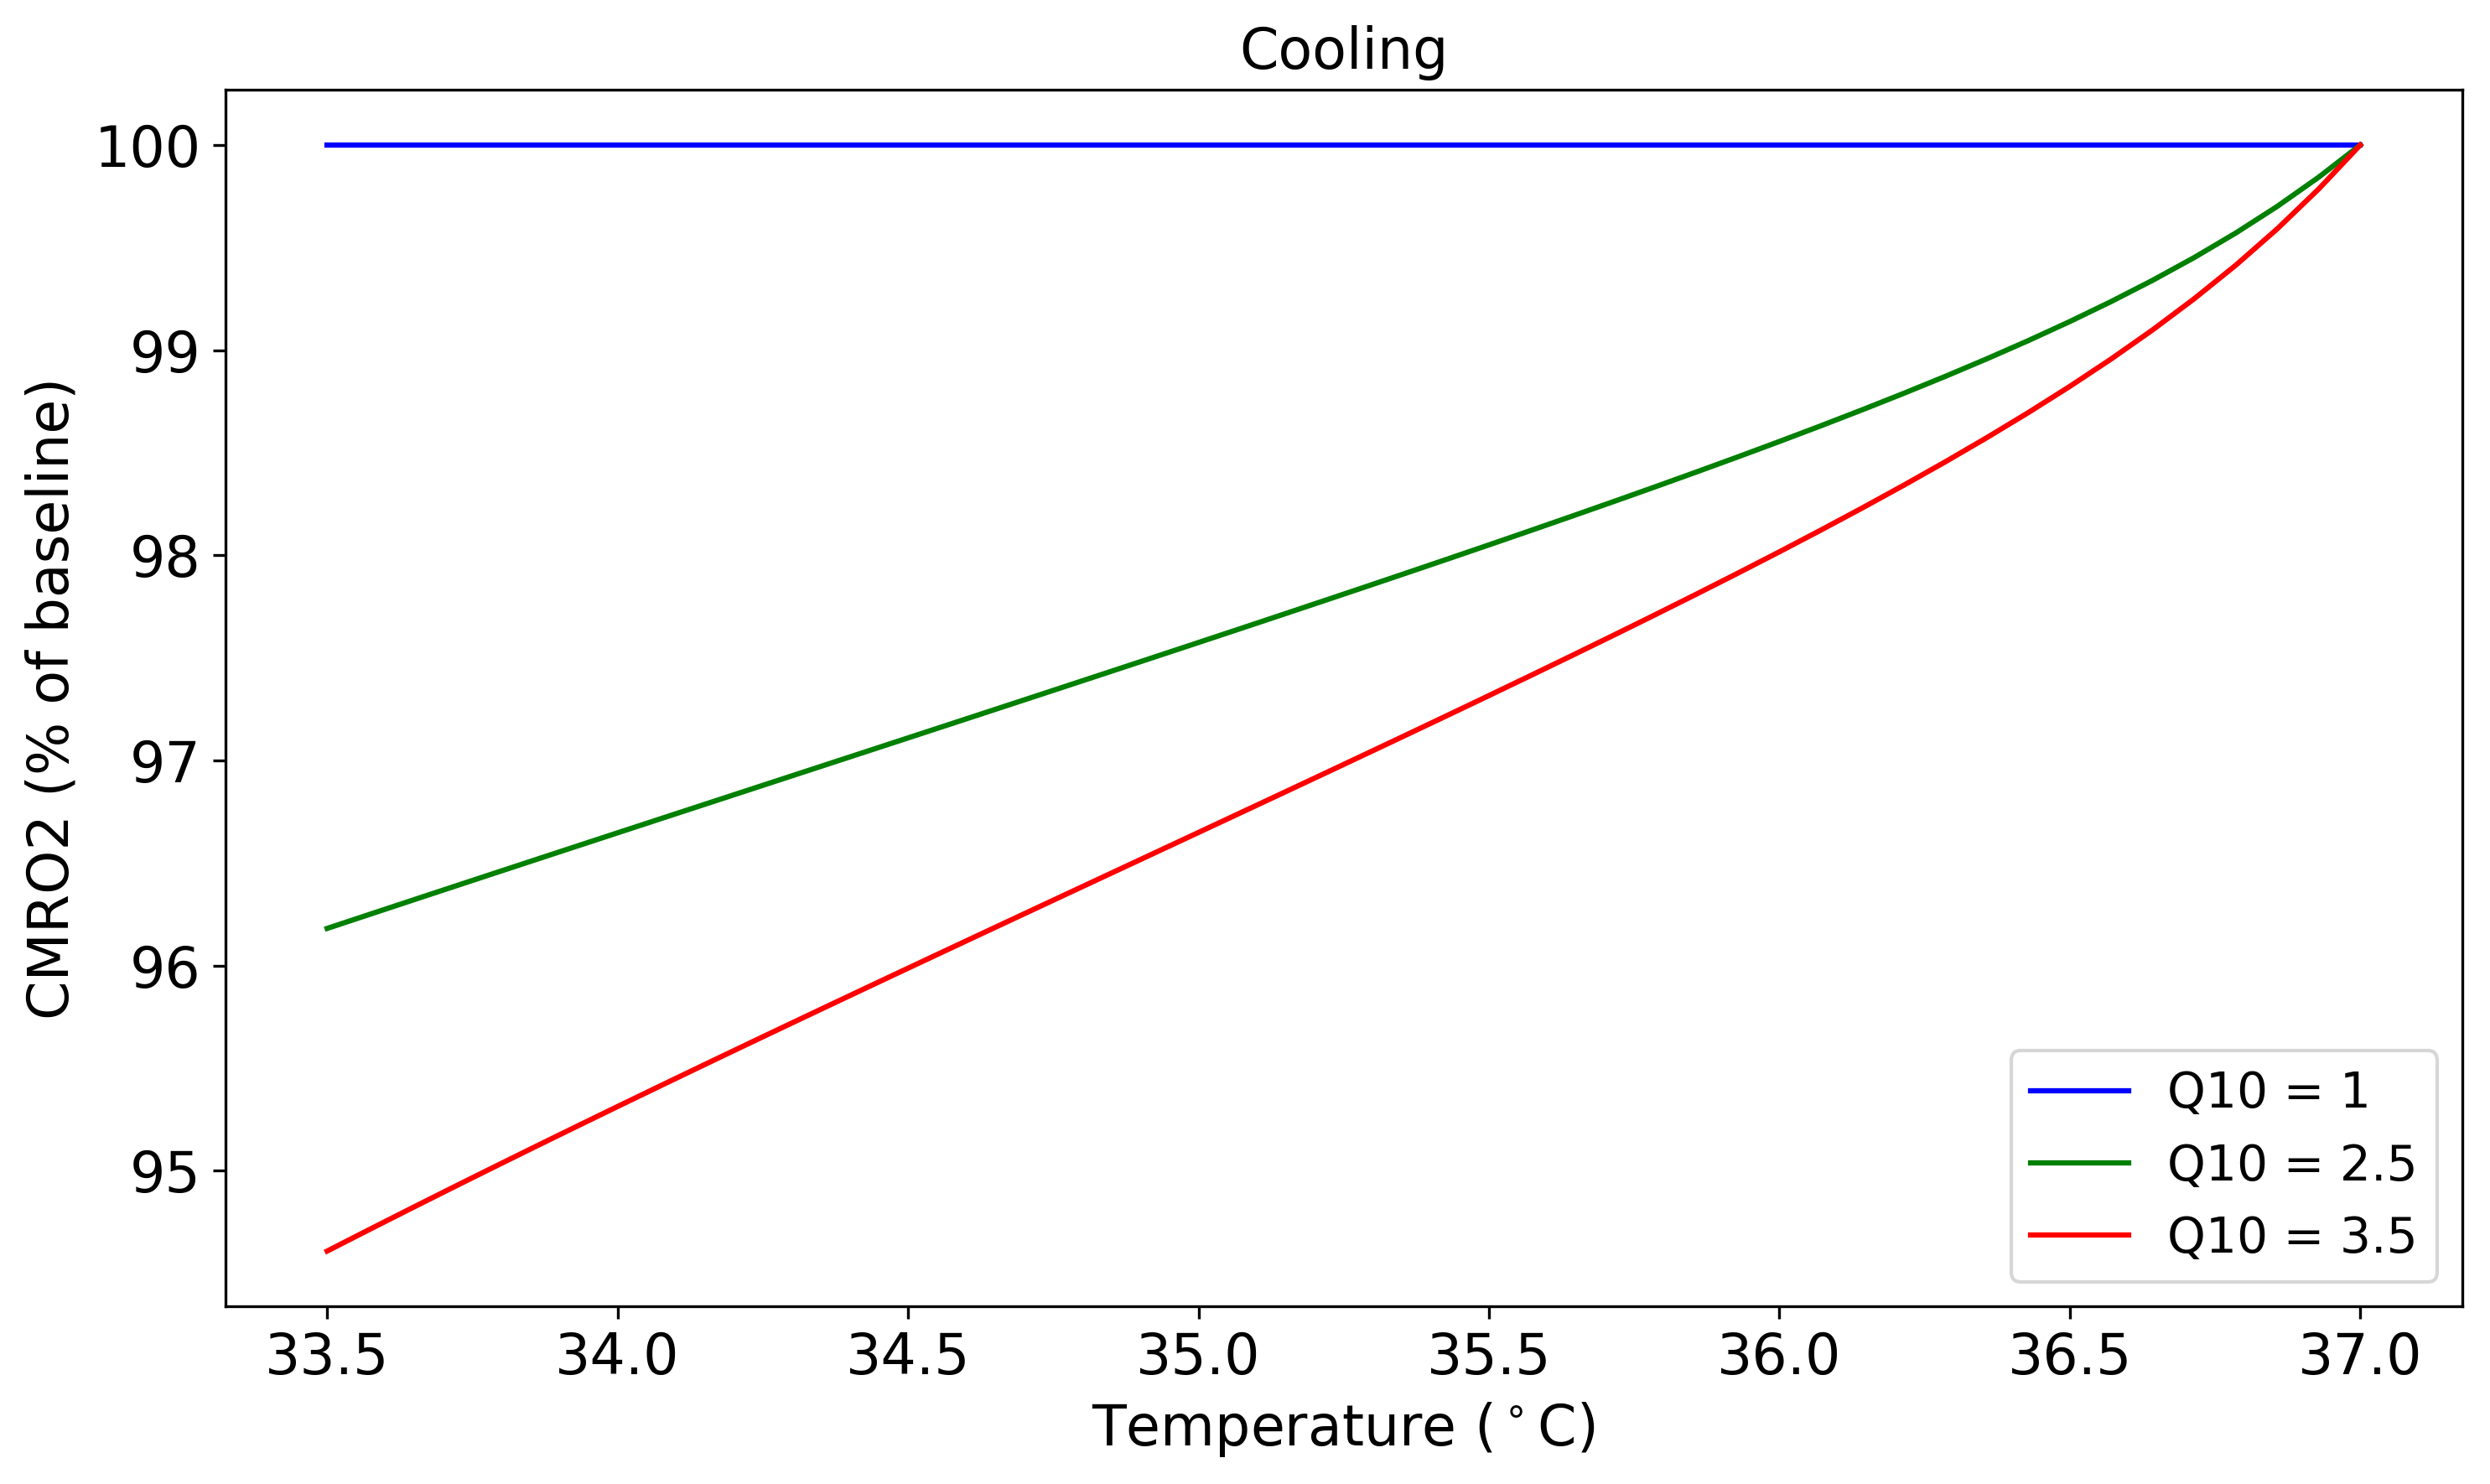

{'up': {}, 'down': {'TOI': (61.20712110036119, 62.76156800192663), 'CBF': (98.6205869626781, 100.06568633514775), 'Hbdiff': (9.83844804437783, 11.110091066743284), 'CCO': (-0.24082071304267286, 0.011467653000468142), 'CMRO2': (94.33796537777147, 100.26962069645792)}}


In [51]:
## Q10 figures
# with open('q10/220618T1154.json', 'r') as f:
jsondata_q10 = {}

jsondata_q10['down'] = get_outputs_json_data("bp_hypothermia_1", "down")

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
outputs = ['TOI', 'CBF', 'Hbdiff', 'CCO', 'CMRO2']
units = ["(%)", "(% of baseline)", "($\mu M$)", "($\mu M$)", "(% of baseline)"]
keys = list(jsondata_q10['down'].keys())[:6]
ylims = {"up": {}, "down": {}}
# jsondata_q10['up'] = {k:{} for k in keys}
# jsondata_q10['down'] = {k: {} for k in keys}
# for k in keys:
#     jsondata_q10['up'][k] = {inner_k: jsondata_q10_all[k][inner_k][:len(jsondata_q10_all[k]['t']) // 2 + 1] for inner_k in jsondata_q10_all[k].keys()}
#     jsondata_q10['down'][k] = {inner_k: jsondata_q10_all[k][inner_k][len(jsondata_q10_all[k]['t']) // 2:] for inner_k in jsondata_q10_all[k].keys()}

print(keys)
keys.sort()
# fig, axes = plt.subplots(nrows=2, ncols=3)
for direction  in ['down']:
    for ii, o in enumerate(outputs):
        fig, ax = plt.subplots(1)
        print("\n{}\n".format(o))
        # ax = axes.flatten()[ii]
        for idx, k in enumerate(keys):
            if o == 'CBF' or o == 'CMRO2':
                print(k, ": ", jsondata_q10[direction][k][o][0])
                jsondata_q10[direction][k][o] = [100*(i/jsondata_q10[direction][k][o][0]) for i in jsondata_q10[direction][k][o]]
            # l = len(jsondata_q10[k]['t']) // 2
            ax.plot(jsondata_q10[direction][k]['temp'], jsondata_q10[direction][k][o], label='Q10 = %s'%k, c=colors[idx])
            max_idx = jsondata_q10[direction][k]['temp'].index(37)
#             for j, t in enumerate(jsondata_q10[direction][k]['temp']):
#                 if 33.4<t<33.6:
#                     min_idx = j
#                     break
            
#             if direction=="down":
#                 perc_change = jsondata_q10[direction][k][o][min_idx] / jsondata_q10[direction][k][o][max_idx] * 100
#                 print("From 37C to 33.5C {} changes to {:.1f}% of its starting value for Q10={}".format(o,perc_change,k))
#             elif direction=="up":
#                 perc_change = jsondata_q10[direction][k][o][max_idx] / jsondata_q10[direction][k][o][min_idx] * 100
#                 print("From 33.5C to 37C {} changes to {:.1f}% of its starting value for Q10={}".format(o,perc_change,k))
        ax.set_xlabel('Temperature ($^\circ$C)', size=16)
        if o=='CCO':
            ax.set_ylabel("$\Delta$oxCCO {}".format(units[ii]), size=16)
        elif o=='DHbdiff':
            ax.set_ylabel("$\Delta$HbD {}".format(units[ii]), size=16)
        elif o == "TOI":
            ax.set_ylabel("StO2 {}".format(units[ii]), size=16)
        else:
            ax.set_ylabel("{} {}".format(o, units[ii]), size=16)

        ax.set_title("{d}".format(d="Rewarming" if direction == "up" else "Cooling"), size=16)
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.legend(prop={'size': 14})
        
        ylims[direction][o] = ax.get_ylim()


        plt.tight_layout()
        fname = "varying_Q10_{}_{}.png".format(o, direction)
plt.show()
print(ylims)
    
    

['1', '2.5', '3.5']

TOI

From 37C to 33.5C TOI changes to 100.0% of its starting value for Q10=1
From 37C to 33.5C TOI changes to 101.6% of its starting value for Q10=2.5
From 37C to 33.5C TOI changes to 102.3% of its starting value for Q10=3.5

CBF

1 :  0.008000000000002356
From 37C to 33.5C CBF changes to 100.0% of its starting value for Q10=1
2.5 :  0.008000000000002356
From 37C to 33.5C CBF changes to 99.1% of its starting value for Q10=2.5
3.5 :  0.008000000000002356
From 37C to 33.5C CBF changes to 98.7% of its starting value for Q10=3.5

Hbdiff

From 37C to 33.5C Hbdiff changes to 100.0% of its starting value for Q10=1
From 37C to 33.5C Hbdiff changes to 108.1% of its starting value for Q10=2.5
From 37C to 33.5C Hbdiff changes to 111.5% of its starting value for Q10=3.5

CCO

From 37C to 33.5C CCO changes to 180.6% of its starting value for Q10=1
From 37C to 33.5C CCO changes to 10480009083255.1% of its starting value for Q10=2.5
From 37C to 33.5C CCO changes to 14978429927042

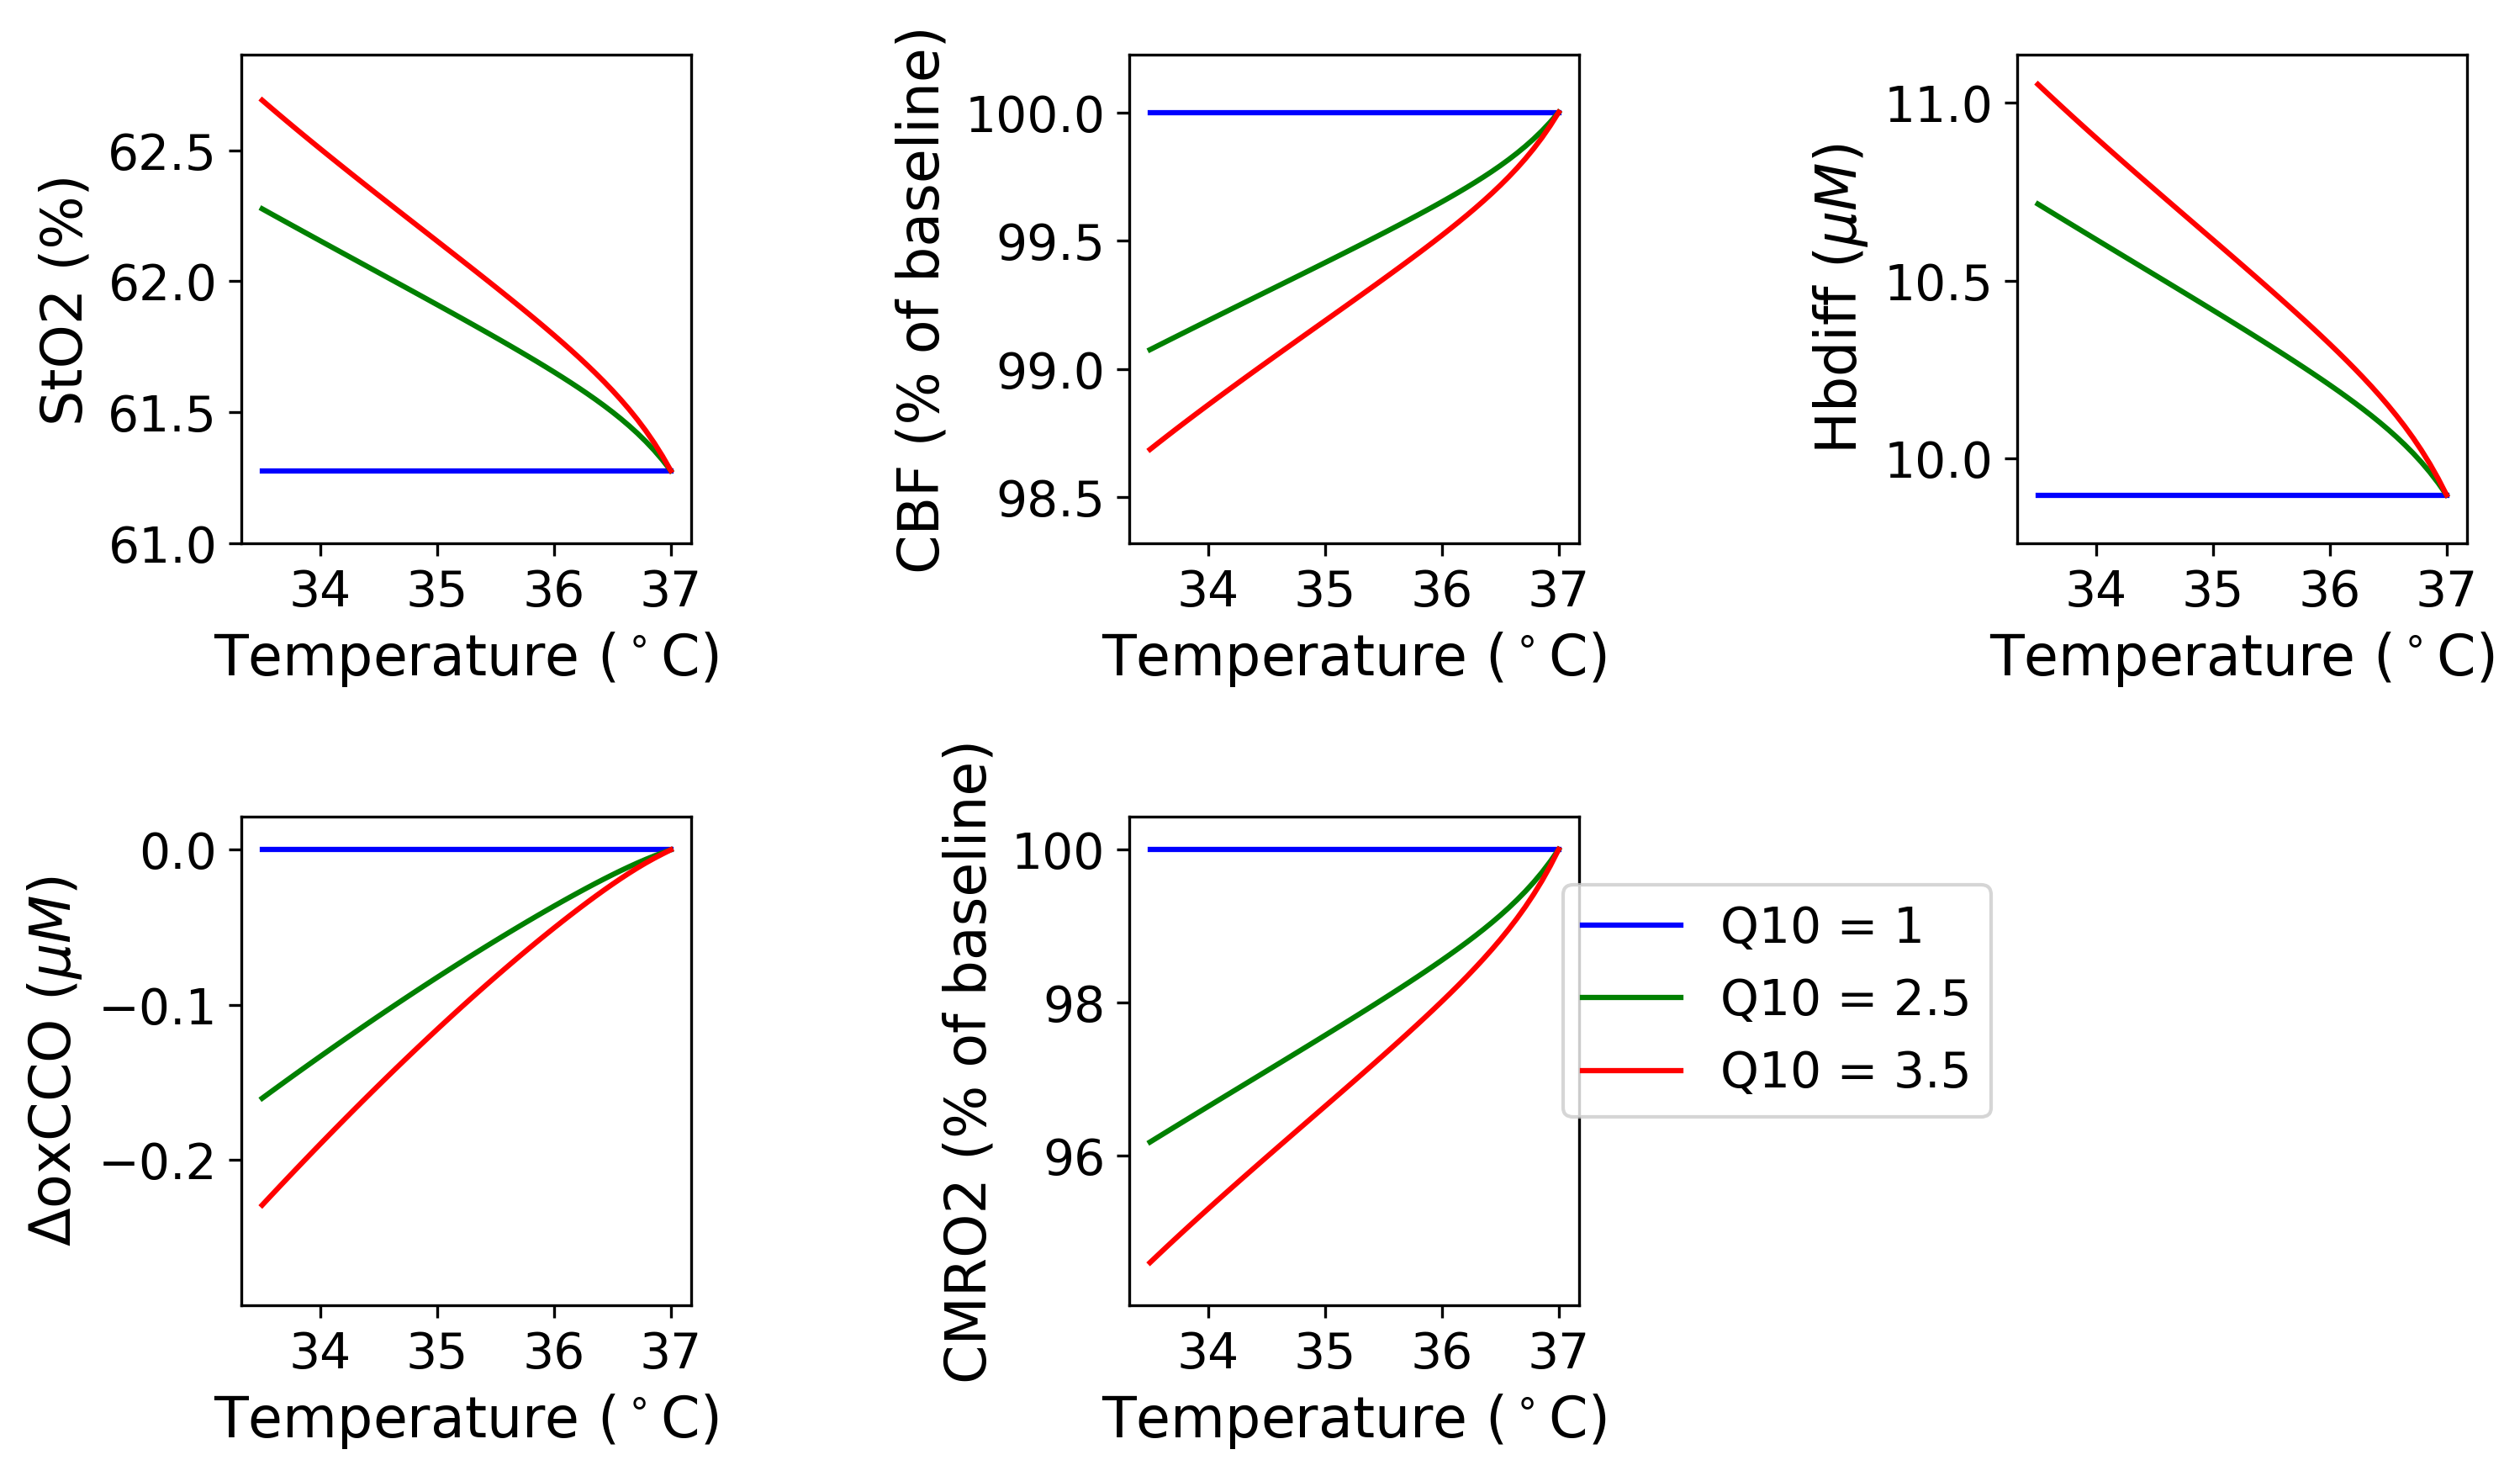

In [52]:
## Q10 figures
# with open('q10/220618T1154.json', 'r') as f:
jsondata_q10 = {}

jsondata_q10['down'] = get_outputs_json_data("bp_hypothermia_1", "down")

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
outputs = ['TOI', 'CBF', 'Hbdiff', 'CCO', 'CMRO2']
units = ["(%)", "(% of baseline)", "($\mu M$)", "($\mu M$)", "(% of baseline)"]
keys = list(jsondata_q10['down'].keys())[:6]
# jsondata_q10['up'] = {k:{} for k in keys}
# jsondata_q10['down'] = {k: {} for k in keys}
# for k in keys:
#     jsondata_q10['up'][k] = {inner_k: jsondata_q10_all[k][inner_k][:len(jsondata_q10_all[k]['t']) // 2 + 1] for inner_k in jsondata_q10_all[k].keys()}
#     jsondata_q10['down'][k] = {inner_k: jsondata_q10_all[k][inner_k][len(jsondata_q10_all[k]['t']) // 2:] for inner_k in jsondata_q10_all[k].keys()}

print(keys)
keys.sort()
# fig, axes = plt.subplots(nrows=2, ncols=3)
for direction  in ['down']:
    fig, axes = plt.subplots(nrows=2, ncols=3)
    for ii, o in enumerate(outputs):
        
        print("\n{}\n".format(o))
        ax = axes.flatten()[ii]
        for idx, k in enumerate(keys):
            if o == 'CBF' or o == 'CMRO2':
                print(k, ": ", jsondata_q10[direction][k][o][0])
                jsondata_q10[direction][k][o] = [100*(i/jsondata_q10[direction][k][o][0]) for i in jsondata_q10[direction][k][o]]
            # l = len(jsondata_q10[k]['t']) // 2
            # l = len(jsondata_q10[k]['t']) // 2
            ax.plot(jsondata_q10[direction][k]['temp'], jsondata_q10[direction][k][o], label='Q10 = %s'%k, c=colors[idx])
            max_idx = jsondata_q10[direction][k]['temp'].index(37)
            for j, t in enumerate(jsondata_q10[direction][k]['temp']):
                if 33.4<t<33.6:
                    min_idx = j
                    break
            
            if direction=="down":
                perc_change = jsondata_q10[direction][k][o][min_idx] / jsondata_q10[direction][k][o][max_idx] * 100
                print("From 37C to 33.5C {} changes to {:.1f}% of its starting value for Q10={}".format(o,perc_change,k))
            elif direction=="up":
                perc_change = jsondata_q10[direction][k][o][max_idx] / jsondata_q10[direction][k][o][min_idx] * 100
                print("From 33.5C to 37C {} changes to {:.1f}% of its starting value for Q10={}".format(o,perc_change,k))
        ax.set_xlabel('Temperature ($^\circ$C)', size=16)
        if o=='CCO':
            ax.set_ylabel("$\Delta$oxCCO {}".format(units[ii]), size=16)
        elif o=='DHbdiff':
            ax.set_ylabel("$\Delta$HbD {}".format(units[ii]), size=16)
        elif o == "TOI":
            ax.set_ylabel("StO2 {}".format(units[ii]), size=16)
        else:
            ax.set_ylabel("{} {}".format(o, units[ii]), size=16)

        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.locator_params(tight=True, nbins=4)
        ax.set_ylim(bottom = (ax.get_ylim()[0]-0.054)*0.9975, top=(ax.get_ylim()[1]+0.01)*1.0015)
        #ax.legend(prop={'size': 14})
        
    fig.delaxes(axes[-1,-1])

    #ax.axvline(33.5)
    # fig.suptitle("{d}".format(d="Rewarming" if direction == "up" else "Cooling"), size=18)
    fig.subplots_adjust(top=0.8)
    axes.flatten()[len(outputs)-1].legend(prop={'size': 14}, bbox_to_anchor=(0.95, 0.91))
    plt.tight_layout()
    fname = "varying_Q10_{}_combined".format(direction)

    # plt.savefig("E:/Dropbox/phd/Conferences/ISOTT-2018/Figures/{}".format(fname))

    
plt.show()
    
    

{'up': {}, 'down': {'TOI': (61.20712110398046, 62.761567925873365), 'CBF': (98.62058703509433, 100.06568633170195), 'DHbdiff': (-0.05780195269042672, 1.21384100513781), 'CCO': (-0.24082071788887985, 0.011467653231228215), 'CMRO2': (94.33796566663409, 100.26962068271082)}}
['1', '1.5', '2', '2.5', '3', '3.5']

TOI


CBF


DHbdiff


CCO


CMRO2



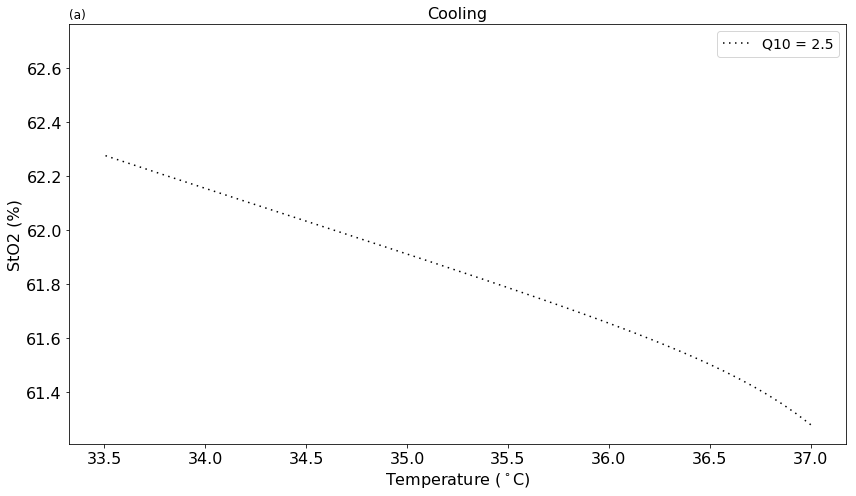

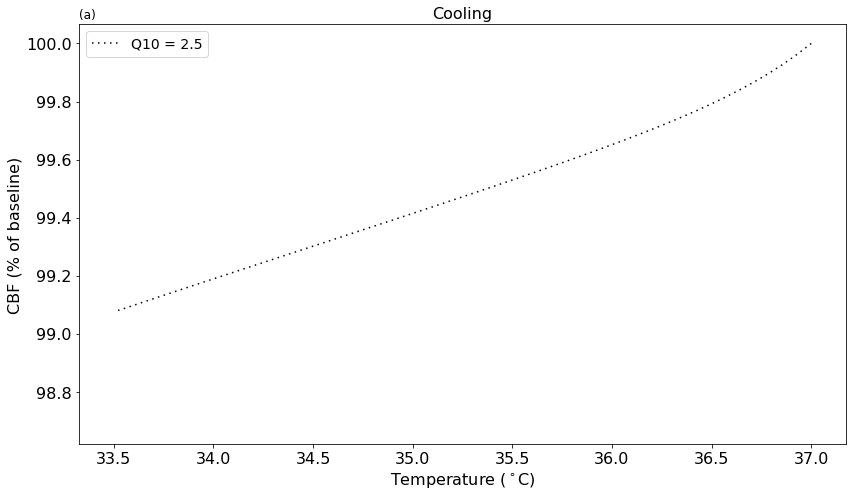

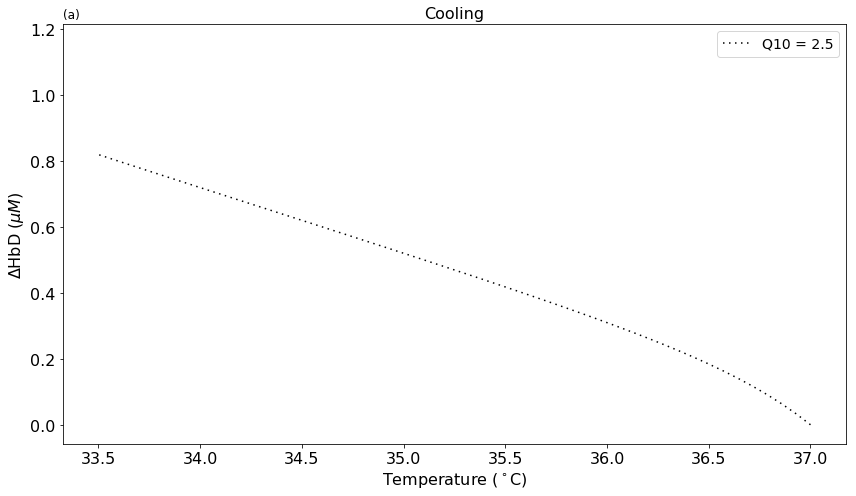

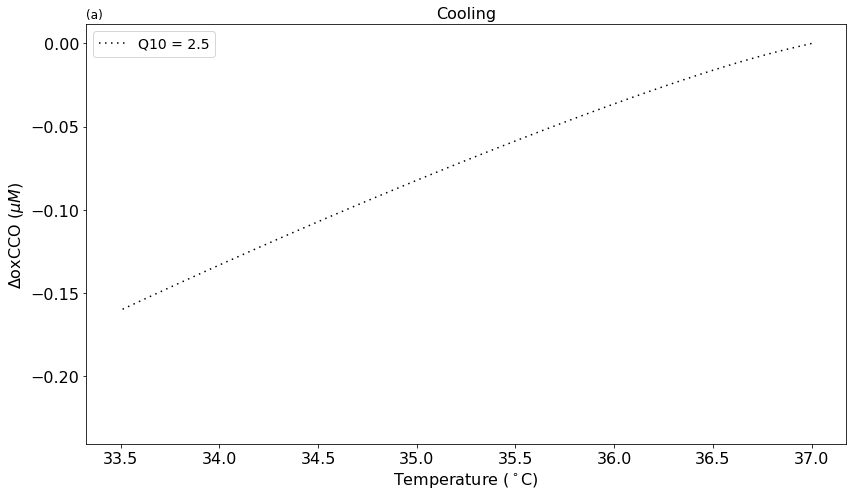

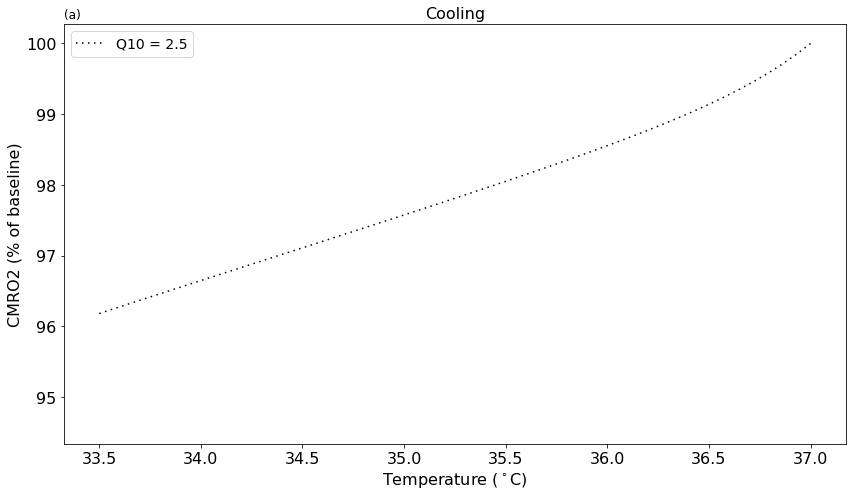

In [29]:
## Q10 figures
# with open('q10/220618T1154.json', 'r') as f:
print(ylims)
jsondata_q10 = {}
with open('q10/020718T1013.json', 'r') as f:
    jsondata_q10['down'] = json.load(f)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
outputs = ['TOI', 'CBF', 'DHbdiff', 'CCO', 'CMRO2']
units = ["(%)", "(% of baseline)", "($\mu M$)", "($\mu M$)", "(% of baseline)"]
keys = list(jsondata_q10_all.keys())[:6]
# jsondata_q10['up'] = {k:{} for k in keys}
# jsondata_q10['down'] = {k: {} for k in keys}
# for k in keys:
#     jsondata_q10['up'][k] = {inner_k: jsondata_q10_all[k][inner_k][:len(jsondata_q10_all[k]['t']) // 2 + 1] for inner_k in jsondata_q10_all[k].keys()}
#     jsondata_q10['down'][k] = {inner_k: jsondata_q10_all[k][inner_k][len(jsondata_q10_all[k]['t']) // 2:] for inner_k in jsondata_q10_all[k].keys()}

print(keys)
keys.sort()
# fig, axes = plt.subplots(nrows=2, ncols=3)
for direction  in ['down']:
    for ii, o in enumerate(outputs):
        fig, ax = plt.subplots(1)
        print("\n{}\n".format(o))
        # ax = axes.flatten()[ii]
        for idx, k in enumerate(keys):
            if o == 'CBF' or o == 'CMRO2':
                jsondata_q10[direction][k][o] = [100*(i/jsondata_q10[direction][k][o][0]) for i in jsondata_q10[direction][k][o]]

            # l = len(jsondata_q10[k]['t']) // 2
            if k == '2.5':
                ax.plot(jsondata_q10[direction][k]['temp'], jsondata_q10[direction][k][o], label='Q10 = %s'%k, c=colors[idx])
            
        ax.set_xlabel('Temperature ($^\circ$C)', size=16)
        if o=='CCO':
            ax.set_ylabel("$\Delta$oxCCO {}".format(units[ii]), size=16)
        elif o=='DHbdiff':
            ax.set_ylabel("$\Delta$HbD {}".format(units[ii]), size=16)
        elif o == "TOI":
            ax.set_ylabel("StO2 {}".format(units[ii]), size=16)
        else:
            ax.set_ylabel("{} {}".format(o, units[ii]), size=16)

        #ax.set_title('Effect of decreasing temperature on {}\nfor varying Q10'.format(o), size=16)
        ax.set_title("{d}".format(d="Rewarming" if direction == "up" else "Cooling"), size=16)

        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.legend(prop={'size': 14})
        ax.set_ylim(ylims[direction][o])
    #fig.delaxes(axes[-1,-1])
        setFigLinesBW(fig)
        #ax.axvline(33.5)

        plt.tight_layout()
        fname = "Q10_2_5_{}_{}.png".format(o, direction)
        plt.savefig("/home/buck06191/Dropbox/phd/Conferences/ISOTT-2018/Figures/{}".format(fname))
plt.show()
    
    

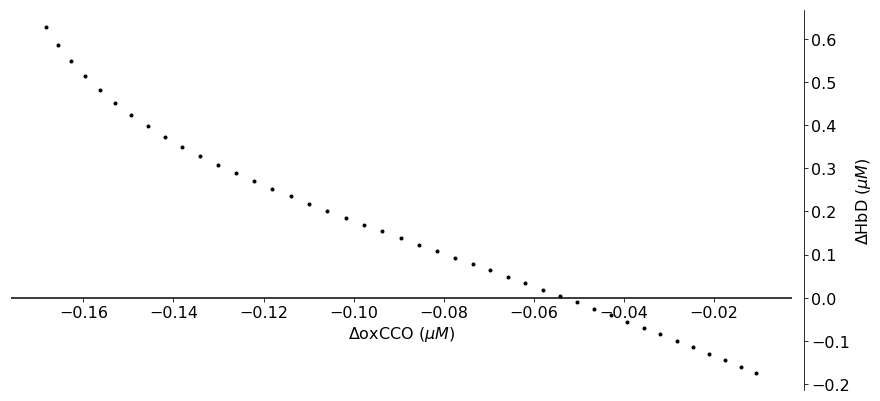

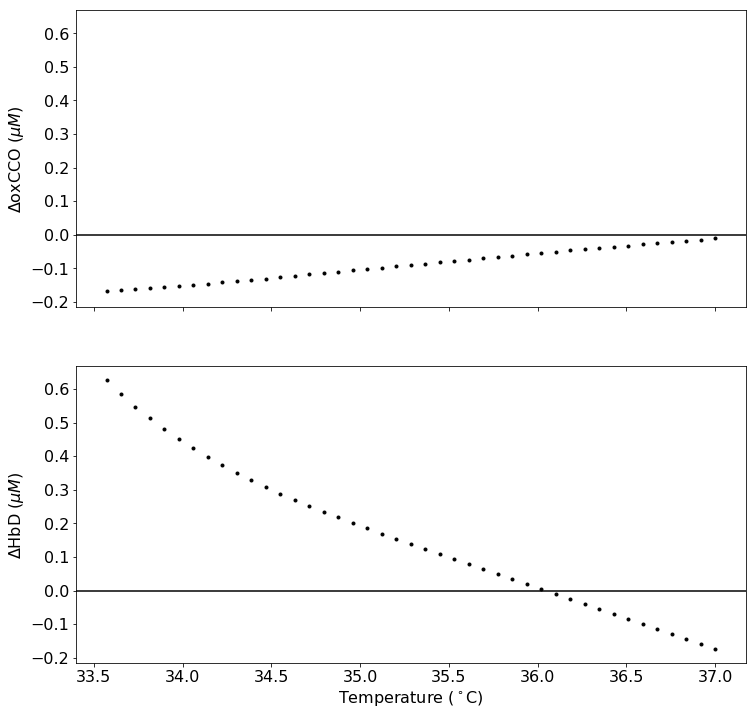

In [45]:
DHbd = jsondata_q10['up']['2.5']['DHbdiff']
CCO = jsondata_q10['up']['2.5']['CCO']
temp = jsondata_q10['up']['2.5']['temp']
for i in temp:
    if i >33.5:
        idx = temp.index(i)
        break
fig, ax = plt.subplots(1)
ax.plot(CCO[idx:], DHbd[idx:], '.k')
ax.axhline(0, color='k')
# set the x-spine (see below for more info on `set_position`)
ax.spines['right'].set_position('zero')

# turn off the right spine/ticks
ax.spines['left'].set_color('none')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')


#ax.set_ylim(ax.get_ylim()[0],0.02)
ax.tick_params(axis='both', which='major', labelsize=16)


ax.set_xlabel("$\Delta$oxCCO ($\mu M$)", size=16)
ax.set_ylabel("$\Delta$HbD ($\mu M$)", size=16)



fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(12,12))
ax[0].plot(temp[idx:], CCO[idx:], '.k')
ax[0].axhline(0, color='k')
ax[1].plot(temp[idx:], DHbd[idx:], '.k')
ax[1].axhline(0, color='k')


ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].set_ylabel("$\Delta$oxCCO ($\mu M$)", size=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].set_ylabel("$\Delta$HbD ($\mu M$)", size=16)
ax[1].set_xlabel('Temperature ($^\circ$C)', size=16)# # fig, axes = plt.subplots(nrows=2, ncols=3)

#plt.tight_layout()
# for ii, o in enumerate(outputs):
#     fig, ax = plt.subplots(1)
#     print("\n{}\n".format(o))
#     # ax = axes.flatten()[ii]

#     #l = len(jsondata_q10[k]['t']) // 2
#     ax.plot(jsondata_q10["2.5"]['temp'], jsondata_q10["2.5"][o], label='Q10 = %s'%k, c=colors[idx])
#     ax.set_xlabel('Temperature ($^\circ$C)', size=16)
#     if o=='CCO':
#         ax.set_ylabel("$\Delta$oxCCO {}".format(units[ii]), size=16)
#     elif o == "TOI":
#         ax.set_ylabel("StO2 {}".format(units[ii]), size=16)
#     else:
#         ax.set_ylabel("{} {}".format(o, units[ii]), size=16)

#     #ax.set_title('Effect of decreasing temperature on {}\nfor varying Q10'.format(o), size=16)
#     ax.tick_params(axis='both', which='major', labelsize=16)
#     #ax.legend(prop={'size': 12})
# #fig.delaxes(axes[-1,-1])
#     setFigLinesBW(fig)
#     plt.tight_layout()
#     fname = "Q10_2_5_{}.png".format(o)
#     plt.savefig("/home/buck06191/Dropbox/phd/Conferences/ISOTT-2018/Figures/{}".format(fname))
plt.show()